# Project Team ID - " PTID-CDS-JUL-23-1582 "
# PRCP - 1010 - Insurance Claim Prediction
# TEAM MEMBERS

- Spruha Singh (spruhasingh@gmail.com)
- Prem Nikhil Yangaladasu (premnikhily@gmail.com)
- Divakar Peeka (divakar4365@gmail.com)

## Problem Statement

Task 1:-Create a predictive model which will help the insurance marketing team
to know which customer will buy the product.

Task 2:-Suggestions to the Insurance market team to make customers buy the
product.

### Import libraries

In [1]:
from traitlets.utils.importstring import import_item
## importing all the necessary libraries
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Load Dataset

In [2]:
# loading the dataset

data = pd.read_csv(r"C:\Users\HP\Downloads\PRCP-1010-InsClaimPred\Data\train.csv")


In [3]:
data

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0                   0              0              1              0  ...   
1                   0              0              0              1  ...   
2                   0              0              0              1  ...   
3                   0              1              0              0  ...   
4                   0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595207              0              0              0              0  ...   
595208              0              0              0              0  ...   
595209              0              1              0              0  ...   
595210              0              0              0              1  ...   
595211              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0                9           1           5           8               0   
1                3           1           1           9               0   
2                4           2           7           7               0   
3                2           2           4           9               0   
4                3           1           1           3               0   
...            ...         ...         ...         ...             ...   
595207           4           1           9           6               0   
595208           4           1           3           8               1   
595209           3           2           2           6               0   
595210           4           1           4           2               0   
595211           4           4           3           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0                    1               1               0               0   
1                    1               1               0               1   
2                    1               1               0               1   
3                    0               0               0               0   
4                    0               0               1               1   
...                ...             ...             ...             ...   
595207               1               1               0               1   
595208               0               1               0               1   
595209               0               1               0               0   
595210               1               1               1               0   
595211               1               0               0               0   

        ps_calc_20_bin  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
595207               1  
595208               1  
595209               0  
595210               0  
595211               0  

[595212 rows x 59 columns]

### Basic Checks

In [438]:
data.head()

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0       0          2              2          5              1              0   
1       0          1              1          7              0              0   
2       0          5              1          9              1              0   
3       0          0              1          2              0              0   
4       0          0              2          0              1              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
0              0              1              0              0  ...   
1              0              0              1              0  ...   
2              0              0              1              0  ...   
3              1              0              0              0  ...   
4              1              0              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 53 columns]

In [439]:
data.tail()

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
595207       0          3              1         10              0   
595208       0          5              1          3              0   
595209       0          1              1         10              0   
595210       0          5              2          3              1   
595211       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
595207              1  ...           4           1           9           6   
595208              1  ...           4           1           3           8   
595209              0  ...           3           2           2           6   
595210              0  ...           4           1           4           2   
595211              0  ...           4           4           3           8   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
595207               0               1               1               0   
595208               1               0               1               0   
595209               0               0               1               0   
595210               0               1               1               1   
595211               0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
595207               1               1  
595208               1               1  
595209               0               0  
595210               0               0  
595211               0               0  

[5 rows x 53 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

- no null and empty cells in the dataset

In [5]:
data.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.438036e+05       0.036448       1.900378       1.358943   
std    4.293678e+05       0.187401       1.983789       0.664594   
min    7.000000e+00       0.000000       0.000000      -1.000000   
25%    3.719915e+05       0.000000       0.000000       1.000000   
50%    7.435475e+05       0.000000       1.000000       1.000000   
75%    1.115549e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       4.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423318       0.416794       0.405188       0.393742   
std         2.699902       0.493311       1.350642       0.488579   
min         0.000000      -1.000000      -1.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin  ...     ps_calc_11     ps_calc_12  \
count  595212.000000  595212.000000  ...  595212.000000  595212.000000   
mean        0.257033       0.163921  ...       5.441382       1.441918   
std         0.436998       0.370205  ...       2.332871       1.202963   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       4.000000       1.000000   
50%         0.000000       0.000000  ...       5.000000       1.000000   
75%         1.000000       0.000000  ...       7.000000       2.000000   
max         1.000000       1.000000  ...      19.000000      10.000000   

          ps_calc_13     ps_calc_14  ps_calc_15_bin  ps_calc_16_bin  \
count  595212.000000  595212.000000   595212.000000   595212.000000   
mean        2.872288       7.539026        0.122427        0.627840   
std         1.694887       2.746652        0.327779        0.483381   
min         0.000000       0.000000        0.000000        0.000000   
25%         2.000000       6.000000        0.000000        0.000000   
50%         3.000000       7.000000        0.000000        1.000000   
75%         4.000000       9.000000        0.000000        1.000000   
max        13.000000      23.000000        1.000000        1.000000   

       ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
count   595212.000000   595212.000000   595212.000000   595212.000000  
mean         0.554182        0.287182        0.349024        0.153318  
std          0.497056        0.452447        0.476662        0.360295  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          1.000000        0.000000        0.000000        0.000000  
75%          1.000000        1.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 59 columns]

# DATA PREPROCESSING AND FEATURE ENGINEERING

In [6]:
# checking for any missing values

data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


- there is no null values present in columns

In [7]:
# creating a new list to check for outliers

data_box = data[['ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'
]]

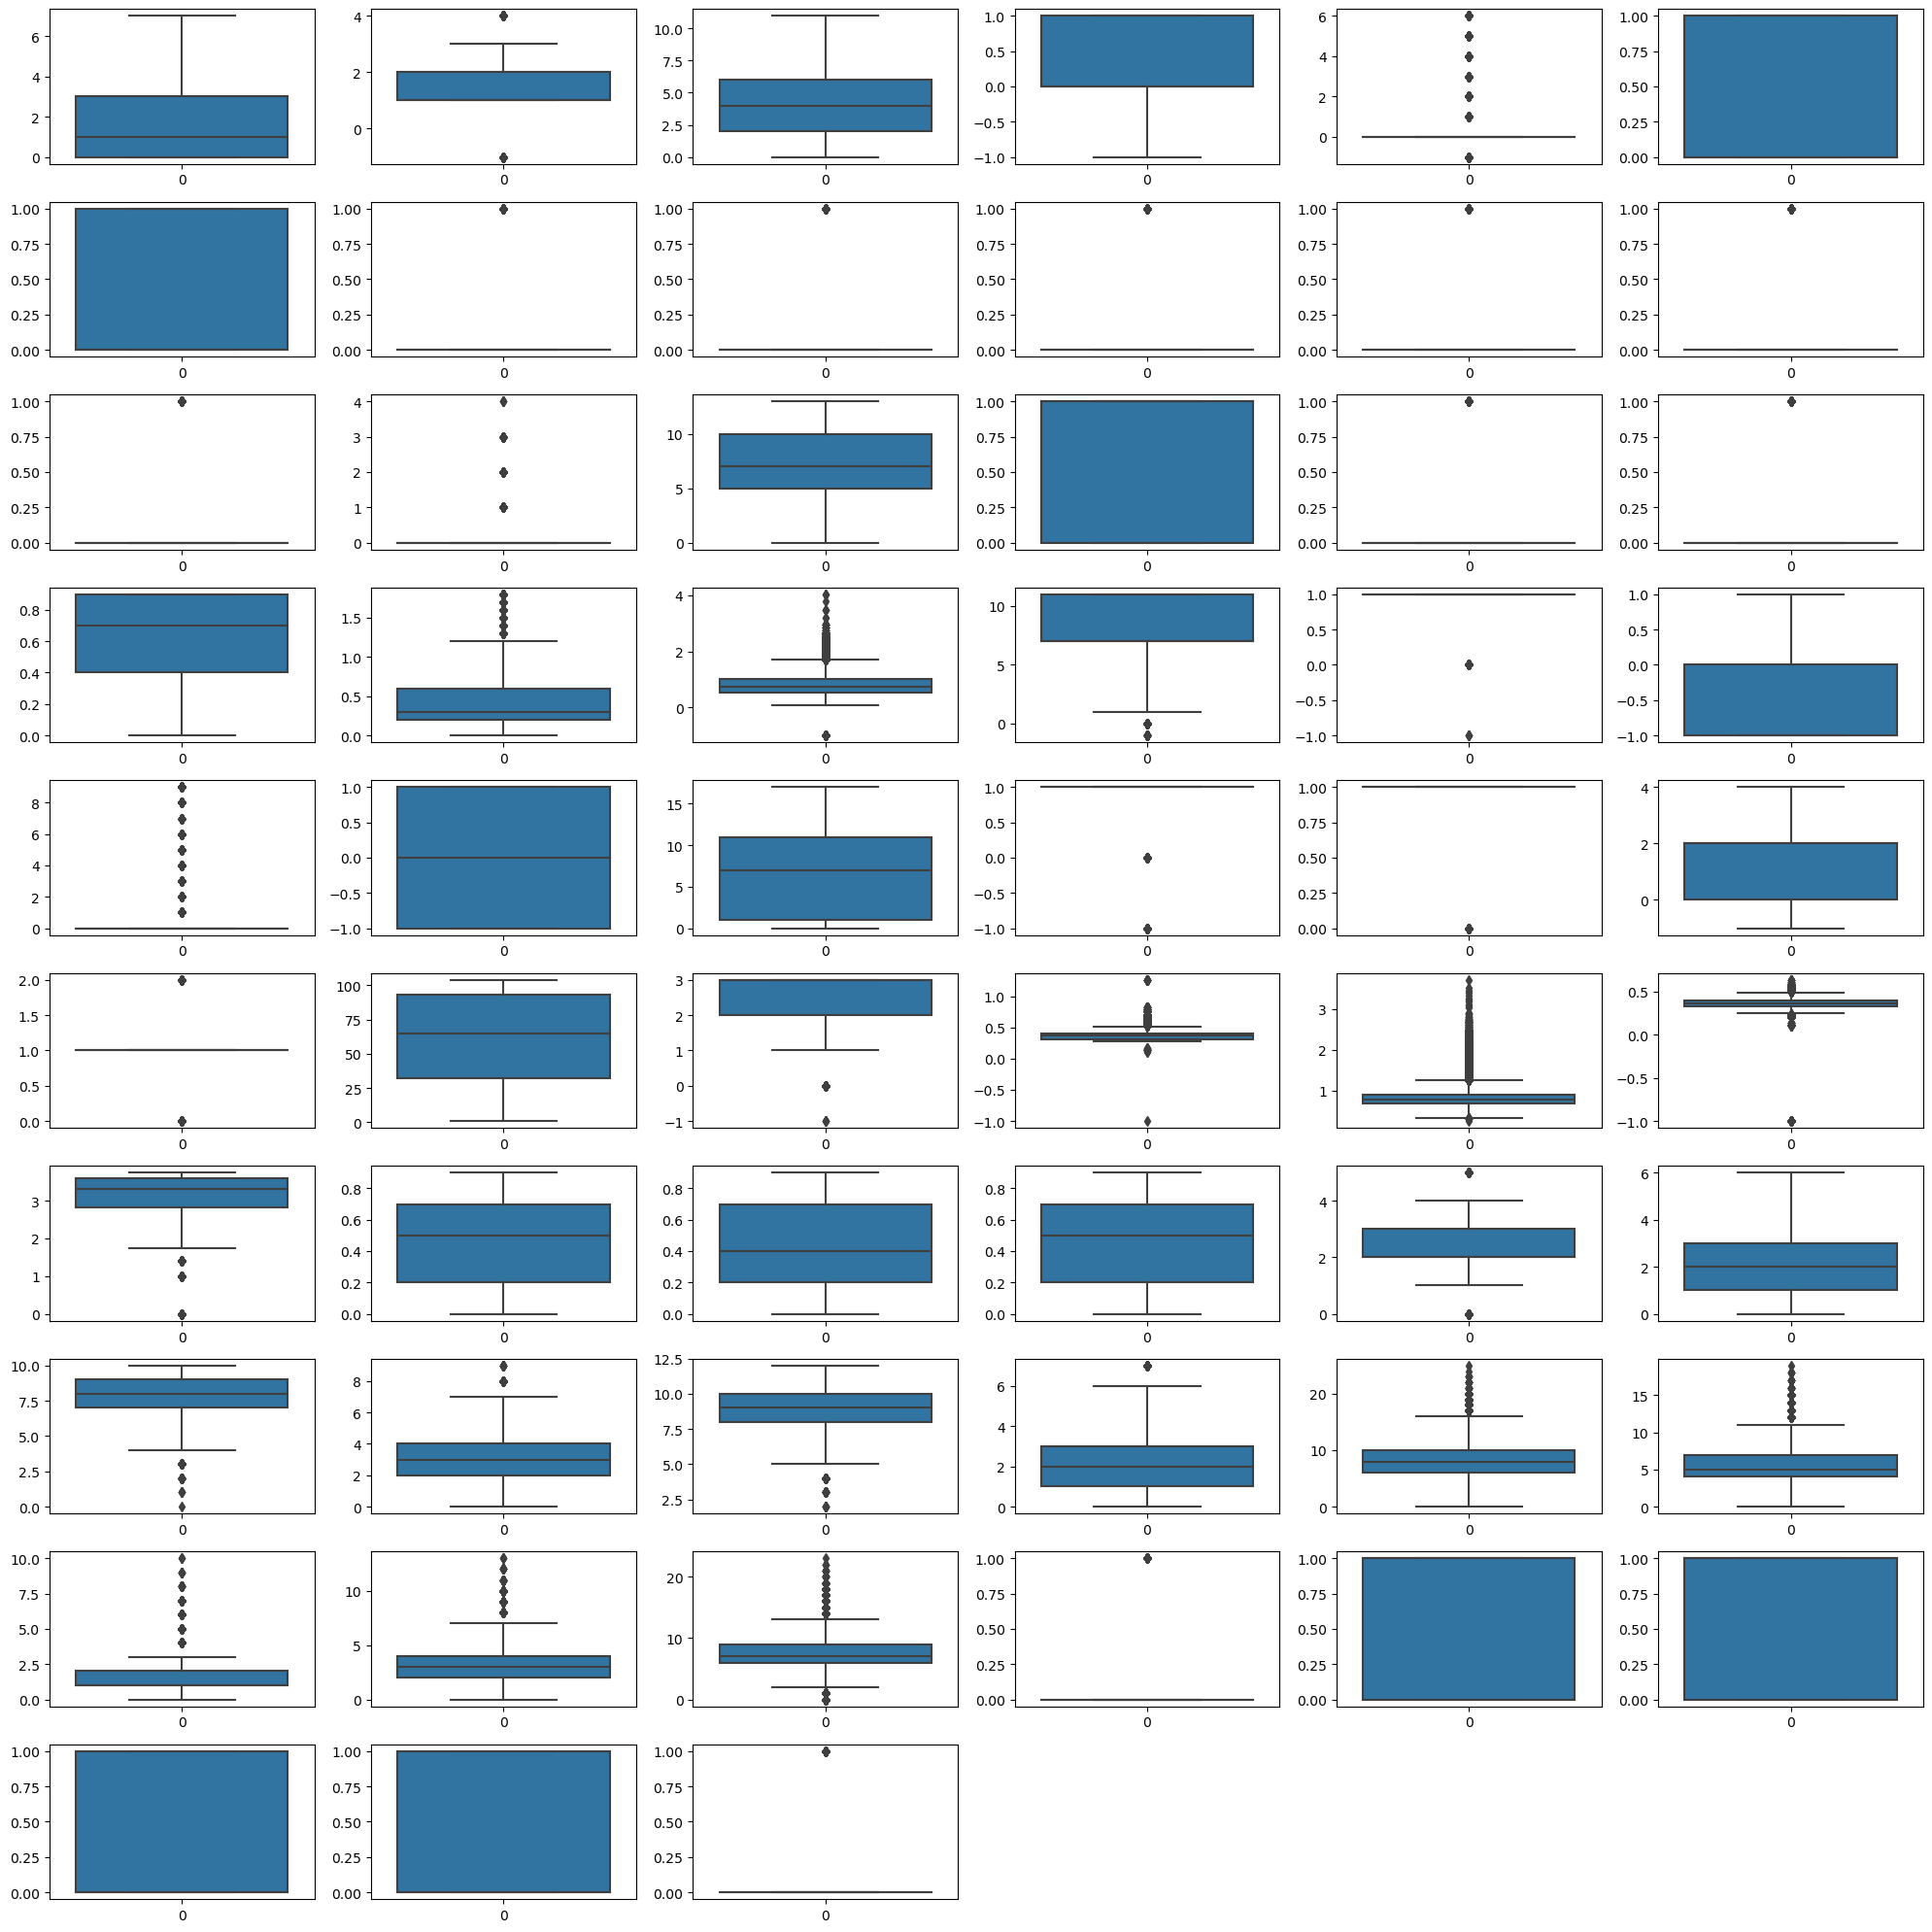

In [8]:
# plotting boxplot for outliers

plt.figure(figsize=(20,20),facecolor='white')

plotnumber=1

for column in data_box:
    if plotnumber<=60 :
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(data[column])

    plotnumber+=1
plt.tight_layout()

## "Handling outliers one by one for all the features."

## ps_ind_01
###### No outlier present as per data visualization using boxplot.


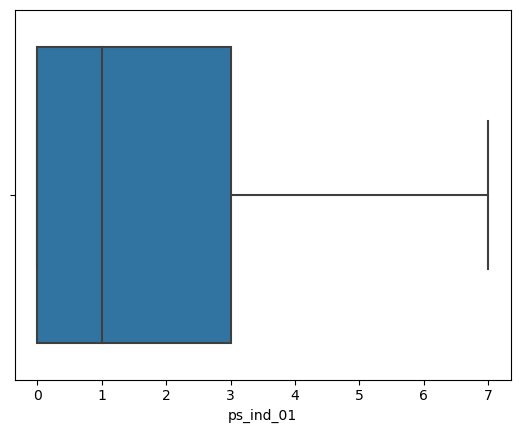

In [9]:
sns.boxplot(x='ps_ind_01',data=data)
plt.show()

In [10]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_01,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_01.quantile(0.25)
Q3=data.ps_ind_01.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  3.0
Lower_limit :  -1.5
Upper_limit :  7.5


In [11]:
data.loc[data['ps_ind_01'] > Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [12]:
data.loc[data['ps_ind_01'] < Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- No outliers present in "ps_ind_01".

## ps_ind_02_cat
###### Outlier present as per data visualization using boxplot.

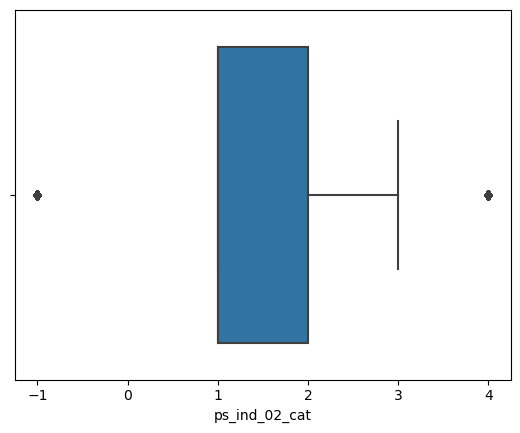

In [13]:
sns.boxplot(x='ps_ind_02_cat',data=data)
plt.show()

In [14]:
# finding lower & upper limit using IQR

IQR = stats.iqr(data.ps_ind_02_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_02_cat.quantile(0.25)
Q3=data.ps_ind_02_cat.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Lower_limit :  -0.5
Upper_limit :  3.5


In [15]:
data.loc[data['ps_ind_02_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
847        2210       0          5             -1          0             -1   
11840     29812       0          0             -1          8              0   
13670     34370       0          5             -1          0             -1   
13804     34695       0          0             -1          0             -1   
14002     35176       0          0             -1          7              0   
...         ...     ...        ...            ...        ...            ...   
583341  1458146       0          3             -1          5              0   
584757  1461734       0          0             -1          7              1   
587628  1468746       1          5             -1          0             -1   
591394  1478237       0          0             -1          6              1   
593631  1483987       0          4             -1          6              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
847                -1              0              1              0  ...   
11840               0              0              0              0  ...   
13670              -1              0              0              1  ...   
13804              -1              1              0              0  ...   
14002               6              0              1              0  ...   
...               ...            ...            ...            ...  ...   
583341              0              0              0              1  ...   
584757              0              0              0              0  ...   
587628             -1              0              0              1  ...   
591394              0              0              0              1  ...   
593631              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
847              5           2           2           9               0   
11840            6           1           3           9               0   
13670            4           0           1           6               0   
13804            5           2           1           4               0   
14002            2           2           1           9               0   
...            ...         ...         ...         ...             ...   
583341           9           2           0           5               0   
584757           4           0           4           5               0   
587628           7           1           6           6               0   
591394           8           3           4           9               0   
593631           5           0           7          11               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
847                  0               0               0               0   
11840                0               1               1               0   
13670                1               0               0               0   
13804                1               0               0               1   
14002                1               1               0               1   
...                ...             ...             ...             ...   
583341               1               1               0               0   
584757               0               1               0               0   
587628               0               1               0               1   
591394               1               0               0               0   
593631               1               1               1               1   

        ps_calc_20_bin  
847                  0  
11840                0  
13670                0  
13804                0  
14002                0  
...                ...  
583341               0  
584757               0  
587628               0  
591394               0  
593631               0  

[216 rows x 59 columns]

In [16]:
data.loc[data['ps_ind_02_cat']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2            13       0          5              4          9              1   
37          101       0          3              4          9              1   
149         398       0          0              4          9              1   
190         480       0          3              4          7              1   
267         689       0          0              4          7              1   
...         ...     ...        ...            ...        ...            ...   
594846  1487074       1          5              4         10              1   
594872  1487135       0          0              4          9              0   
594920  1487258       0          3              4          3              1   
594944  1487309       0          3              4          9              1   
594989  1487432       0          1              4          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
2                   0              0              0              1  ...   
37                  0              0              0              0  ...   
149                 0              0              1              0  ...   
190                 0              0              0              0  ...   
267                 0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
594846              0              0              0              0  ...   
594872              0              1              0              0  ...   
594920              0              0              1              0  ...   
594944              0              0              1              0  ...   
594989              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
2                4           2           7           7               0   
37               4           1           1           7               0   
149              0           0           2          11               0   
190              2           1           1           5               0   
267              2           0           5           7               0   
...            ...         ...         ...         ...             ...   
594846           7           2           1           8               0   
594872           9           1           1           6               0   
594920           8           2           2           7               0   
594944          11           1           3          11               0   
594989           8           2           6          15               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
2                    1               1               0               1   
37                   0               1               1               0   
149                  1               1               1               0   
190                  1               1               0               0   
267                  0               1               0               0   
...                ...             ...             ...             ...   
594846               0               0               0               0   
594872               1               0               0               0   
594920               1               1               0               1   
594944               0               1               0               0   
594989               1               1               0               1   

        ps_calc_20_bin  
2                    0  
37                   0  
149                  0  
190                  1  
267                  0  
...                ...  
594846               0  
594872               0  
594920               0  
594944               0  
594989               1  

[11378 rows x 59 columns]

In [17]:
# IMPUTING OUTLIERS USING MEDIAN
data.loc[data['ps_ind_02_cat']<Lower_limit,'ps_ind_02_cat']=data['ps_ind_02_cat'].median()

In [18]:
data.loc[data['ps_ind_02_cat']>Upper_limit,'ps_ind_02_cat']=data['ps_ind_02_cat'].median()

In [19]:
data.loc[data['ps_ind_02_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [20]:
data.loc[data['ps_ind_02_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_ind_03


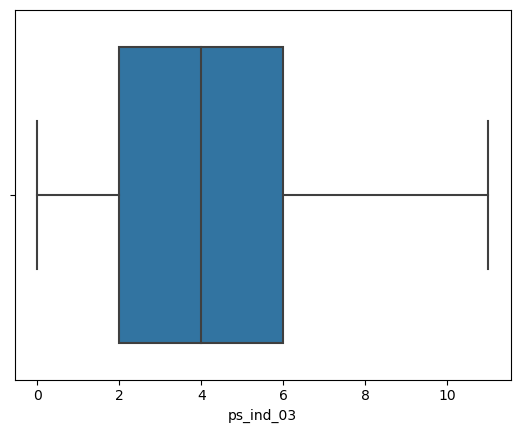

In [21]:
sns.boxplot(x='ps_ind_03',data=data)
plt.show()

###### No outlier present as per data visualization using boxplot.

In [22]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_03,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_03.quantile(0.25)
Q3=data.ps_ind_03.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  4.0
Lower_limit :  0.0
Upper_limit :  12.0


In [23]:
data.loc[data['ps_ind_03']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [24]:
data.loc[data['ps_ind_03']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- No outliers present in "ps_ind_03".

## ps_ind_04_cat


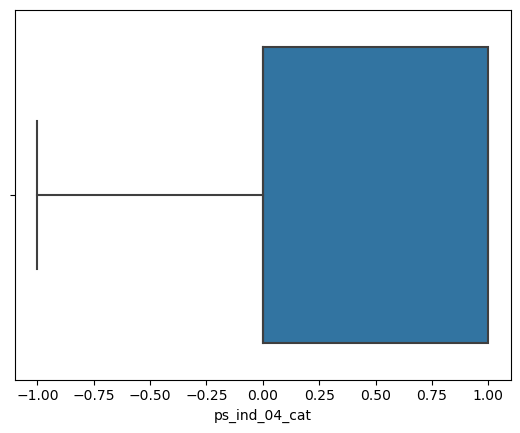

In [25]:
sns.boxplot(x='ps_ind_04_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [26]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_04_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_04_cat.quantile(0.25)
print('Q1 : ',Q1)
Q3=data.ps_ind_04_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -0.5
Upper_limit :  2.5


In [27]:
data.loc[data['ps_ind_04_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
847        2210       0          5              1          0             -1   
12329     30996       0          3              1          4             -1   
13670     34370       0          5              1          0             -1   
13804     34695       0          0              1          0             -1   
23056     57695       1          3              1          0             -1   
...         ...     ...        ...            ...        ...            ...   
546932  1366894       0          1              1          0             -1   
557616  1393791       1          5              1          0             -1   
564377  1411082       1          2              1          0             -1   
579049  1447810       1          1              1          0             -1   
587628  1468746       1          5              1          0             -1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
847                -1              0              1              0  ...   
12329               0              1              0              0  ...   
13670              -1              0              0              1  ...   
13804              -1              1              0              0  ...   
23056              -1              1              0              0  ...   
...               ...            ...            ...            ...  ...   
546932             -1              0              1              0  ...   
557616             -1              0              0              1  ...   
564377             -1              0              1              0  ...   
579049             -1              1              0              0  ...   
587628             -1              0              0              1  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
847              5           2           2           9               0   
12329            2           0           2           7               0   
13670            4           0           1           6               0   
13804            5           2           1           4               0   
23056            2           1           2           5               0   
...            ...         ...         ...         ...             ...   
546932          11           1           1          11               0   
557616           4           3           2           6               0   
564377           7           1           5           3               1   
579049           4           1           3           7               0   
587628           7           1           6           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
847                  0               0               0               0   
12329                1               0               0               1   
13670                1               0               0               0   
13804                1               0               0               1   
23056                0               0               0               0   
...                ...             ...             ...             ...   
546932               1               0               0               1   
557616               1               1               1               0   
564377               1               1               1               0   
579049               0               0               0               0   
587628               0               1               0               1   

        ps_calc_20_bin  
847                  0  
12329                0  
13670                0  
13804                0  
23056                0  
...                ...  
546932               0  
557616               0  
564377               0  
579049               0  
587628               0  

[83 rows x 59 columns]

In [28]:
data.loc[data['ps_ind_04_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [29]:
data.loc[data['ps_ind_04_cat']<Lower_limit]=data.ps_ind_04_cat.median()

In [30]:
data.loc[data['ps_ind_04_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_ind_05_cat


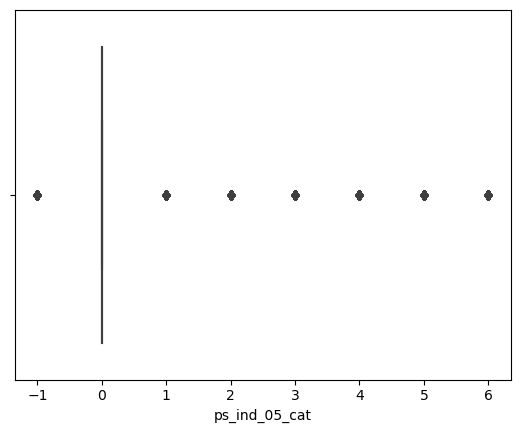

In [31]:
sns.boxplot(x='ps_ind_05_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [32]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_05_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_05_cat.quantile(0.25)
Q3=data.ps_ind_05_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [33]:
# more than 5% outliers present

a=len(data.loc[data['ps_ind_05_cat']>Lower_limit])
b=len(data.loc[data['ps_ind_05_cat']<Lower_limit])
c=(a+b)/len(data)
c

0.11277326397989287

- 11.3% Outliers present in "ps_ind_05_cat".

## ps_ind_06_bin

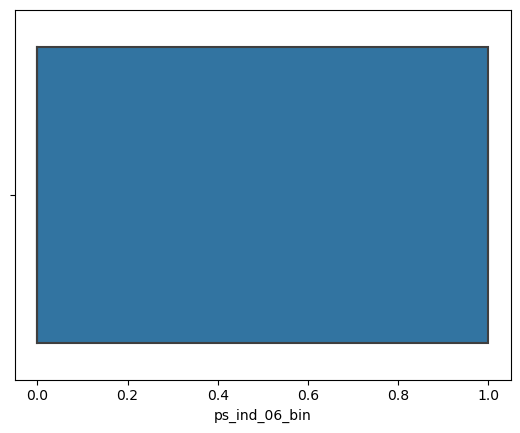

In [34]:
sns.boxplot(x='ps_ind_06_bin',data=data)
plt.show()

In [35]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_06_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_06_bin.quantile(0.25)
Q3=data.ps_ind_06_bin.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Lower_limit :  -0.5
Upper_limit :  2.5


In [36]:
data.loc[data['ps_ind_06_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [37]:
data.loc[data['ps_ind_06_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- No outliers present in "ps_ind_06_bin".

## ps_ind_07_bin


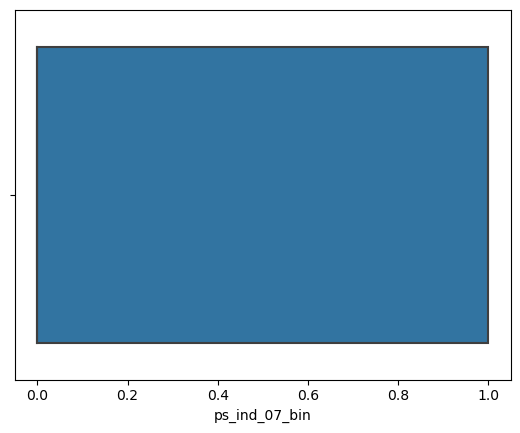

In [38]:
sns.boxplot(x='ps_ind_07_bin',data=data)
plt.show()

In [39]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_07_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_07_bin.quantile(0.25)
Q3=data.ps_ind_07_bin.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Lower_limit :  -0.5
Upper_limit :  2.5


In [40]:
data.loc[data['ps_ind_07_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [41]:
data.loc[data['ps_ind_07_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- No outliers present in "ps_ind_07_bin".

## ps_ind_08_bin



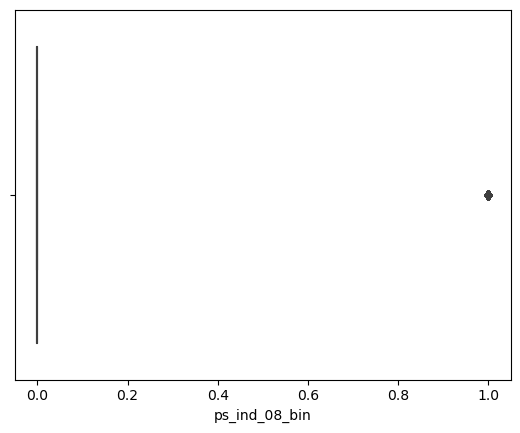

In [42]:
sns.boxplot(x='ps_ind_08_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [43]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_08_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_08_bin.quantile(0.25)
Q3=data.ps_ind_08_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [44]:
# outlier more than 5% so not considering as outlier

a=len(data.loc[data['ps_ind_08_bin']>Lower_limit])
b=len(data.loc[data['ps_ind_08_bin']<Lower_limit])
c=(a+b)/len(data)
c

0.16387774440031452

- 16.4% Outliers present in "ps_ind_08_bin".

## ps_ind_09_bin



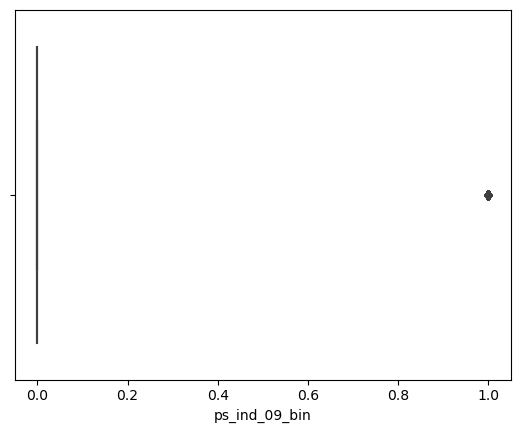

In [45]:
sns.boxplot(x='ps_ind_09_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_ind_09_bin', ylabel='Count'>

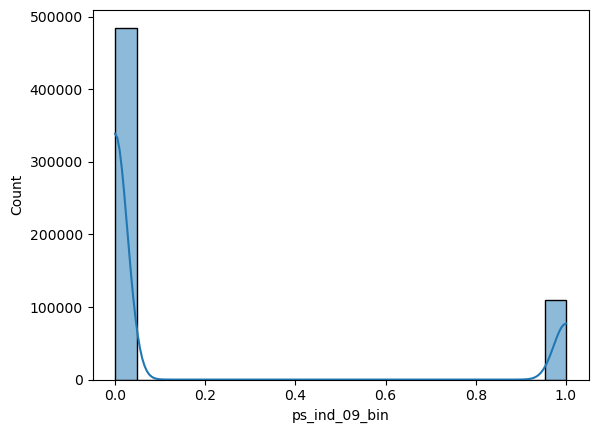

In [46]:
# checking distribution using histplot
sns.histplot(x='ps_ind_09_bin',kde=True,data=data)

In [47]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_09_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_09_bin.quantile(0.25)
Q3=data.ps_ind_09_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [48]:
len(data.loc[data['ps_ind_09_bin']<Lower_limit])/len(data)

0.0

In [49]:
len(data.loc[data['ps_ind_09_bin']>Upper_limit])/len(data)

0.18527348238946795

- Data is right skewed distribution and 18.5% Outliers present.

## ps_ind_10_bin


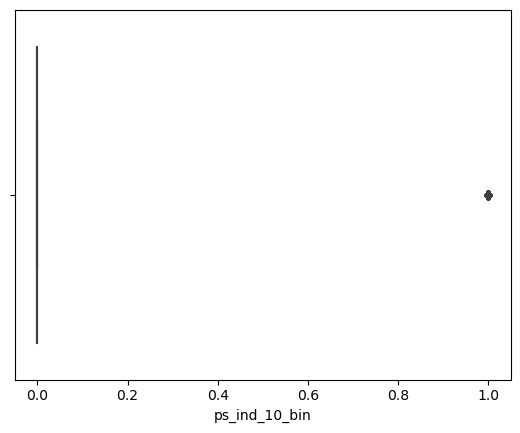

In [50]:
sns.boxplot(x='ps_ind_10_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.


In [51]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_10_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_10_bin.quantile(0.25)
Q3=data.ps_ind_10_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [52]:
data.loc[data['ps_ind_10_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [53]:
data.loc[data['ps_ind_10_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
4264      10954       0          6              2          1              1   
5218      13317       0          3              1          6              1   
5380      13719       0          6              1          7              0   
5701      14547       0          0              1          5              0   
8245      20882       0          1              1          5              0   
...         ...     ...        ...            ...        ...            ...   
575298  1438502       0          5              1          8              0   
590597  1476265       0          0              3          7              1   
591529  1478558       0          5              1          6              1   
591615  1478769       0          5              1          4              1   
594997  1487448       0          3              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
4264                3              0              1              0  ...   
5218                0              0              0              0  ...   
5380                0              0              0              1  ...   
5701                0              0              1              0  ...   
8245                0              0              0              1  ...   
...               ...            ...            ...            ...  ...   
575298              0              0              1              0  ...   
590597              0              0              1              0  ...   
591529              0              0              1              0  ...   
591615              0              0              1              0  ...   
594997              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
4264             5           2           0           4               0   
5218             6           3           5           7               1   
5380             6           3           5           7               0   
5701             1           4           3          10               0   
8245             4           1           1           7               1   
...            ...         ...         ...         ...             ...   
575298           9           1           2           9               1   
590597           5           1           4           7               0   
591529           7           2           2           8               1   
591615           5           5           1          11               0   
594997           5           1           4          11               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
4264                 0               0               1               1   
5218                 0               0               0               1   
5380                 1               0               0               1   
5701                 1               1               0               1   
8245                 0               0               1               0   
...                ...             ...             ...             ...   
575298               1               0               1               1   
590597               1               1               0               1   
591529               1               1               1               0   
591615               1               1               0               0   
594997               1               1               0               0   

        ps_calc_20_bin  
4264                 0  
5218                 0  
5380                 1  
5701                 0  
8245                 0  
...                ...  
575298               0  
590597               0  
591529               0  
591615               0  
594997               1  

[222 rows x 59 columns]

In [54]:
# imputing outlier using median
data.loc[data['ps_ind_10_bin']>Upper_limit,'ps_ind_10_bin']=data.ps_ind_10_bin.median()

In [55]:
data.loc[data['ps_ind_10_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_ind_11_bin


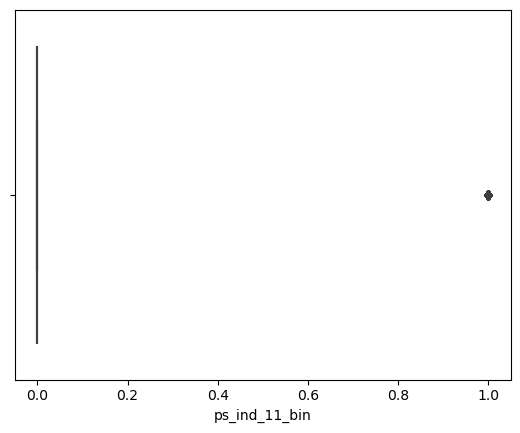

In [56]:
sns.boxplot(x='ps_ind_11_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [57]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_11_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_11_bin.quantile(0.25)
Q3=data.ps_ind_11_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [58]:
data.loc[data['ps_ind_11_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
351         948       0          0              3          7              1   
1189       3074       0          2              1          4              1   
1206       3110       0          0              1          6              0   
1258       3245       0          0              2          1              1   
4107      10560       0          1              1          4              0   
...         ...     ...        ...            ...        ...            ...   
592392  1480780       0          0              2          1              1   
592876  1482007       0          1              1          7              0   
593221  1482893       0          0              1          5              0   
593527  1483712       0          7              1          8              1   
593929  1484755       0          0              2          1              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
351                 0              0              1              0  ...   
1189                0              1              0              0  ...   
1206                0              0              1              0  ...   
1258                1              0              0              0  ...   
4107                0              0              0              1  ...   
...               ...            ...            ...            ...  ...   
592392              0              0              0              1  ...   
592876              0              0              0              1  ...   
593221              0              1              0              0  ...   
593527              0              0              0              0  ...   
593929              0              0              0              1  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
351              7           1           3           8               0   
1189             3           0           3          10               0   
1206             5           3           3          10               0   
1258             3           1           3           8               0   
4107             4           4           2           8               0   
...            ...         ...         ...         ...             ...   
592392           9           1           4          11               1   
592876           6           1           1           6               0   
593221           3           2           0           5               1   
593527           8           3           2           7               1   
593929           4           1           1           6               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
351                  1               1               0               0   
1189                 1               0               0               1   
1206                 1               1               0               1   
1258                 1               1               1               0   
4107                 1               0               0               0   
...                ...             ...             ...             ...   
592392               0               1               0               1   
592876               1               1               0               0   
593221               1               0               0               0   
593527               1               1               0               0   
593929               0               0               1               0   

        ps_calc_20_bin  
351                  0  
1189                 0  
1206                 0  
1258                 0  
4107                 0  
...                ...  
592392               0  
592876               0  
593221               1  
593527               0  
593929               1  

[1007 rows x 59 columns]

In [59]:
data.loc[data['ps_ind_11_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [60]:
# imputing outlier using median
data.loc[data['ps_ind_11_bin']>Upper_limit,'ps_ind_11_bin']=data.ps_ind_11_bin.median()

In [61]:
data.loc[data['ps_ind_11_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_ind_12_bin


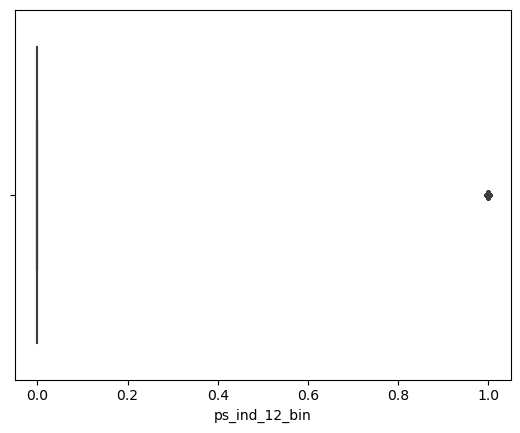

In [62]:
sns.boxplot(x='ps_ind_12_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_ind_12_bin', ylabel='Count'>

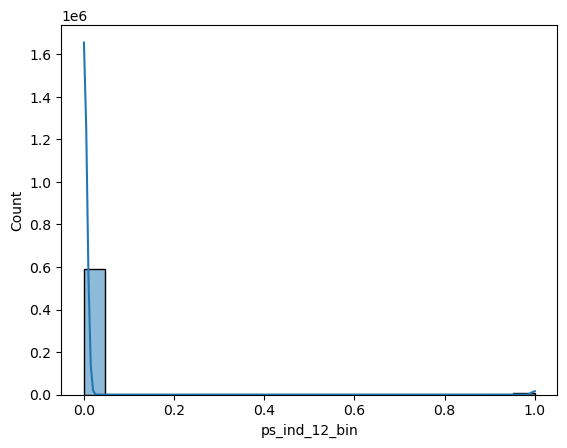

In [63]:
# checking distribution using histplot
sns.histplot(x='ps_ind_12_bin',data=data,kde=True)

In [64]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_12_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_12_bin.quantile(0.25)
Q3=data.ps_ind_12_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [65]:
data.loc[data['ps_ind_12_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [66]:
data.loc[data['ps_ind_12_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
47          120       0          0              1          9              0   
173         449       0          2              1          6              0   
225         564       0          0              1          5              0   
322         861       0          2              1          4              1   
325         870       0          2              2          2              1   
...         ...     ...        ...            ...        ...            ...   
594784  1486955       0          2              1          2              1   
594814  1487011       0          4              1          5              1   
595110  1487743       0          3              2          3              1   
595123  1487773       0          0              1          5              1   
595175  1487925       0          1              1          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
47                  0              0              1              0  ...   
173                 0              0              1              0  ...   
225                 0              0              1              0  ...   
322                 0              0              1              0  ...   
325                 0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
594784              0              0              0              1  ...   
594814              0              0              0              1  ...   
595110              0              0              0              1  ...   
595123              0              0              0              1  ...   
595175              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
47               4           5           3          11               0   
173              5           0           5           7               0   
225              3           2           3           9               0   
322              5           0           1           6               0   
325              6           4           3           9               0   
...            ...         ...         ...         ...             ...   
594784           3           1           4           7               0   
594814           4           0           2           8               0   
595110           8           0           4          11               0   
595123           8           2           3          11               1   
595175           5           1           1           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
47                   1               1               0               1   
173                  0               1               1               0   
225                  0               0               0               0   
322                  1               1               0               0   
325                  1               1               0               0   
...                ...             ...             ...             ...   
594784               0               0               0               0   
594814               0               1               1               0   
595110               1               1               0               0   
595123               0               0               0               0   
595175               1               0               0               0   

        ps_calc_20_bin  
47                   0  
173                  0  
225                  0  
322                  1  
325                  0  
...                ...  
594784               1  
594814               1  
595110               1  
595123               0  
595175               0  

[5615 rows x 59 columns]

In [67]:
# imputing outlier using median
data.loc[data['ps_ind_12_bin']>Upper_limit,'ps_ind_12_bin']=data.ps_ind_12_bin.median()

In [68]:
data.loc[data['ps_ind_12_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_ind_13_bin


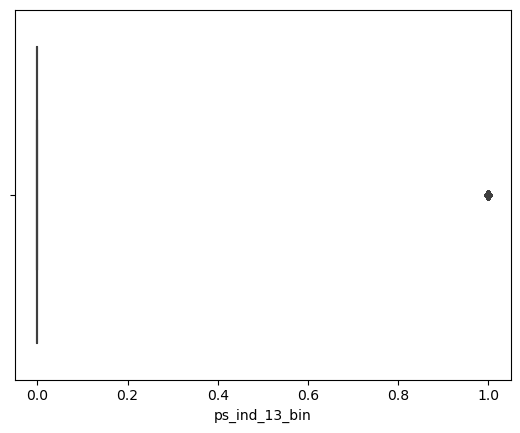

In [69]:
sns.boxplot(x='ps_ind_13_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_ind_13_bin', ylabel='Count'>

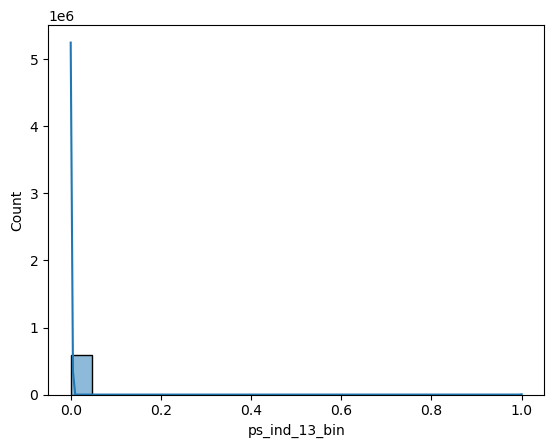

In [70]:
# checking distribution using histplot
sns.histplot(x='ps_ind_13_bin',kde=True,data=data)

In [71]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_13_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_13_bin.quantile(0.25)
Q3=data.ps_ind_13_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [72]:
data.loc[data['ps_ind_13_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [73]:
data.loc[data['ps_ind_13_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
4474      11480       0          0              1          7              0   
5762      14688       0          1              1          2              0   
5818      14835       0          4              2          6              1   
8245      20882       0          1              1          5              0   
8781      22198       0          2              3          4              0   
...         ...     ...        ...            ...        ...            ...   
591632  1478804       0          0              1          4              0   
592392  1480780       0          0              2          1              1   
592997  1482343       0          0              1          7              0   
593235  1482938       0          0              1          6              0   
594699  1486737       0          2              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
4474                0              1              0              0  ...   
5762                0              0              1              0  ...   
5818                0              0              1              0  ...   
8245                0              0              0              1  ...   
8781                0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
591632              0              0              0              1  ...   
592392              0              0              0              1  ...   
592997              0              0              0              1  ...   
593235              0              0              1              0  ...   
594699              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
4474             8           0           4          11               0   
5762             4           3           6           5               0   
5818             2           2           2           7               0   
8245             4           1           1           7               1   
8781             6           0           2           9               0   
...            ...         ...         ...         ...             ...   
591632           9           0           1          10               0   
592392           9           1           4          11               1   
592997           8           1           3           6               0   
593235           9           2           1           9               1   
594699           3           1           2           4               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
4474                 1               0               1               1   
5762                 1               0               0               0   
5818                 0               1               0               1   
8245                 0               0               1               0   
8781                 0               0               0               0   
...                ...             ...             ...             ...   
591632               0               1               0               1   
592392               0               1               0               1   
592997               0               0               0               0   
593235               1               1               0               0   
594699               1               0               0               0   

        ps_calc_20_bin  
4474                 0  
5762                 0  
5818                 1  
8245                 0  
8781                 0  
...                ...  
591632               0  
592392               0  
592997               1  
593235               0  
594699               0  

[563 rows x 59 columns]

In [74]:
# imputing outlier with median
data.loc[data['ps_ind_13_bin']>Upper_limit,'ps_ind_13_bin']=data.ps_ind_13_bin.median()

In [75]:
data.loc[data['ps_ind_13_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_ind_14


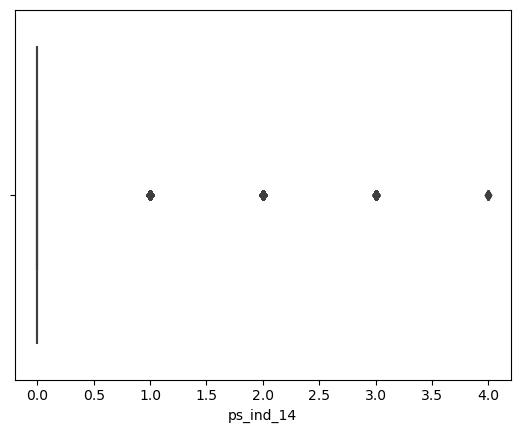

In [76]:
sns.boxplot(x='ps_ind_14',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [77]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_14,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_14.quantile(0.25)
Q3=data.ps_ind_14.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [78]:
data.loc[data['ps_ind_14']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [79]:
data.loc[data['ps_ind_14']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
47          120       0          0              1          9              0   
173         449       0          2              1          6              0   
225         564       0          0              1          5              0   
322         861       0          2              1          4              1   
325         870       0          2              2          2              1   
...         ...     ...        ...            ...        ...            ...   
594814  1487011       0          4              1          5              1   
594997  1487448       0          3              1          8              0   
595110  1487743       0          3              2          3              1   
595123  1487773       0          0              1          5              1   
595175  1487925       0          1              1          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
47                  0              0              1              0  ...   
173                 0              0              1              0  ...   
225                 0              0              1              0  ...   
322                 0              0              1              0  ...   
325                 0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
594814              0              0              0              1  ...   
594997              0              0              1              0  ...   
595110              0              0              0              1  ...   
595123              0              0              0              1  ...   
595175              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
47               4           5           3          11               0   
173              5           0           5           7               0   
225              3           2           3           9               0   
322              5           0           1           6               0   
325              6           4           3           9               0   
...            ...         ...         ...         ...             ...   
594814           4           0           2           8               0   
594997           5           1           4          11               0   
595110           8           0           4          11               0   
595123           8           2           3          11               1   
595175           5           1           1           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
47                   1               1               0               1   
173                  0               1               1               0   
225                  0               0               0               0   
322                  1               1               0               0   
325                  1               1               0               0   
...                ...             ...             ...             ...   
594814               0               1               1               0   
594997               1               1               0               0   
595110               1               1               0               0   
595123               0               0               0               0   
595175               1               0               0               0   

        ps_calc_20_bin  
47                   0  
173                  0  
225                  0  
322                  1  
325                  0  
...                ...  
594814               1  
594997               1  
595110               1  
595123               0  
595175               0  

[6376 rows x 59 columns]

In [80]:
# imputing outlier with median
data.loc[data['ps_ind_14']>Upper_limit,'ps_ind_14']=data.ps_ind_14.median()

In [81]:
data.loc[data['ps_ind_14']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_ind_15


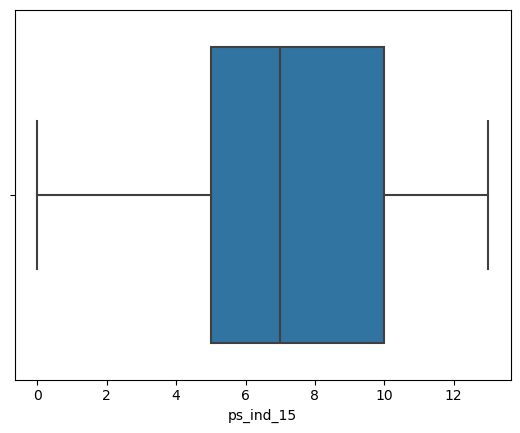

In [82]:
sns.boxplot(x='ps_ind_15',data=data)
plt.show()

###### No outlier present as per data visualization using boxplot.


In [83]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_15,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_15.quantile(0.25)
Q3=data.ps_ind_15.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  5.0
Lower_limit :  -2.5
Upper_limit :  17.5


In [84]:
data.loc[data['ps_ind_15']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [85]:
data.loc[data['ps_ind_15']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers in "ps_ind_15".

## ps_ind_16_bin

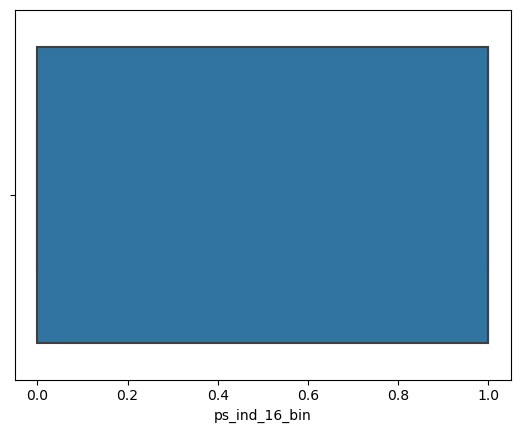

In [86]:
sns.boxplot(x='ps_ind_16_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_16_bin', ylabel='Count'>

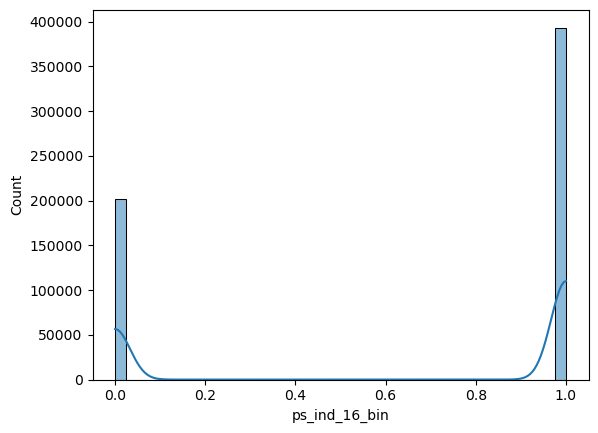

In [87]:
# checking distribution using histplot
sns.histplot(x='ps_ind_16_bin',data=data,kde=True)

In [88]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_16_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_16_bin.quantile(0.25)
Q3=data.ps_ind_16_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [89]:
data.loc[data['ps_ind_16_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [90]:
data.loc[data['ps_ind_16_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers in "ps_ind_16_bin".

## ps_ind_17_bin



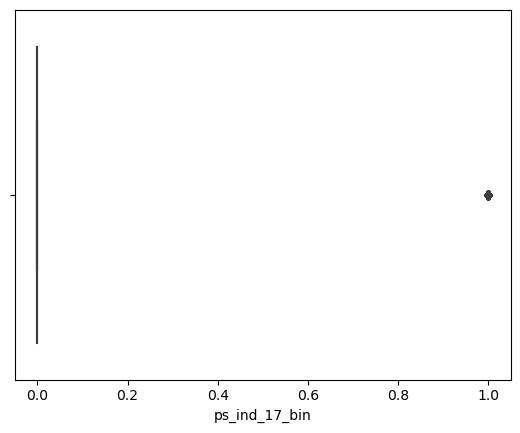

In [91]:
sns.boxplot(x='ps_ind_17_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_ind_17_bin', ylabel='Count'>

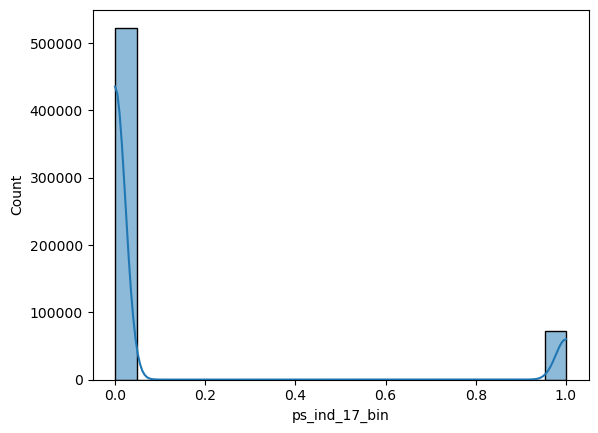

In [92]:
# checking distribution using histplot
sns.histplot(x='ps_ind_17_bin',data=data,kde=True)

In [93]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_17_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_17_bin.quantile(0.25)
Q3=data.ps_ind_17_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [94]:
data.loc[data['ps_ind_17_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [95]:
data.loc[data['ps_ind_17_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
30           89       0          0              1          6              0   
33           95       0          0              1          8              0   
45          117       0          1              1          6              1   
50          125       0          3              1          2              1   
...         ...     ...        ...            ...        ...            ...   
595151  1487843       0          2              1          8              0   
595169  1487902       0          5              2          3              0   
595173  1487911       0          1              1          7              0   
595191  1487968       0          5              1          3              0   
595203  1488005       0          3              2          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0                   0              0              1              0  ...   
30                  0              1              0              0  ...   
33                  0              1              0              0  ...   
45                  3              0              0              1  ...   
50                  0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
595151              0              0              0              1  ...   
595169              0              0              0              0  ...   
595173              0              1              0              0  ...   
595191              0              0              0              1  ...   
595203              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0                9           1           5           8               0   
30               5           3           1          11               0   
33               2           1           3          11               1   
45               4           1           4           6               1   
50               7           2           5           6               0   
...            ...         ...         ...         ...             ...   
595151           8           0           1           6               0   
595169           3           0           2          11               1   
595173           3           3           5           7               1   
595191           8           2           1          11               0   
595203           5           2           1           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0                    1               1               0               0   
30                   1               0               0               1   
33                   0               1               0               0   
45                   1               0               0               0   
50                   0               1               0               1   
...                ...             ...             ...             ...   
595151               1               0               0               0   
595169               0               1               0               0   
595173               0               1               0               0   
595191               0               1               1               0   
595203               0               0               0               0   

        ps_calc_20_bin  
0                    1  
30                   0  
33                   1  
45                   0  
50                   0  
...                ...  
595151               0  
595169               0  
595173               0  
595191               1  
595203               0  

[72036 rows x 59 columns]

In [96]:
# more than 5% outliers.
len(data.loc[data['ps_ind_17_bin']>Upper_limit])/len(data)

0.12102578577044817

- 12.1% outliers present in "ps_ind_17_bin".

## ps_ind_18_bin


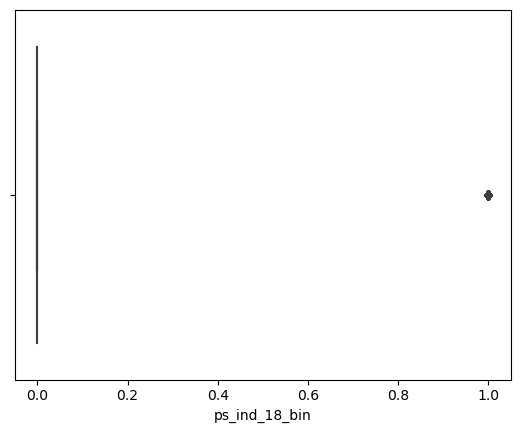

In [97]:
sns.boxplot(x='ps_ind_18_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [98]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_ind_18_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_18_bin.quantile(0.25)
Q3=data.ps_ind_18_bin.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [99]:
data.loc[data['ps_ind_18_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [100]:
data.loc[data['ps_ind_18_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
1             9       0          1              1          7              0   
9            28       1          1              1          2              0   
14           46       0          5              1         11              0   
15           48       0          5              1          3              1   
20           65       0          0              1          2              0   
...         ...     ...        ...            ...        ...            ...   
595167  1487899       0          0              2          3              1   
595179  1487937       0          5              1          3              0   
595184  1487952       0          1              1          5              0   
595195  1487980       0          0              3          3              1   
595196  1487983       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
1                   0              0              0              1  ...   
9                   0              0              1              0  ...   
14                  0              0              0              0  ...   
15                  0              0              1              0  ...   
20                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595167              0              0              0              0  ...   
595179              0              0              0              0  ...   
595184              0              1              0              0  ...   
595195              0              0              1              0  ...   
595196              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
1                3           1           1           9               0   
9                3           5           0           6               0   
14               4           1           3           9               0   
15               5           2           6           7               0   
20               7           2           2           4               0   
...            ...         ...         ...         ...             ...   
595167           6           4           3           9               0   
595179           4           0           2          10               0   
595184           7           0           3           9               0   
595195           8           0           2           5               0   
595196           6           0           1          11               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
1                    1               1               0               1   
9                    1               0               0               1   
14                   0               0               0               1   
15                   1               1               0               1   
20                   1               0               0               1   
...                ...             ...             ...             ...   
595167               0               1               0               0   
595179               0               1               0               1   
595184               0               0               0               0   
595195               1               0               0               1   
595196               1               0               0               1   

        ps_calc_20_bin  
1                    0  
9                    0  
14                   0  
15                   0  
20                   0  
...                ...  
595167               0  
595179               0  
595184               1  
595195               1  
595196               1  

[91320 rows x 59 columns]

In [101]:
# more than 5% outliers.
len(data.loc[data['ps_ind_18_bin']>Upper_limit])/len(data)

0.1534243261224572

- 15.3% outliers present in "ps_ind_18_bin".

## ps_reg_01



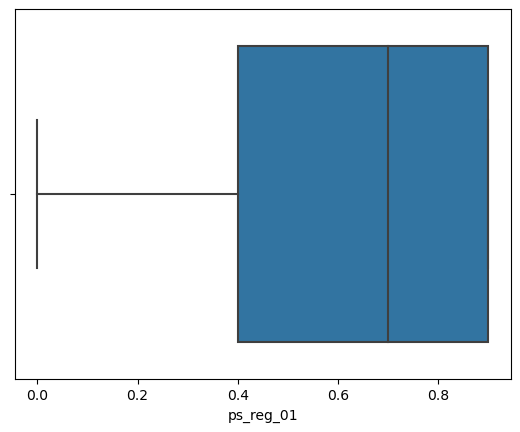

In [102]:
sns.boxplot(x='ps_reg_01',data=data)
plt.show()

###### No outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_reg_01', ylabel='Count'>

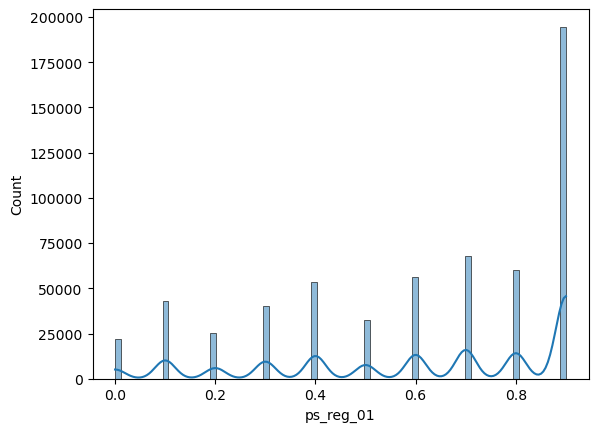

In [103]:
# checking distribution using histplot
sns.histplot(x='ps_reg_01',data=data,kde=True)

In [104]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_reg_01,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_reg_01.quantile(0.25)
Q3=data.ps_reg_01.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.5
Lower_limit :  -0.35
Upper_limit :  1.65


In [105]:
data.loc[data['ps_reg_01']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [106]:
data.loc[data['ps_reg_01']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers in "ps_reg_01".

## ps_reg_02



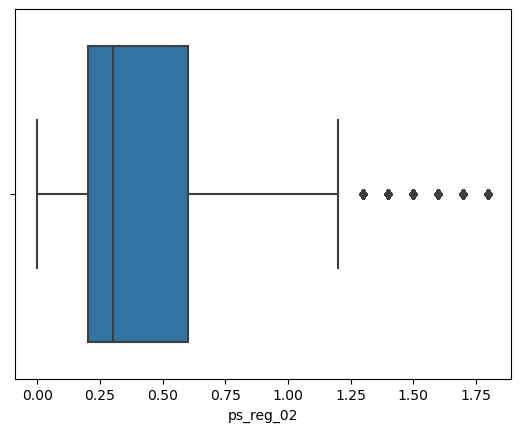

In [107]:
sns.boxplot(x='ps_reg_02',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [108]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_reg_02,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_reg_02.quantile(0.25)
Q3=data.ps_reg_02.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.39999999999999997
Lower_limit :  -0.39999999999999997
Upper_limit :  1.2


In [109]:
data.loc[data['ps_reg_02']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5            19       0          5              1          4              0   
9            28       1          1              1          2              0   
38          104       0          4              1          9              0   
93          227       0          7              1         10              0   
98          248       0          5              1          2              0   
...         ...     ...        ...            ...        ...            ...   
595052  1487575       0          5              1          4              0   
595065  1487606       0          5              1         11              0   
595084  1487667       0          5              1          9              1   
595107  1487740       0          2              1          5              0   
595203  1488005       0          3              2          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
5                   0              0              0              0  ...   
9                   0              0              1              0  ...   
38                  0              0              0              0  ...   
93                  0              0              1              0  ...   
98                  0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
595052              0              0              0              1  ...   
595065              0              0              0              0  ...   
595084              0              0              1              0  ...   
595107              0              0              0              0  ...   
595203              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
5                4           2           0           9               0   
9                3           5           0           6               0   
38               5           0           4           6               0   
93               5           3           1           4               0   
98               8           1           4          11               0   
...            ...         ...         ...         ...             ...   
595052           5           1           0           8               0   
595065           9           0           6           4               0   
595084           8           0           4           6               0   
595107           6           2           3           8               0   
595203           5           2           1           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
5                    1               0               1               1   
9                    1               0               0               1   
38                   1               0               0               1   
93                   0               1               0               0   
98                   0               1               0               0   
...                ...             ...             ...             ...   
595052               1               1               1               0   
595065               1               0               0               0   
595084               0               0               0               0   
595107               0               1               1               0   
595203               0               0               0               0   

        ps_calc_20_bin  
5                    1  
9                    0  
38                   0  
93                   0  
98                   1  
...                ...  
595052               1  
595065               0  
595084               1  
595107               0  
595203               0  

[36791 rows x 59 columns]

In [110]:
data.loc[data['ps_reg_02']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [111]:
# more than 5% outliers
len(data.loc[data['ps_reg_02']>Upper_limit])/len(data)

0.06181158982009771

- 6.2% outliers present in "ps_reg_02".

## ps_reg_03


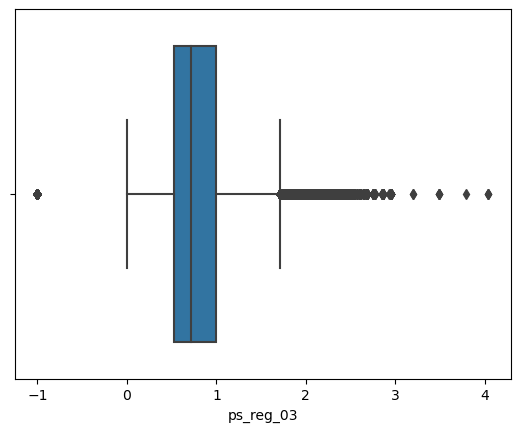

In [112]:
sns.boxplot(x='ps_reg_03',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_reg_03', ylabel='Count'>

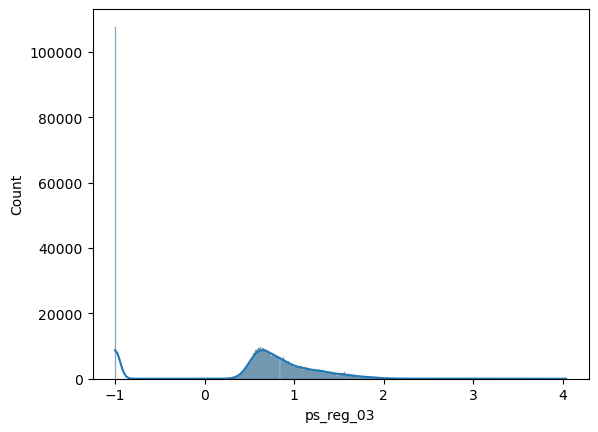

In [113]:
# checking distribution using histplot
sns.histplot(x='ps_reg_03',data=data,kde=True)

In [114]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_reg_03,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_reg_03.quantile(0.25)
Q3=data.ps_reg_03.quantile(0.75)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.475
Lower_limit :  -0.1874999999999999
Upper_limit :  1.7125


In [115]:
data.loc[data['ps_reg_03']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2            13       0          5              1          9              1   
15           48       0          5              1          3              1   
18           61       0          5              1          8              0   
23           74       0          2              1          2              1   
25           78       0          0              1          7              0   
...         ...     ...        ...            ...        ...            ...   
595175  1487925       0          1              1          7              1   
595188  1487962       0          2              1          3              0   
595190  1487964       0          1              2          3              0   
595194  1487976       0          0              1          7              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
2                   0              0              0              1  ...   
15                  0              0              1              0  ...   
18                  0              1              0              0  ...   
23                  0              0              1              0  ...   
25                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595175              0              1              0              0  ...   
595188              0              1              0              0  ...   
595190              0              1              0              0  ...   
595194              0              0              1              0  ...   
595211              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
2                4           2           7           7               0   
15               5           2           6           7               0   
18               3           1           6           5               0   
23               7           1           3           9               0   
25               6           4           4           4               0   
...            ...         ...         ...         ...             ...   
595175           5           1           1           8               0   
595188           8           1           6           6               0   
595190           1           0           4           6               0   
595194           6           1           4          12               0   
595211           4           4           3           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
2                    1               1               0               1   
15                   1               1               0               1   
18                   0               0               1               0   
23                   1               0               1               0   
25                   0               1               1               0   
...                ...             ...             ...             ...   
595175               1               0               0               0   
595188               1               1               0               0   
595190               0               1               0               0   
595194               1               1               0               0   
595211               1               0               0               0   

        ps_calc_20_bin  
2                    0  
15                   0  
18                   0  
23                   0  
25                   1  
...                ...  
595175               0  
595188               0  
595190               0  
595194               0  
595211               0  

[107693 rows x 59 columns]

In [116]:
data.loc[data['ps_reg_03']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5            19       0          5              1          4              0   
9            28       1          1              1          2              0   
127         330       0          2              1          4              0   
141         372       0          5              1          6              0   
156         413       0          4              1          5              0   
...         ...     ...        ...            ...        ...            ...   
594807  1486996       0          3              1          5              0   
594870  1487130       0          0              1          6              1   
594876  1487146       0          1              1          1              1   
595164  1487890       0          3              2          5              0   
595203  1488005       0          3              2          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
5                   0              0              0              0  ...   
9                   0              0              1              0  ...   
127                 0              0              0              0  ...   
141                 0              0              0              0  ...   
156                 0              0              0              0  ...   
...               ...            ...            ...            ...  ...   
594807              0              0              0              0  ...   
594870              0              0              0              0  ...   
594876              0              1              0              0  ...   
595164              0              0              1              0  ...   
595203              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
5                4           2           0           9               0   
9                3           5           0           6               0   
127              8           1           2           5               0   
141              5           1           3           8               0   
156              8           1           6          10               0   
...            ...         ...         ...         ...             ...   
594807           5           1           0           8               0   
594870           7           1           3           6               1   
594876           5           1           1           7               0   
595164           8           1           3           7               0   
595203           5           2           1           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
5                    1               0               1               1   
9                    1               0               0               1   
127                  0               0               0               0   
141                  1               1               0               0   
156                  1               1               0               1   
...                ...             ...             ...             ...   
594807               1               1               1               0   
594870               1               1               1               0   
594876               1               1               0               0   
595164               0               1               1               0   
595203               0               0               0               0   

        ps_calc_20_bin  
5                    1  
9                    0  
127                  0  
141                  0  
156                  0  
...                ...  
594807               0  
594870               0  
594876               0  
595164               1  
595203               0  

[13092 rows x 59 columns]

In [117]:
a=len(data.loc[data['ps_reg_03']<Lower_limit])
b=len(data.loc[data['ps_reg_03']>Upper_limit])
c=(a+b)/len(data)
c

0.202927696350208

- 20.3% outliers present in "ps_reg_03".

## ps_car_01_cat


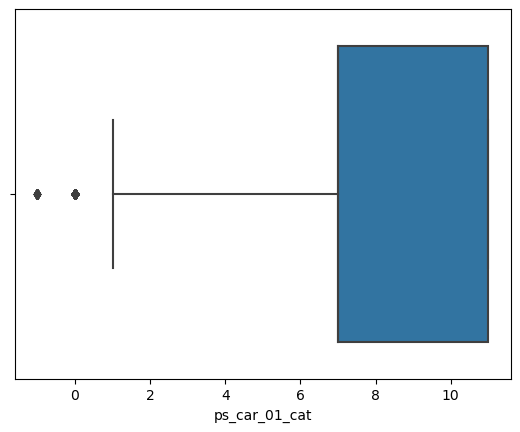

In [118]:
sns.boxplot(x='ps_car_01_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_01_cat', ylabel='Count'>

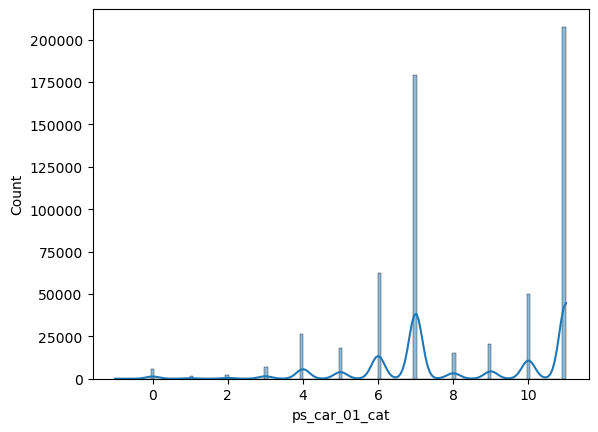

In [119]:
# checking distribution using histplot
sns.histplot(x='ps_car_01_cat',data=data,kde=True)

In [120]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_01_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_01_cat.quantile(0.25)
Q3=data.ps_car_01_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  4.0
Lower_limit :  5.0
Upper_limit :  17.0


In [121]:
data.loc[data['ps_car_01_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
24           77       0          0              1          2              0   
25           78       0          0              1          7              0   
27           80       0          4              1          6              0   
28           84       1          0              2          0              1   
56          144       0          0              2          5              0   
...         ...     ...        ...            ...        ...            ...   
595121  1487763       0          7              1         10              0   
595161  1487878       0          2              1          8              0   
595165  1487892       0          2              1          1              0   
595179  1487937       0          5              1          3              0   
595195  1487980       0          0              3          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
24                  0              1              0              0  ...   
25                  0              1              0              0  ...   
27                  0              0              0              0  ...   
28                  4              1              0              0  ...   
56                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595121              0              0              0              0  ...   
595161              0              1              0              0  ...   
595165              0              1              0              0  ...   
595179              0              0              0              0  ...   
595195              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
24               5           1           2           8               0   
25               6           4           4           4               0   
27               7           2           2          11               0   
28               3           2           0           8               0   
56               3           0           2           4               0   
...            ...         ...         ...         ...             ...   
595121          10           1           4           7               0   
595161           3           1           0          10               1   
595165           7           5           2           5               0   
595179           4           0           2          10               0   
595195           8           0           2           5               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
24                   1               1               1               0   
25                   0               1               1               0   
27                   1               0               1               0   
28                   1               1               0               0   
56                   1               0               0               1   
...                ...             ...             ...             ...   
595121               1               1               0               0   
595161               1               1               1               1   
595165               0               1               1               1   
595179               0               1               0               1   
595195               1               0               0               1   

        ps_calc_20_bin  
24                   0  
25                   1  
27                   0  
28                   0  
56                   0  
...                ...  
595121               0  
595161               0  
595165               1  
595179               0  
595195               1  

[42358 rows x 59 columns]

In [122]:
data.loc[data['ps_car_01_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [123]:
# more than 5% outliers
len(data.loc[data['ps_car_01_cat']<Lower_limit])/len(data)

0.07116455985430402

- 7.1% outliers present in "ps_car_01_cat".

## ps_car_02_cat


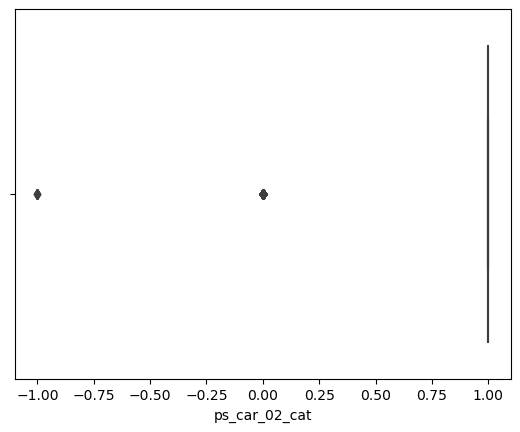

In [124]:
sns.boxplot(x='ps_car_02_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_02_cat', ylabel='Count'>

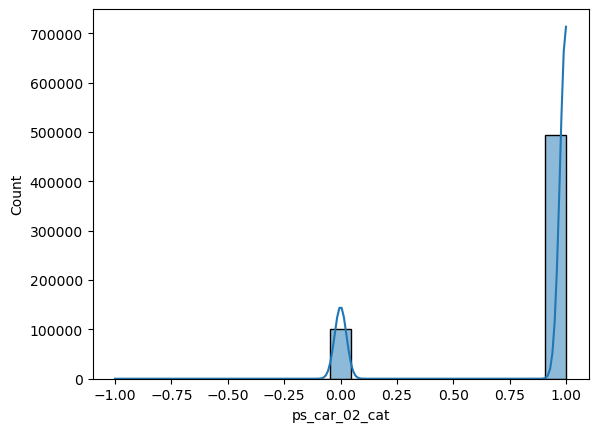

In [125]:
# checking distribution using histplot
sns.histplot(x='ps_car_02_cat',data=data,kde=True)

In [126]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_02_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_02_cat.quantile(0.25)
Q3=data.ps_car_02_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  1.0
Upper_limit :  1.0


In [127]:
data.loc[data['ps_car_02_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5            19       0          5              1          4              0   
9            28       1          1              1          2              0   
11           35       0          2              1          3              1   
22           72       0          5              3          6              1   
28           84       1          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595176  1487931       0          2              1          4              0   
595178  1487935       0          0              1          5              1   
595193  1487975       0          0              2          0              0   
595195  1487980       0          0              3          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
5                   0              0              0              0  ...   
9                   0              0              1              0  ...   
11                  0              0              1              0  ...   
22                  3              0              1              0  ...   
28                  4              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595176              0              0              0              1  ...   
595178              0              1              0              0  ...   
595193             -1              0              1              0  ...   
595195              0              0              1              0  ...   
595211              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
5                4           2           0           9               0   
9                3           5           0           6               0   
11               9           2           1          10               0   
22               8           1           3           5               0   
28               3           2           0           8               0   
...            ...         ...         ...         ...             ...   
595176           7           2           4           5               0   
595178           6           2           5          10               0   
595193           6           1           3           5               0   
595195           8           0           2           5               0   
595211           4           4           3           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
5                    1               0               1               1   
9                    1               0               0               1   
11                   1               0               1               0   
22                   0               0               0               0   
28                   1               1               0               0   
...                ...             ...             ...             ...   
595176               1               1               0               0   
595178               1               0               1               1   
595193               1               0               1               0   
595195               1               0               0               1   
595211               1               0               0               0   

        ps_calc_20_bin  
5                    1  
9                    0  
11                   0  
22                   1  
28                   0  
...                ...  
595176               1  
595178               0  
595193               0  
595195               1  
595211               0  

[101283 rows x 59 columns]

In [128]:
data.loc[data['ps_car_02_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [129]:
# more than 5% outliers
len(data.loc[data['ps_car_02_cat']<Lower_limit])/len(data)

0.17016289994153344

- 17% outliers present in "ps_car_02_cat".

## ps_car_03_cat


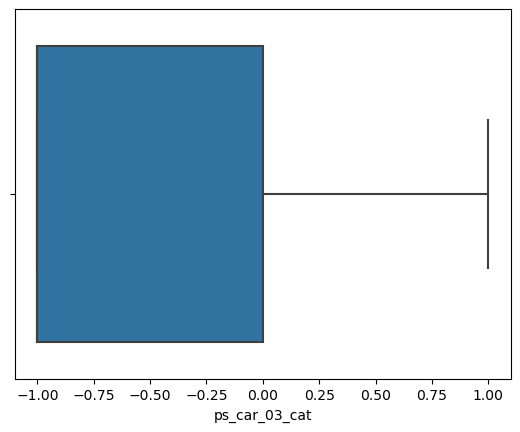

In [130]:
sns.boxplot(x='ps_car_03_cat',data=data)
plt.show()

###### No outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_03_cat', ylabel='Count'>

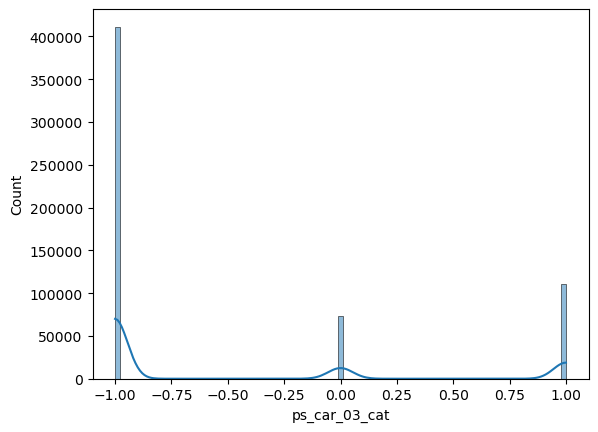

In [131]:
# checking distribution using histplot
sns.histplot(x='ps_car_03_cat',data=data,kde=True)

In [132]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_03_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_03_cat.quantile(0.25)
Q3=data.ps_car_03_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Lower_limit :  -1.5
Upper_limit :  1.5


In [133]:
data.loc[data['ps_car_03_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [134]:
data.loc[data['ps_car_03_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- No outliers present in "ps_car_03_cat".

## ps_car_04_cat


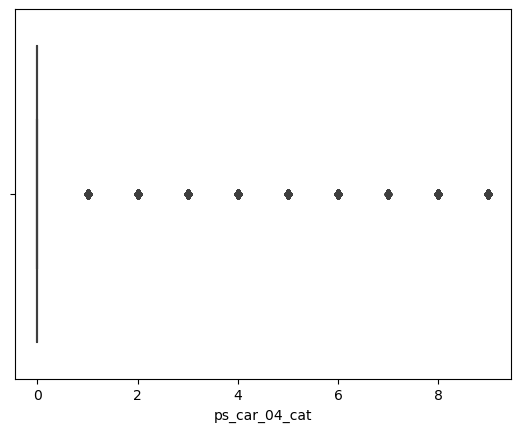

In [135]:
sns.boxplot(x='ps_car_04_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.


<AxesSubplot:xlabel='ps_car_04_cat', ylabel='Count'>

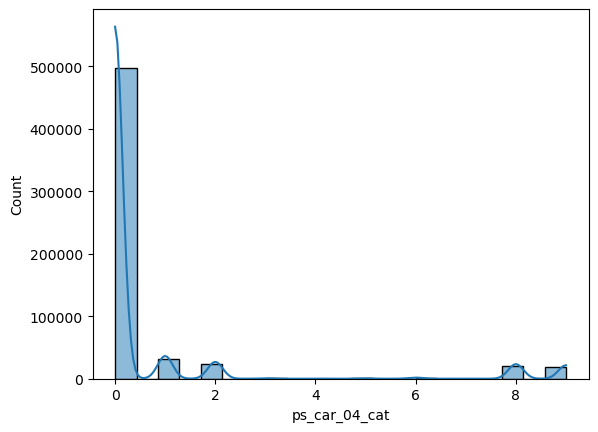

In [136]:
# checking distribution using histplot
sns.histplot(x='ps_car_04_cat',data=data,kde=True)

In [137]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_04_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_04_cat.quantile(0.25)
Q3=data.ps_car_04_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [138]:
data.loc[data['ps_car_04_cat']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9            28       1          1              1          2              0   
10           34       0          5              2          2              0   
15           48       0          5              1          3              1   
16           50       0          1              2          1              0   
25           78       0          0              1          7              0   
...         ...     ...        ...            ...        ...            ...   
595184  1487952       0          1              1          5              0   
595187  1487958       0          0              1          7              0   
595196  1487983       0          1              1          2              0   
595197  1487988       0          1              1          7              1   
595206  1488011       0          0              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
9                   0              0              1              0  ...   
10                  0              0              0              1  ...   
15                  0              0              1              0  ...   
16                  0              0              0              1  ...   
25                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595184              0              1              0              0  ...   
595187              4              0              0              0  ...   
595196              0              1              0              0  ...   
595197              0              0              1              0  ...   
595206              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
9                3           5           0           6               0   
10               6           3           3           6               0   
15               5           2           6           7               0   
16               3           3           1           8               0   
25               6           4           4           4               0   
...            ...         ...         ...         ...             ...   
595184           7           0           3           9               0   
595187           5           1           4           9               0   
595196           6           0           1          11               1   
595197           4           1           3           6               0   
595206           8           0           1           7               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
9                    1               0               0               1   
10                   1               1               0               1   
15                   1               1               0               1   
16                   0               1               0               0   
25                   0               1               1               0   
...                ...             ...             ...             ...   
595184               0               0               0               0   
595187               1               1               0               0   
595196               1               0               0               1   
595197               0               1               1               1   
595206               1               1               0               0   

        ps_calc_20_bin  
9                    0  
10                   1  
15                   0  
16                   0  
25                   1  
...                ...  
595184               1  
595187               1  
595196               1  
595197               0  
595206               0  

[98575 rows x 59 columns]

In [139]:
data.loc[data['ps_car_04_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [140]:
# more than 5% outlier present
len(data.loc[data['ps_car_04_cat']>Upper_limit])/len(data)

0.16561326048533967

- 16.6% outliers present in "ps_car_04_cat".

## ps_car_05_cat

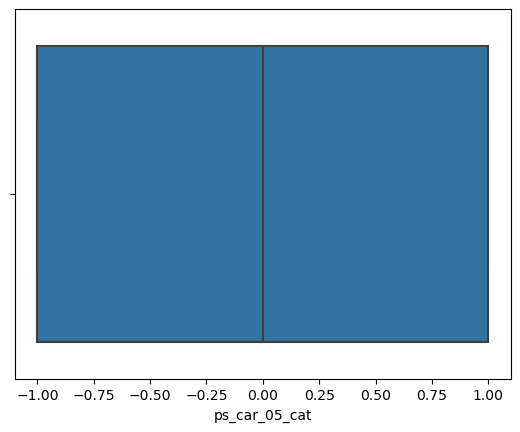

In [141]:
sns.boxplot(x='ps_car_05_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_05_cat', ylabel='Count'>

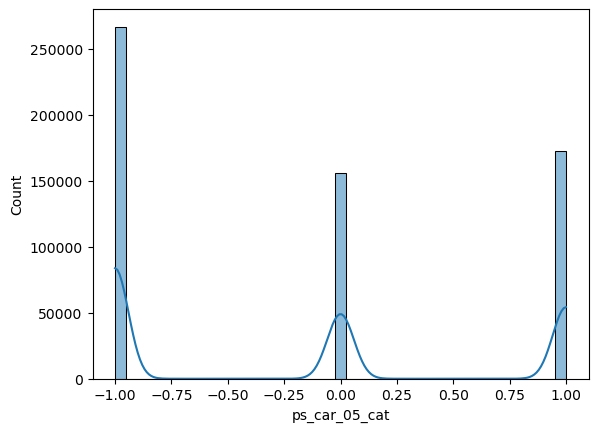

In [142]:
# checking distribution using histplot
sns.histplot(x='ps_car_05_cat',data=data,kde=True)

In [143]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_05_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_05_cat.quantile(0.25)
Q3=data.ps_car_05_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Lower_limit :  -2.0
Upper_limit :  4.0


In [144]:
data.loc[data['ps_car_05_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [145]:
data.loc[data['ps_car_05_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers present in "ps_car_05_cat".

## ps_car_06_cat

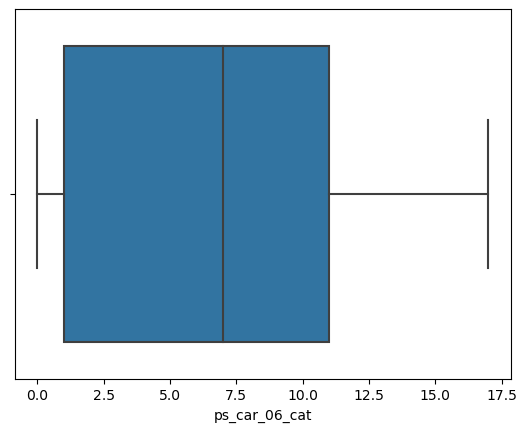

In [146]:
sns.boxplot(x='ps_car_06_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_06_cat', ylabel='Count'>

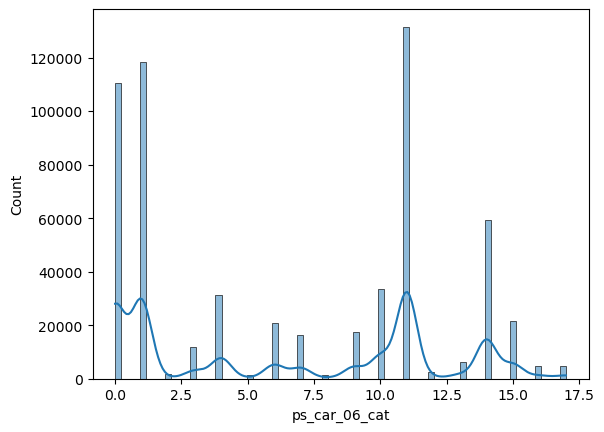

In [147]:
# checking distribution using histplot
sns.histplot(x='ps_car_06_cat',data=data,kde=True)

In [148]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_06_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_06_cat.quantile(0.25)
Q3=data.ps_car_06_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  10.0
Lower_limit :  -4.0
Upper_limit :  26.0


In [149]:
data.loc[data['ps_car_06_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [150]:
data.loc[data['ps_car_06_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers present in "ps_car_06_cat".

## ps_car_07_cat


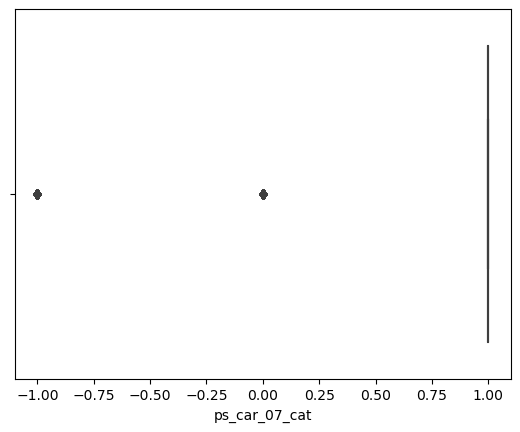

In [151]:
sns.boxplot(x='ps_car_07_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_07_cat', ylabel='Count'>

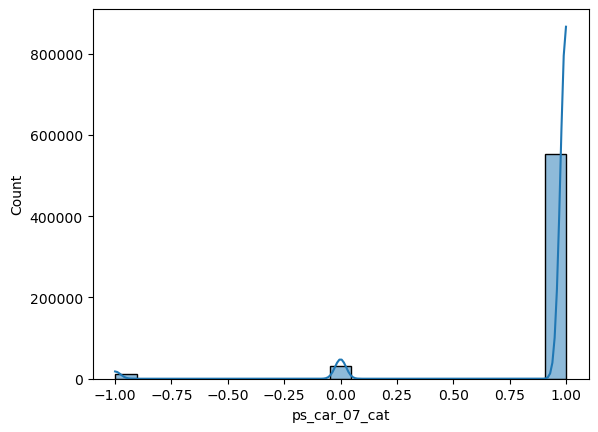

In [152]:
# checking distribution using histplot
sns.histplot(x='ps_car_07_cat',data=data,kde=True)

In [153]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_07_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_07_cat.quantile(0.25)
Q3=data.ps_car_07_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  1.0
Upper_limit :  1.0


In [154]:
data.loc[data['ps_car_07_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
95          235       0          3              1          6              0   
99          261       0          0              1          5              0   
113         306       0          2              1          6              0   
130         340       0          0              1          6              0   
152         404       0          2              2          1              0   
...         ...     ...        ...            ...        ...            ...   
595184  1487952       0          1              1          5              0   
595187  1487958       0          0              1          7              0   
595193  1487975       0          0              2          0              0   
595196  1487983       0          1              1          2              0   
595208  1488016       0          5              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
95                  0              0              1              0  ...   
99                  6              1              0              0  ...   
113                 0              0              0              1  ...   
130                 0              1              0              0  ...   
152                -1              0              0              0  ...   
...               ...            ...            ...            ...  ...   
595184              0              1              0              0  ...   
595187              4              0              0              0  ...   
595193             -1              0              1              0  ...   
595196              0              1              0              0  ...   
595208              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
95               5           1           3           6               0   
99               3           1           3           6               0   
113              2           2           2          12               1   
130              5           0           5           5               1   
152              6           2           3           7               0   
...            ...         ...         ...         ...             ...   
595184           7           0           3           9               0   
595187           5           1           4           9               0   
595193           6           1           3           5               0   
595196           6           0           1          11               1   
595208           4           1           3           8               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
95                   1               0               0               0   
99                   1               1               0               0   
113                  0               1               0               0   
130                  1               1               0               1   
152                  1               1               1               1   
...                ...             ...             ...             ...   
595184               0               0               0               0   
595187               1               1               0               0   
595193               1               0               1               0   
595196               1               0               0               1   
595208               0               1               0               1   

        ps_calc_20_bin  
95                   0  
99                   1  
113                  0  
130                  0  
152                  0  
...                ...  
595184               1  
595187               1  
595193               0  
595196               1  
595208               1  

[42067 rows x 59 columns]

In [155]:
data.loc[data['ps_car_07_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [156]:
# more than 5% outlier"
len(data.loc[data['ps_car_07_cat']<Lower_limit])/len(data)

0.07067565842086516

- 7.1% outliers present in "ps_car_07_cat".

## ps_car_08_cat


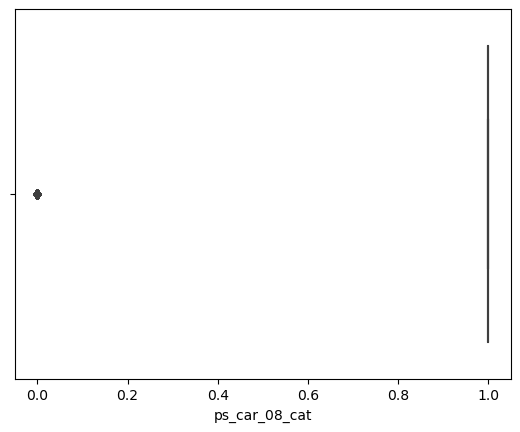

In [157]:
sns.boxplot(x='ps_car_08_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_08_cat', ylabel='Count'>

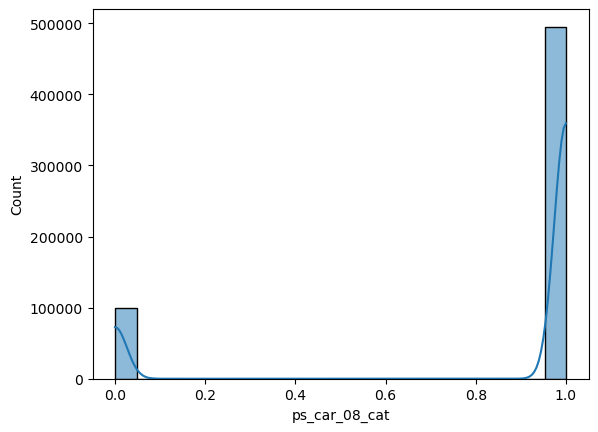

In [158]:
# checking distribution using histplot
sns.histplot(x='ps_car_08_cat',data=data,kde=True)

In [159]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_08_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_08_cat.quantile(0.25)
Q3=data.ps_car_08_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  1.0
Upper_limit :  1.0


In [160]:
data.loc[data['ps_car_08_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
11           35       0          2              1          3              1   
15           48       0          5              1          3              1   
17           58       0          5              1          6              0   
26           79       0          0              1          4              1   
...         ...     ...        ...            ...        ...            ...   
595195  1487980       0          0              3          3              1   
595199  1487992       0          3              1          3              1   
595203  1488005       0          3              2          3              1   
595208  1488016       0          5              1          3              0   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0                   0              0              1              0  ...   
11                  0              0              1              0  ...   
15                  0              0              1              0  ...   
17                  1              1              0              0  ...   
26                  0              0              0              1  ...   
...               ...            ...            ...            ...  ...   
595195              0              0              1              0  ...   
595199              0              0              0              1  ...   
595203              0              0              1              0  ...   
595208              0              0              0              0  ...   
595211              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0                9           1           5           8               0   
11               9           2           1          10               0   
15               5           2           6           7               0   
17               9           1           3           9               0   
26               4           2           4           3               0   
...            ...         ...         ...         ...             ...   
595195           8           0           2           5               0   
595199           1           1           1          10               0   
595203           5           2           1           6               0   
595208           4           1           3           8               1   
595211           4           4           3           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0                    1               1               0               0   
11                   1               0               1               0   
15                   1               1               0               1   
17                   1               1               0               0   
26                   1               1               1               0   
...                ...             ...             ...             ...   
595195               1               0               0               1   
595199               0               1               0               1   
595203               0               0               0               0   
595208               0               1               0               1   
595211               1               0               0               0   

        ps_calc_20_bin  
0                    1  
11                   0  
15                   0  
17                   0  
26                   1  
...                ...  
595195               1  
595199               0  
595203               0  
595208               1  
595211               0  

[100013 rows x 59 columns]

In [161]:
data.loc[data['ps_car_08_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [162]:
# more than 5% outlier present
len(data.loc[data['ps_car_08_cat']<Lower_limit])/len(data)

0.16802920640040858

- 16.8% outliers present in "ps_car_08_cat".

## ps_car_09_cat


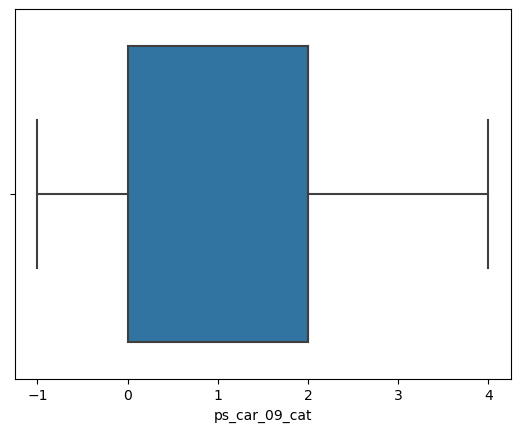

In [163]:
sns.boxplot(x='ps_car_09_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_09_cat', ylabel='Count'>

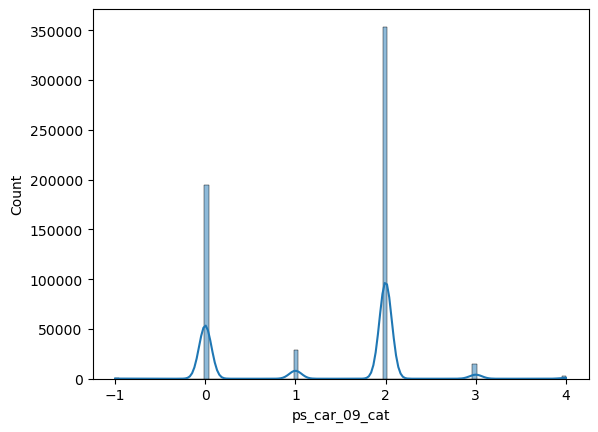

In [164]:
# checking distribution using histplot
sns.histplot(x='ps_car_09_cat',data=data,kde=True)

In [165]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_09_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_09_cat.quantile(0.25)
Q3=data.ps_car_09_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Lower_limit :  -1.0
Upper_limit :  5.0


In [166]:
data.loc[data['ps_car_09_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [167]:
data.loc[data['ps_car_09_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers present in "ps_car_09_cat".

## ps_car_10_cat


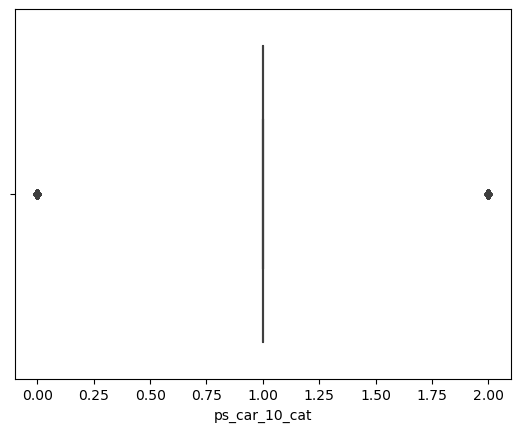

In [168]:
sns.boxplot(x='ps_car_10_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [169]:
# finding lower & upper limit using IQR

IQR3=stats.iqr(data.ps_car_10_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_10_cat.quantile(0.25)
Q3=data.ps_car_10_cat.quantile(0.75)

lower=Q1-1.5*IQR3
print('lower : ',lower)
upper=Q3+1.5*IQR
print('upper : ',upper)

IQR :  2.0
lower :  1.0
upper :  4.0


In [170]:
data.loc[data['ps_car_10_cat']<lower]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
148         397       0          5              2          7              1   
430        1162       0          1              1          5              1   
514        1394       0          0              1          9              0   
759        1962       0          0              1          9              0   
847           0       0          0              0          0              0   
...         ...     ...        ...            ...        ...            ...   
594512  1486259       0          1              1          6              0   
594546  1486336       0          5              2          5              1   
594548  1486340       0          1              1          9              0   
594571  1486403       0          1              1          2              0   
594860  1487106       0          1              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
148                 0              1              0              0  ...   
430                 0              1              0              0  ...   
514                 0              1              0              0  ...   
759                 0              1              0              0  ...   
847                 0              0              0              0  ...   
...               ...            ...            ...            ...  ...   
594512              0              0              0              0  ...   
594546              0              0              0              0  ...   
594548              0              1              0              0  ...   
594571              0              1              0              0  ...   
594860              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
148              4           1           1          10               0   
430              6           1           0           6               0   
514              3           1           3           8               0   
759              5           3           2           9               0   
847              0           0           0           0               0   
...            ...         ...         ...         ...             ...   
594512           5           2           3           9               0   
594546           4           2           2           7               0   
594548           5           1           5          14               0   
594571           4           0           3           7               0   
594860           7           3           0           5               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
148                  1               1               0               0   
430                  0               1               0               0   
514                  1               0               1               0   
759                  1               0               0               1   
847                  0               0               0               0   
...                ...             ...             ...             ...   
594512               0               0               0               1   
594546               0               1               0               1   
594548               0               0               0               1   
594571               1               1               0               0   
594860               1               1               0               1   

        ps_calc_20_bin  
148                  0  
430                  0  
514                  0  
759                  0  
847                  0  
...                ...  
594512               1  
594546               0  
594548               0  
594571               0  
594860               0  

[4935 rows x 59 columns]

In [171]:
data.loc[data['ps_car_10_cat']>upper]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [172]:
# imputing outlier with median
data.loc[data['ps_car_10_cat']<lower,'ps_car_10_cat']=data.ps_car_10_cat.median()

In [173]:
data.loc[data['ps_car_10_cat']>upper,'ps_car_10_cat']=data.ps_car_10_cat.median()

In [174]:
data.loc[data['ps_car_10_cat']<lower]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [175]:
data.loc[data['ps_car_10_cat']>upper]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_car_11_cat
.

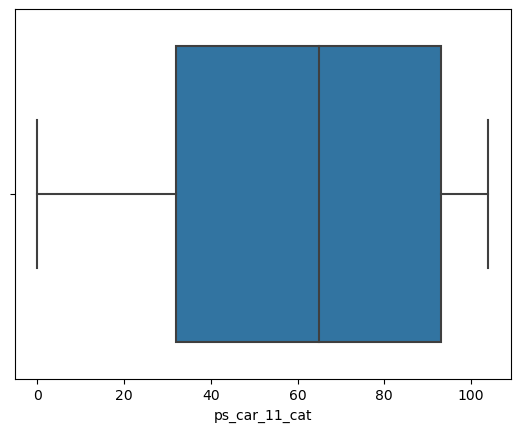

In [176]:
sns.boxplot(x='ps_car_11_cat',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot

<AxesSubplot:xlabel='ps_car_11_cat', ylabel='Count'>

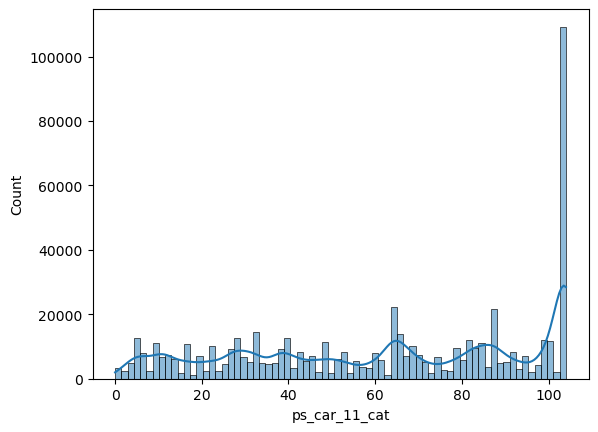

In [177]:
# checking distribution using histplot
sns.histplot(x='ps_car_11_cat',data=data,kde=True)

In [178]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_11_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_11_cat.quantile(0.25)
Q3=data.ps_car_11_cat.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  61.0
Lower_limit :  1.5
Upper_limit :  184.5


In [179]:
data.loc[data['ps_car_11_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
47          120       0          0              1          9              0   
193         489       0          4              3          6              1   
228         570       0          0              1          8              0   
440        1193       0          3              1          2              0   
539        1455       0          1              1          8              0   
...         ...     ...        ...            ...        ...            ...   
592828  1481896       0          1              3          2              0   
592830  1481899       0          3              1          8              0   
593451  1483511       0          2              1          6              0   
593811  1484469       0          1              2          3              0   
595127  1487783       0          2              3          4              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
47                  0              0              1              0  ...   
193                 0              0              0              1  ...   
228                 0              1              0              0  ...   
440                 0              0              0              1  ...   
539                 0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
592828              0              0              0              1  ...   
592830              0              0              0              1  ...   
593451              0              0              0              1  ...   
593811              0              0              0              1  ...   
595127              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
47               4           5           3          11               0   
193              4           1           2          10               0   
228             12           0           1          13               0   
440              5           5           0           8               0   
539              7           2           5           6               0   
...            ...         ...         ...         ...             ...   
592828           5           2           4           7               0   
592830           4           0           1           4               0   
593451           7           3           1           5               0   
593811           2           0           3           3               0   
595127           5           2           3           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
47                   1               1               0               1   
193                  1               1               0               0   
228                  0               1               0               0   
440                  1               1               0               0   
539                  1               1               0               1   
...                ...             ...             ...             ...   
592828               1               1               0               1   
592830               1               1               0               1   
593451               0               0               0               0   
593811               1               0               0               0   
595127               1               1               0               0   

        ps_calc_20_bin  
47                   0  
193                  0  
228                  0  
440                  0  
539                  0  
...                ...  
592828               0  
592830               1  
593451               0  
593811               0  
595127               0  

[3414 rows x 59 columns]

In [180]:
data.loc[data['ps_car_11_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [181]:
#imputing median with lower limit
data.loc[data['ps_car_11_cat']<Lower_limit,'ps_car_11_cat']=data.ps_car_11_cat.median()

In [182]:
data.loc[data['ps_car_11_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_car_11


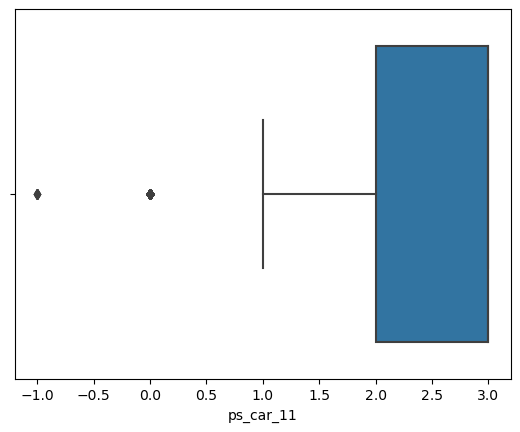

In [183]:
sns.boxplot(x='ps_car_11',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_11', ylabel='Count'>

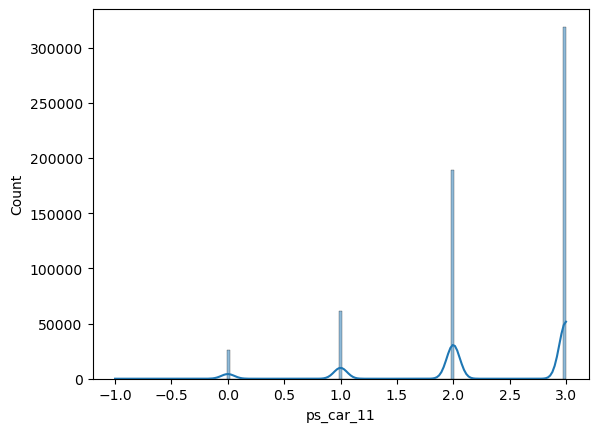

In [184]:
# checking distribution using histplot
sns.histplot(x='ps_car_11',data=data,kde=True)

In [185]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_11,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_11.quantile(0.25)
Q3=data.ps_car_11.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Lower_limit :  1.5
Upper_limit :  4.5


In [186]:
data.loc[data['ps_car_11']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2            13       0          5              1          9              1   
3            16       0          0              1          2              0   
14           46       0          5              1         11              0   
33           95       0          0              1          8              0   
35           98       0          2              1          1              1   
...         ...     ...        ...            ...        ...            ...   
595167  1487899       0          0              2          3              1   
595184  1487952       0          1              1          5              0   
595187  1487958       0          0              1          7              0   
595190  1487964       0          1              2          3              0   
595196  1487983       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
2                   0              0              0              1  ...   
3                   0              1              0              0  ...   
14                  0              0              0              0  ...   
33                  0              1              0              0  ...   
35                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595167              0              0              0              0  ...   
595184              0              1              0              0  ...   
595187              4              0              0              0  ...   
595190              0              1              0              0  ...   
595196              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
2                4           2           7           7               0   
3                2           2           4           9               0   
14               4           1           3           9               0   
33               2           1           3          11               1   
35               9           1           3          14               0   
...            ...         ...         ...         ...             ...   
595167           6           4           3           9               0   
595184           7           0           3           9               0   
595187           5           1           4           9               0   
595190           1           0           4           6               0   
595196           6           0           1          11               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
2                    1               1               0               1   
3                    0               0               0               0   
14                   0               0               0               1   
33                   0               1               0               0   
35                   0               0               0               1   
...                ...             ...             ...             ...   
595167               0               1               0               0   
595184               0               0               0               0   
595187               1               1               0               0   
595190               0               1               0               0   
595196               1               0               0               1   

        ps_calc_20_bin  
2                    0  
3                    0  
14                   0  
33                   1  
35                   0  
...                ...  
595167               0  
595184               1  
595187               1  
595190               0  
595196               1  

[87010 rows x 59 columns]

In [187]:
data.loc[data['ps_car_11']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [188]:
# more than 5% outliers present
len(data.loc[data['ps_car_11']<Lower_limit])/len(data)

0.14618320867186818

- 14.6% outliers present in "ps_car_11".

## ps_car_12

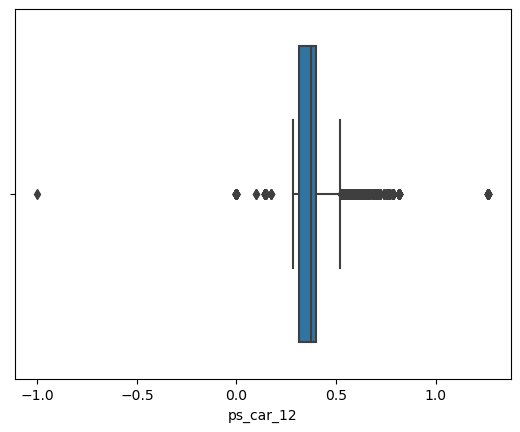

In [189]:
sns.boxplot(x='ps_car_12',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_12', ylabel='Count'>

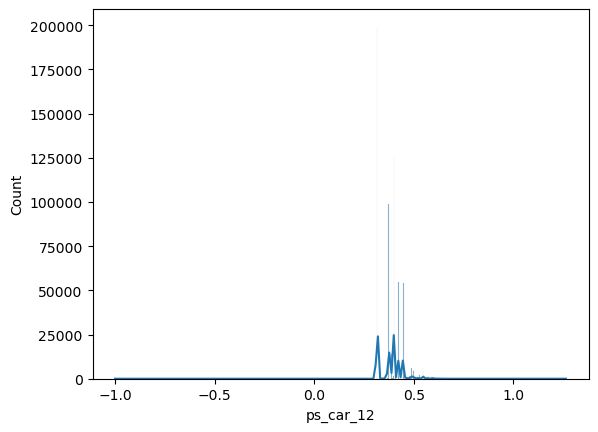

In [190]:
# checking distribution using histplot
sns.histplot(x='ps_car_12',data=data,kde=True)

In [191]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_12,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_12.quantile(0.25)
Q3=data.ps_car_12.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.083772234
Lower_limit :  0.274341649
Upper_limit :  0.525658351


In [192]:
data.loc[data['ps_car_12']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
847           0       0          0              0          0              0   
3185       8146       0          2              1          6              1   
3621       9317       0          0              1          2              0   
9515      24064       0          0              2          1              1   
12329         0       0          0              0          0              0   
...         ...     ...        ...            ...        ...            ...   
579049        0       0          0              0          0              0   
587628        0       0          0              0          0              0   
591450  1478370       0          5              1          4              0   
592046  1479889       0          0              1         10              1   
594806  1486994       0          5              1          5              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
847                 0              0              0              0  ...   
3185                0              0              0              0  ...   
3621                0              1              0              0  ...   
9515                0              0              1              0  ...   
12329               0              0              0              0  ...   
...               ...            ...            ...            ...  ...   
579049              0              0              0              0  ...   
587628              0              0              0              0  ...   
591450              0              1              0              0  ...   
592046              0              0              0              0  ...   
594806              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
847              0           0           0           0               0   
3185             7           0           3          10               0   
3621             3           2           6           4               0   
9515             7           3           4           9               0   
12329            0           0           0           0               0   
...            ...         ...         ...         ...             ...   
579049           0           0           0           0               0   
587628           0           0           0           0               0   
591450           1           2           3           5               1   
592046           5           2           3          12               0   
594806           8           3           1           6               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
847                  0               0               0               0   
3185                 0               0               1               0   
3621                 0               1               0               0   
9515                 1               0               1               0   
12329                0               0               0               0   
...                ...             ...             ...             ...   
579049               0               0               0               0   
587628               0               0               0               0   
591450               1               0               0               1   
592046               1               1               0               0   
594806               1               1               0               0   

        ps_calc_20_bin  
847                  0  
3185                 0  
3621                 0  
9515                 1  
12329                0  
...                ...  
579049               0  
587628               0  
591450               0  
592046               0  
594806               0  

[144 rows x 59 columns]

In [193]:
data.loc[data['ps_car_12']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
15           48       0          5              1          3              1   
25           78       0          0              1          7              0   
158         420       0          1              1          7              0   
180         464       0          5              1          8              0   
222         554       0          5              1          5              0   
...         ...     ...        ...            ...        ...            ...   
594995  1487443       0          2              1          2              0   
594997  1487448       0          3              1          8              0   
595084  1487667       0          5              1          9              1   
595137  1487810       0          0              1          4              0   
595166  1487897       0          5              1          6              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
15                  0              0              1              0  ...   
25                  0              1              0              0  ...   
158                 0              0              0              1  ...   
180                 0              0              0              0  ...   
222                 0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
594995              0              0              1              0  ...   
594997              0              0              1              0  ...   
595084              0              0              1              0  ...   
595137              0              0              0              0  ...   
595166              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
15               5           2           6           7               0   
25               6           4           4           4               0   
158              4           1           2          12               0   
180              9           0           1           7               0   
222              9           0           1           6               0   
...            ...         ...         ...         ...             ...   
594995           4           1           6           5               0   
594997           5           1           4          11               0   
595084           8           0           4           6               0   
595137           7           2           2           3               1   
595166           3           0           4           5               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
15                   1               1               0               1   
25                   0               1               1               0   
158                  1               1               1               0   
180                  0               0               0               0   
222                  1               1               0               0   
...                ...             ...             ...             ...   
594995               1               1               0               1   
594997               1               1               0               0   
595084               0               0               0               0   
595137               0               0               0               1   
595166               1               0               0               1   

        ps_calc_20_bin  
15                   0  
25                   1  
158                  0  
180                  0  
222                  1  
...                ...  
594995               0  
594997               1  
595084               1  
595137               0  
595166               0  

[15285 rows x 59 columns]

In [194]:
# imputing outlier with median
data.loc[data['ps_car_12']<Lower_limit,'ps_car_12']=data.ps_car_12.median()

In [195]:
data.loc[data['ps_car_12']>Upper_limit,'ps_car_12']=data.ps_car_12.median()

In [196]:
data.loc[data['ps_car_12']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [197]:
data.loc[data['ps_car_12']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_car_13

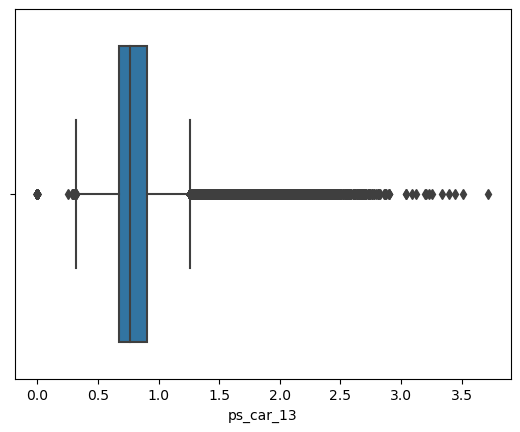

In [198]:
sns.boxplot(x='ps_car_13',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_13', ylabel='Count'>

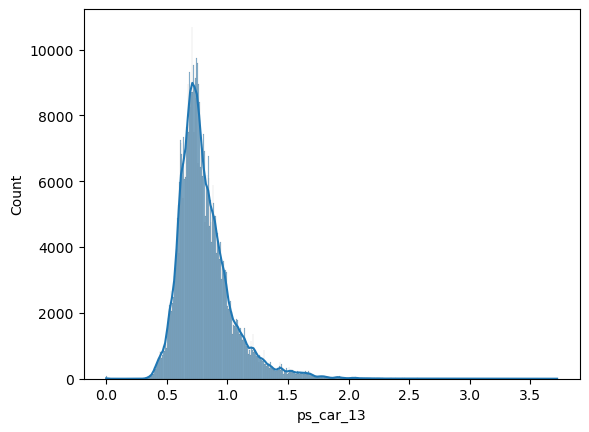

In [199]:
# checking distribution using histplot
sns.histplot(x='ps_car_13',data=data,kde=True)

In [200]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_13,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_13.quantile(0.25)
Q3=data.ps_car_13.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.2353647553
Lower_limit :  0.55310721505
Upper_limit :  1.25920148095


In [201]:
data.loc[data['ps_car_13']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
19           64       1          0              1          2              1   
73          194       0          5              1          9              0   
85          215       0          5              3          5              1   
87          217       1          1              1          5              1   
...         ...     ...        ...            ...        ...            ...   
595097  1487705       0          1              2          7              1   
595111  1487745       0          3              1          6              0   
595134  1487803       0          4              2          8              1   
595153  1487846       0          0              1          3              1   
595190  1487964       0          1              2          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
3                   0              1              0              0  ...   
19                  0              1              0              0  ...   
73                  0              1              0              0  ...   
85                  3              0              1              0  ...   
87                  0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
595097              0              1              0              0  ...   
595111              6              1              0              0  ...   
595134              0              0              0              0  ...   
595153              0              1              0              0  ...   
595190              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
3                2           2           4           9               0   
19              10           3           1          11               0   
73               5           1           2           2               0   
85               6           1           2           7               0   
87               9           1           1           6               0   
...            ...         ...         ...         ...             ...   
595097           3           1           2           5               0   
595111           4           1           1           5               0   
595134          10           1           3           9               0   
595153           5           1           5          13               0   
595190           1           0           4           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
3                    0               0               0               0   
19                   1               1               0               1   
73                   1               1               0               0   
85                   0               0               1               1   
87                   1               0               0               0   
...                ...             ...             ...             ...   
595097               1               0               0               1   
595111               1               1               0               0   
595134               1               1               0               0   
595153               1               1               0               0   
595190               0               1               0               0   

        ps_calc_20_bin  
3                    0  
19                   0  
73                   0  
85                   0  
87                   0  
...                ...  
595097               0  
595111               0  
595134               0  
595153               1  
595190               0  

[34303 rows x 59 columns]

In [202]:
data.loc[data['ps_car_13']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9            28       1          1              1          2              0   
15           48       0          5              1          3              1   
26           79       0          0              1          4              1   
50          125       0          3              1          2              1   
80          209       0          0              2          2              0   
...         ...     ...        ...            ...        ...            ...   
595137  1487810       0          0              1          4              0   
595154  1487851       0          0              1          3              1   
595164  1487890       0          3              2          5              0   
595166  1487897       0          5              1          6              1   
595176  1487931       0          2              1          4              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
9                   0              0              1              0  ...   
15                  0              0              1              0  ...   
26                  0              0              0              1  ...   
50                  0              0              1              0  ...   
80                  0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
595137              0              0              0              0  ...   
595154              0              0              0              1  ...   
595164              0              0              1              0  ...   
595166              0              0              1              0  ...   
595176              0              0              0              1  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
9                3           5           0           6               0   
15               5           2           6           7               0   
26               4           2           4           3               0   
50               7           2           5           6               0   
80               4           1           4           9               0   
...            ...         ...         ...         ...             ...   
595137           7           2           2           3               1   
595154           4           2           5          10               1   
595164           8           1           3           7               0   
595166           3           0           4           5               0   
595176           7           2           4           5               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
9                    1               0               0               1   
15                   1               1               0               1   
26                   1               1               1               0   
50                   0               1               0               1   
80                   1               1               1               1   
...                ...             ...             ...             ...   
595137               0               0               0               1   
595154               0               1               1               1   
595164               0               1               1               0   
595166               1               0               0               1   
595176               1               1               0               0   

        ps_calc_20_bin  
9                    0  
15                   0  
26                   1  
50                   0  
80                   0  
...                ...  
595137               0  
595154               0  
595164               1  
595166               0  
595176               1  

[26882 rows x 59 columns]

In [203]:
# more than 5% outliers present

a=len(data.loc[data['ps_car_13']<Lower_limit])
b=len(data.loc[data['ps_car_13']>Upper_limit])
c=(a+b)/len(data)
c

0.10279530654623899

- 10.3% outliers present in "ps_car_13".

## ps_car_14


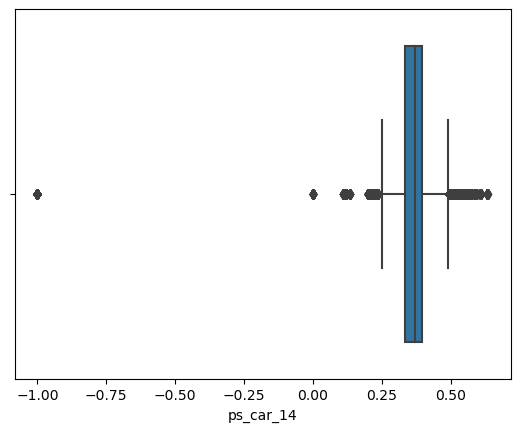

In [204]:
sns.boxplot(x='ps_car_14',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_14', ylabel='Count'>

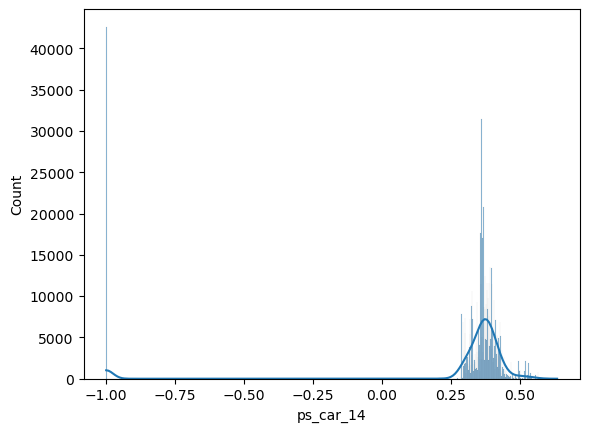

In [205]:
# checking distribution using histplot
sns.histplot(x='ps_car_14',data=data,kde=True)

In [206]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_14,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_14.quantile(0.25)
Q3=data.ps_car_14.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.063317927
Lower_limit :  0.30150766149999997
Upper_limit :  0.4914614425


In [207]:
data.loc[data['ps_car_14']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
45          117       0          1              1          6              1   
46          119       0          5              1          9              0   
64          160       0          0              1          7              0   
73          194       0          5              1          9              0   
...         ...     ...        ...            ...        ...            ...   
595186  1487957       0          0              1          3              1   
595192  1487973       0          0              1          1              0   
595197  1487988       0          1              1          7              1   
595199  1487992       0          3              1          3              1   
595208  1488016       0          5              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
3                   0              1              0              0  ...   
45                  3              0              0              1  ...   
46                  0              0              0              1  ...   
64                  0              1              0              0  ...   
73                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595186              0              0              1              0  ...   
595192              0              0              1              0  ...   
595197              0              0              1              0  ...   
595199              0              0              0              1  ...   
595208              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
3                2           2           4           9               0   
45               4           1           4           6               1   
46               9           0           3          10               0   
64               5           5           1           5               0   
73               5           1           2           2               0   
...            ...         ...         ...         ...             ...   
595186          10           0           2           9               0   
595192           5           1           5           5               0   
595197           4           1           3           6               0   
595199           1           1           1          10               0   
595208           4           1           3           8               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
3                    0               0               0               0   
45                   1               0               0               0   
46                   0               1               0               0   
64                   1               0               0               0   
73                   1               1               0               0   
...                ...             ...             ...             ...   
595186               0               1               1               0   
595192               1               1               0               1   
595197               0               1               1               1   
595199               0               1               0               1   
595208               0               1               0               1   

        ps_calc_20_bin  
3                    0  
45                   0  
46                   0  
64                   0  
73                   0  
...                ...  
595186               0  
595192               1  
595197               0  
595199               0  
595208               1  

[69163 rows x 59 columns]

In [208]:
data.loc[data['ps_car_14']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
15           48       0          5              1          3              1   
25           78       0          0              1          7              0   
78          206       0          2              2          1              0   
95          235       0          3              1          6              0   
113         306       0          2              1          6              0   
...         ...     ...        ...            ...        ...            ...   
594740  1486830       0          1              1          2              0   
594792  1486972       0          0              1          6              0   
594869  1487128       1          7              1          5              1   
594926  1487266       0          3              1          4              0   
595007  1487476       0          2              1          7              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
15                  0              0              1              0  ...   
25                  0              1              0              0  ...   
78                  0              1              0              0  ...   
95                  0              0              1              0  ...   
113                 0              0              0              1  ...   
...               ...            ...            ...            ...  ...   
594740              0              0              1              0  ...   
594792              0              1              0              0  ...   
594869              6              0              1              0  ...   
594926              0              0              0              1  ...   
595007              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
15               5           2           6           7               0   
25               6           4           4           4               0   
78               8           1           1           5               0   
95               5           1           3           6               0   
113              2           2           2          12               1   
...            ...         ...         ...         ...             ...   
594740           7           0           5           3               0   
594792           7           4           0           8               0   
594869           5           0           2          10               0   
594926           3           1           6           9               0   
595007           4           2           2          12               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
15                   1               1               0               1   
25                   0               1               1               0   
78                   0               1               0               0   
95                   1               0               0               0   
113                  0               1               0               0   
...                ...             ...             ...             ...   
594740               1               0               1               0   
594792               0               1               0               0   
594869               0               1               0               0   
594926               1               1               1               1   
595007               0               1               0               1   

        ps_calc_20_bin  
15                   0  
25                   1  
78                   0  
95                   0  
113                  0  
...                ...  
594740               0  
594792               0  
594869               1  
594926               0  
595007               0  

[15619 rows x 59 columns]

In [209]:
# more than 5% outlier present

a=len(data.loc[data['ps_car_14']<Lower_limit])
b=len(data.loc[data['ps_car_14']>Upper_limit])
c=(a+b)/len(data)
c

0.14244000456980033

- 14.2% outliers present in "ps_car_14".

## ps_car_15


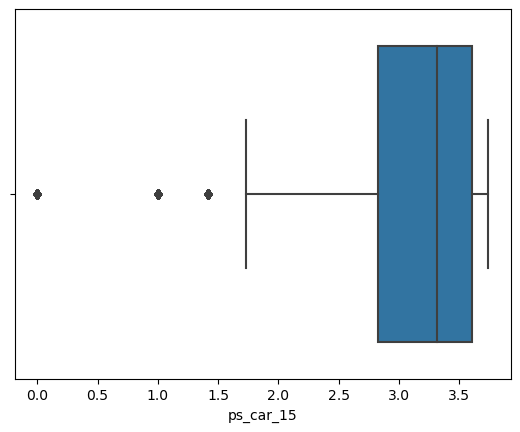

In [210]:
sns.boxplot(x='ps_car_15',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_car_15', ylabel='Count'>

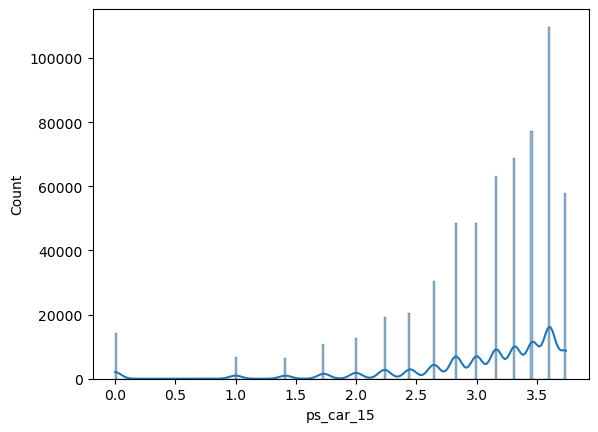

In [211]:
# checking distribution using histplot
sns.histplot(x='ps_car_15',data=data,kde=True)

In [212]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_car_15,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_15.quantile(0.25)
Q3=data.ps_car_15.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.7771241507999997
Lower_limit :  2.4398650493000003
Upper_limit :  4.7712375017


In [213]:
data.loc[data['ps_car_15']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
19           64       1          0              1          2              1   
20           65       0          0              1          2              0   
25           78       0          0              1          7              0   
...         ...     ...        ...            ...        ...            ...   
595156  1487863       0          1              1          7              1   
595159  1487868       0          0              1          3              0   
595165  1487892       0          2              1          1              0   
595190  1487964       0          1              2          3              0   
595209  1488017       0          1              1         10              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
3                   0              1              0              0  ...   
4                   0              1              0              0  ...   
19                  0              1              0              0  ...   
20                  0              1              0              0  ...   
25                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595156              0              1              0              0  ...   
595159              0              1              0              0  ...   
595165              0              1              0              0  ...   
595190              0              1              0              0  ...   
595209              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
3                2           2           4           9               0   
4                3           1           1           3               0   
19              10           3           1          11               0   
20               7           2           2           4               0   
25               6           4           4           4               0   
...            ...         ...         ...         ...             ...   
595156           5           1           4           8               0   
595159           9           0           2          10               1   
595165           7           5           2           5               0   
595190           1           0           4           6               0   
595209           3           2           2           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
3                    0               0               0               0   
4                    0               0               1               1   
19                   1               1               0               1   
20                   1               0               0               1   
25                   0               1               1               0   
...                ...             ...             ...             ...   
595156               1               1               0               0   
595159               0               1               1               1   
595165               0               1               1               1   
595190               0               1               0               0   
595209               0               1               0               0   

        ps_calc_20_bin  
3                    0  
4                    0  
19                   0  
20                   0  
25                   1  
...                ...  
595156               0  
595159               0  
595165               1  
595190               0  
595209               0  

[70460 rows x 59 columns]

In [214]:
data.loc[data['ps_car_15']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [215]:
# more than 5% outliers present

a=len(data.loc[data['ps_car_15']<Lower_limit])
b=len(data.loc[data['ps_car_15']>Upper_limit])
c=(a+b)/len(data)
c

0.11837798969106805

- 11.8 % outliers present in "ps_car_15".

## ps_calc_01


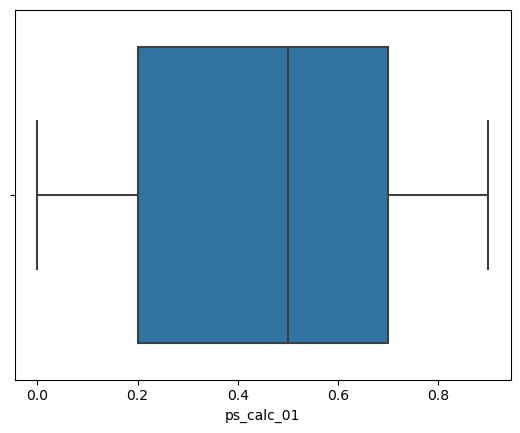

In [216]:
sns.boxplot(x='ps_calc_01',data=data)
plt.show()

###### No outlier present as per data visualization using boxplot.

In [217]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_01,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_01.quantile(0.25)
Q3=data.ps_calc_01.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.49999999999999994
Lower_limit :  -0.04999999999999993
Upper_limit :  1.4499999999999997


In [218]:
data.loc[data['ps_calc_01']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [219]:
data.loc[data['ps_calc_01']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers in "ps_calc_01".

## ps_calc_02


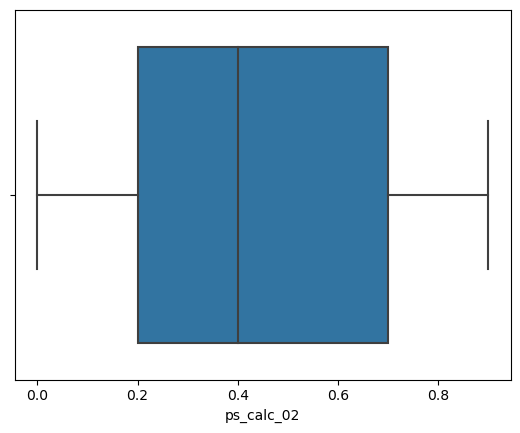

In [220]:
sns.boxplot(x='ps_calc_02',data=data)
plt.show()

###### No outlier present as per data visualization using boxplot.

In [221]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_02,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_02.quantile(0.25)
Q3=data.ps_calc_02.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.49999999999999994
Lower_limit :  -0.04999999999999993
Upper_limit :  1.4499999999999997


In [222]:
data.loc[data['ps_calc_02']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [223]:
data.loc[data['ps_calc_02']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers in "ps_calc_02".

## ps_calc_03


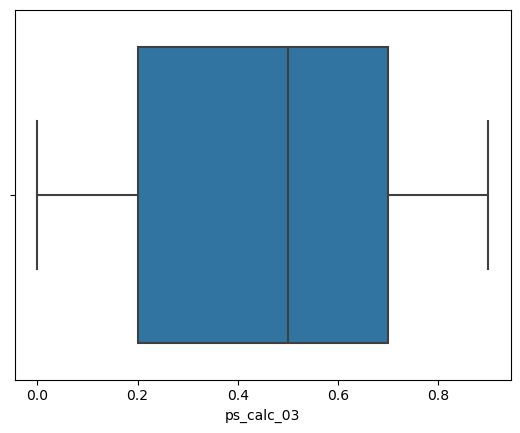

In [224]:
sns.boxplot(x='ps_calc_03',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [225]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_03,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_03.quantile(0.25)
Q3=data.ps_calc_03.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.49999999999999994
Lower_limit :  -0.04999999999999993
Upper_limit :  1.4499999999999997


In [226]:
data.loc[data['ps_calc_03']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [227]:
data.loc[data['ps_calc_03']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers in "ps_calc_03".

## ps_calc_04


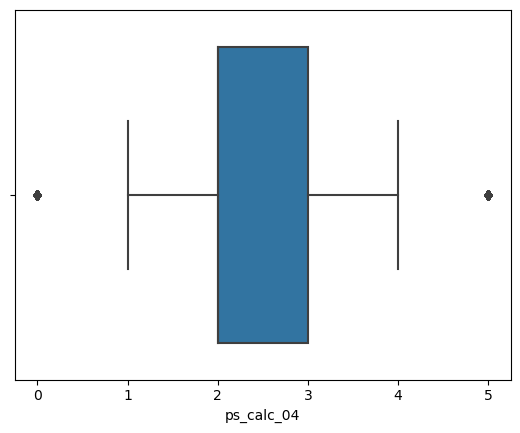

In [228]:
sns.boxplot(x='ps_calc_04',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_calc_04', ylabel='Count'>

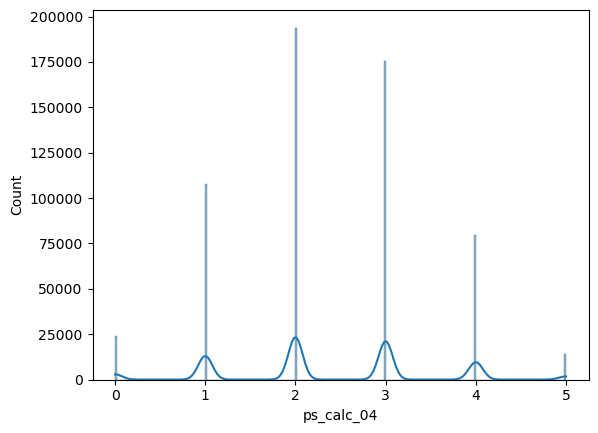

In [229]:
# checking distribution using histplot
sns.histplot(x='ps_calc_04',data=data,kde=True)

In [230]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_04,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_04.quantile(0.25)
Q3=data.ps_calc_04.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Lower_limit :  1.5
Upper_limit :  4.5


In [231]:
data.loc[data['ps_calc_04']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
7            22       0          5              1          4              0   
17           58       0          5              1          6              0   
20           65       0          0              1          2              0   
34           96       0          0              1          1              1   
38          104       0          4              1          9              0   
...         ...     ...        ...            ...        ...            ...   
595194  1487976       0          0              1          7              1   
595195  1487980       0          0              3          3              1   
595197  1487988       0          1              1          7              1   
595199  1487992       0          3              1          3              1   
595200  1487994       0          1              1          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
7                   0              1              0              0  ...   
17                  1              1              0              0  ...   
20                  0              1              0              0  ...   
34                  0              0              1              0  ...   
38                  0              0              0              0  ...   
...               ...            ...            ...            ...  ...   
595194              0              0              1              0  ...   
595195              0              0              1              0  ...   
595197              0              0              1              0  ...   
595199              0              0              0              1  ...   
595200              3              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
7                7           1           3           6               1   
17               9           1           3           9               0   
20               7           2           2           4               0   
34               3           2           6           8               0   
38               5           0           4           6               0   
...            ...         ...         ...         ...             ...   
595194           6           1           4          12               0   
595195           8           0           2           5               0   
595197           4           1           3           6               0   
595199           1           1           1          10               0   
595200           2           3           3          12               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
7                    0               1               0               1   
17                   1               1               0               0   
20                   1               0               0               1   
34                   1               0               0               0   
38                   1               0               0               1   
...                ...             ...             ...             ...   
595194               1               1               0               0   
595195               1               0               0               1   
595197               0               1               1               1   
595199               0               1               0               1   
595200               0               1               0               0   

        ps_calc_20_bin  
7                    0  
17                   0  
20                   0  
34                   0  
38                   0  
...                ...  
595194               0  
595195               1  
595197               0  
595199               0  
595200               0  

[131984 rows x 59 columns]

In [232]:
data.loc[data['ps_calc_04']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
44          116       0          5              2          2              1   
102         265       0          1              2          5              1   
214         540       0          1              1          3              1   
241         608       0          0              1          2              0   
245         619       0          0              1          5              0   
...         ...     ...        ...            ...        ...            ...   
595048  1487568       0          0              1          3              1   
595101  1487722       0          5              1          5              0   
595122  1487768       0          0              2          1              1   
595129  1487788       0          0              1          1              0   
595157  1487865       0          0              2          0              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
44                  0              0              1              0  ...   
102                 0              0              1              0  ...   
214                 0              0              1              0  ...   
241                 0              0              1              0  ...   
245                 0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595048              0              0              1              0  ...   
595101              0              0              0              1  ...   
595122              0              0              0              1  ...   
595129              0              0              0              1  ...   
595157              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
44               8           1           7           8               0   
102              7           2           2           8               0   
214              3           3           1           8               1   
241              6           2           4           6               0   
245              4           2           3           4               0   
...            ...         ...         ...         ...             ...   
595048           1           1           5           3               0   
595101           9           0           5           7               1   
595122           6           3           2           7               0   
595129           5           1           5           9               0   
595157          10           2           3           4               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
44                   1               1               0               1   
102                  1               0               0               0   
214                  1               0               0               0   
241                  0               1               0               0   
245                  1               1               0               0   
...                ...             ...             ...             ...   
595048               0               1               0               1   
595101               1               1               0               0   
595122               1               0               0               0   
595129               1               0               0               0   
595157               1               0               0               0   

        ps_calc_20_bin  
44                   0  
102                  0  
214                  0  
241                  0  
245                  0  
...                ...  
595048               1  
595101               0  
595122               0  
595129               0  
595157               0  

[14191 rows x 59 columns]

In [233]:
# more than 5% outlier present

a=len(data.loc[data['ps_calc_04']<Lower_limit])
b=len(data.loc[data['ps_calc_04']>Upper_limit])
c=(a+b)/len(data)
c

0.24558476643616056

- 24.5% outliers present in "ps_calc_04".

## ps_calc_05

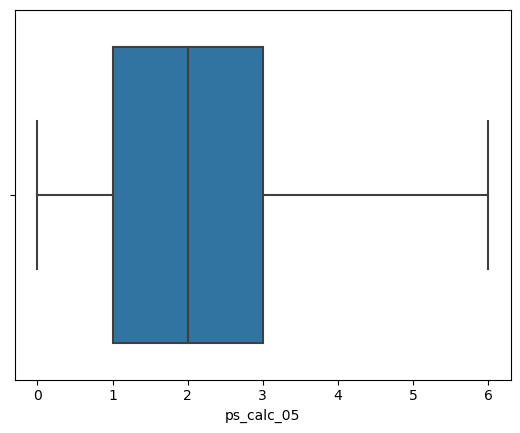

In [234]:
sns.boxplot(x='ps_calc_05',data=data)
plt.show()

###### no Outlier present as per data visualization using boxplot.

In [235]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_05,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_05.quantile(0.25)
Q3=data.ps_calc_05.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Lower_limit :  0.0
Upper_limit :  6.0


In [236]:
data.loc[data['ps_calc_05']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [237]:
data.loc[data['ps_calc_05']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

- There are no outliers in "ps_calc_05".

## ps_calc_06


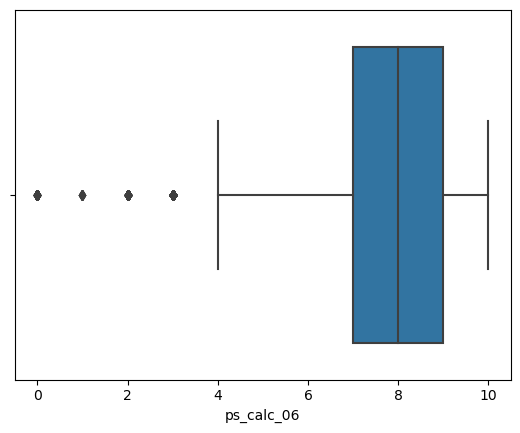

In [238]:
sns.boxplot(x='ps_calc_06',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_calc_06', ylabel='Count'>

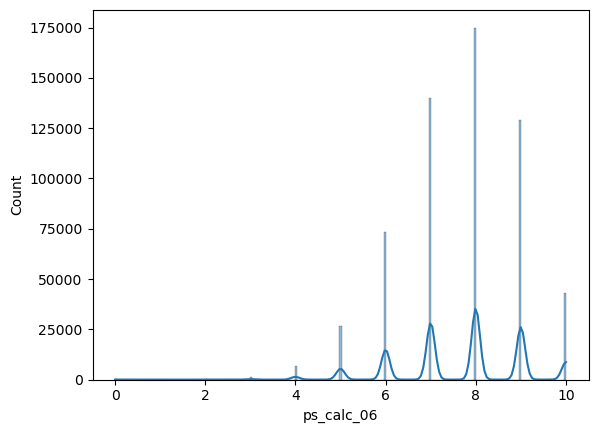

In [239]:
# checking distribution using histplot
sns.histplot(x='ps_calc_06',data=data,kde=True)

In [240]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_06,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_06.quantile(0.25)
Q3=data.ps_calc_06.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Lower_limit :  6.0
Upper_limit :  12.0


In [241]:
data.loc[data['ps_calc_06']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
54          142       0          0              1          5              1   
63          156       0          0              1          5              0   
173         449       0          2              1          6              0   
198         498       0          3              1          3              1   
231         582       0          3              3          7              1   
...         ...     ...        ...            ...        ...            ...   
595093  1487694       0          1              1          9              0   
595096  1487702       0          1              2          2              1   
595126  1487780       0          2              1          8              1   
595155  1487859       0          4              1          3              0   
595194  1487976       0          0              1          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
54                  0              1              0              0  ...   
63                  0              1              0              0  ...   
173                 0              0              1              0  ...   
198                 0              0              1              0  ...   
231                 0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
595093              0              1              0              0  ...   
595096              0              0              0              0  ...   
595126              0              0              1              0  ...   
595155              0              1              0              0  ...   
595194              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
54               9           1           2          12               0   
63               6           2           1           7               0   
173              5           0           5           7               0   
198              9           1           1           4               1   
231              7           2           7           7               0   
...            ...         ...         ...         ...             ...   
595093           7           3           4           4               0   
595096           5           0           5           8               0   
595126           4           3           2           6               1   
595155           3           2           3           7               0   
595194           6           1           4          12               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
54                   0               1               0               0   
63                   0               1               0               0   
173                  0               1               1               0   
198                  1               1               0               0   
231                  0               0               0               0   
...                ...             ...             ...             ...   
595093               1               1               0               1   
595096               0               0               0               0   
595126               0               0               0               1   
595155               0               0               0               0   
595194               1               1               0               0   

        ps_calc_20_bin  
54                   0  
63                   0  
173                  0  
198                  0  
231                  0  
...                ...  
595093               0  
595096               1  
595126               0  
595155               1  
595194               0  

[34733 rows x 59 columns]

In [242]:
data.loc[data['ps_calc_06']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [243]:
# more than 5% outliers present

a=len(data.loc[data['ps_calc_06']<Lower_limit])
b=len(data.loc[data['ps_calc_06']>Upper_limit])
c=(a+b)/len(data)
c

0.05835399823928281

- 5.8% outliers present in "ps_calc_06".

## ps_calc_07


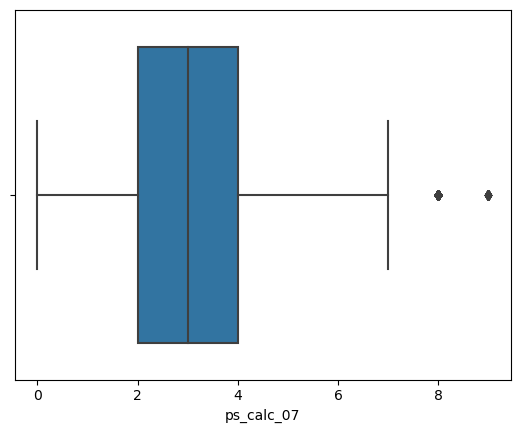

In [244]:
sns.boxplot(x='ps_calc_07',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_calc_07', ylabel='Count'>

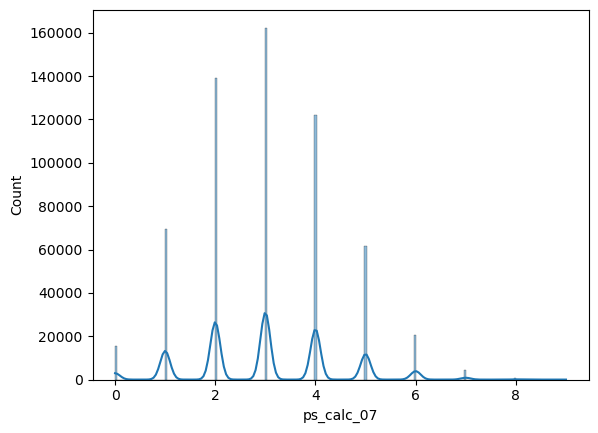

In [245]:
# checking distribution using histplot
sns.histplot(x='ps_calc_07',data=data,kde=True)

In [246]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_07,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_07.quantile(0.25)
Q3=data.ps_calc_07.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Lower_limit :  1.0
Upper_limit :  7.0


In [247]:
data.loc[data['ps_calc_07']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
22           72       0          5              3          6              1   
30           89       0          0              1          6              0   
36           99       0          1              1          6              1   
86          216       0          0              1         11              0   
95          235       0          3              1          6              0   
...         ...     ...        ...            ...        ...            ...   
595055  1487584       0          1              2          0              0   
595059  1487594       0          2              1          7              1   
595085  1487673       0          0              1          5              0   
595147  1487828       0          1              2          7              1   
595207  1488013       0          3              1         10              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
22                  3              0              1              0  ...   
30                  0              1              0              0  ...   
36                  4              0              1              0  ...   
86                  0              0              0              0  ...   
95                  0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
595055              6              0              0              0  ...   
595059              4              0              1              0  ...   
595085              0              0              1              0  ...   
595147              0              0              1              0  ...   
595207              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
22               8           1           3           5               0   
30               5           3           1          11               0   
36               1           2           2           6               0   
86               3           2           5          10               0   
95               5           1           3           6               0   
...            ...         ...         ...         ...             ...   
595055           3           3           5           9               0   
595059           3           3           2           5               0   
595085           4           3           5           8               0   
595147           6           1           2          12               0   
595207           4           1           9           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
22                   0               0               0               0   
30                   1               0               0               1   
36                   1               1               1               1   
86                   0               0               0               1   
95                   1               0               0               0   
...                ...             ...             ...             ...   
595055               0               0               0               1   
595059               1               1               1               1   
595085               0               0               0               1   
595147               1               1               0               0   
595207               1               1               0               1   

        ps_calc_20_bin  
22                   1  
30                   0  
36                   0  
86                   0  
95                   0  
...                ...  
595055               0  
595059               1  
595085               0  
595147               0  
595207               1  

[15369 rows x 59 columns]

In [248]:
data.loc[data['ps_calc_07']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
1651       4239       0          0              1          1              1   
2072       5332       0          7              1          4              1   
3813       9823       0          4              2          4              0   
4775      12224       0          1              2          1              1   
5411      13804       0          0              1         10              0   
...         ...     ...        ...            ...        ...            ...   
590147  1475177       1          1              2          1              1   
590908  1476997       0          1              2          1              1   
592062  1479937       0          0              1          5              0   
592083  1480002       1          1              1          4              1   
594083  1485123       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
1651                0              1              0              0  ...   
2072                0              0              0              1  ...   
3813                0              0              0              1  ...   
4775                0              0              0              0  ...   
5411                0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
590147             -1              0              0              1  ...   
590908              0              0              1              0  ...   
592062              0              0              1              0  ...   
592083              3              0              1              0  ...   
594083              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
1651             5           2           4           5               0   
2072             6           0           2           6               0   
3813             6           2           5           6               0   
4775             9           2           5           7               0   
5411             7           0           4           4               0   
...            ...         ...         ...         ...             ...   
590147           3           1           1           6               0   
590908           5           2           2          12               0   
592062           6           2           2           9               0   
592083           5           2           3          11               0   
594083           4           1           4          11               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
1651                 1               0               0               0   
2072                 0               1               0               0   
3813                 1               0               1               1   
4775                 1               0               0               1   
5411                 0               1               0               1   
...                ...             ...             ...             ...   
590147               0               0               0               0   
590908               0               0               1               0   
592062               0               1               1               0   
592083               0               1               1               1   
594083               0               1               0               1   

        ps_calc_20_bin  
1651                 0  
2072                 0  
3813                 0  
4775                 0  
5411                 0  
...                ...  
590147               0  
590908               0  
592062               0  
592083               0  
594083               0  

[570 rows x 59 columns]

In [249]:
data.loc[data['ps_calc_07']<Lower_limit,'ps_calc_07']=data.ps_calc_07.median()

In [250]:
data.loc[data['ps_calc_07']>Upper_limit,'ps_calc_07']=data.ps_calc_07.median()

In [251]:
data.loc[data['ps_calc_07']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [252]:
data.loc[data['ps_calc_07']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_calc_08


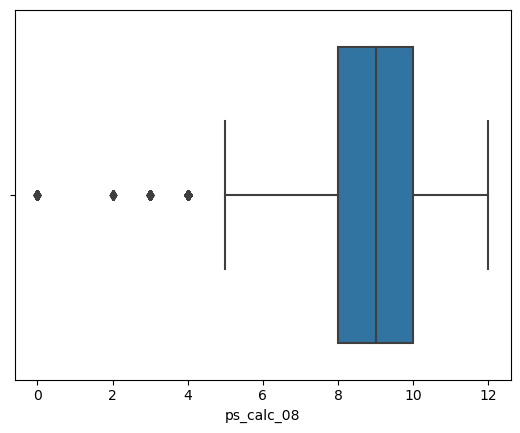

In [253]:
sns.boxplot(x='ps_calc_08',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_calc_08', ylabel='Count'>

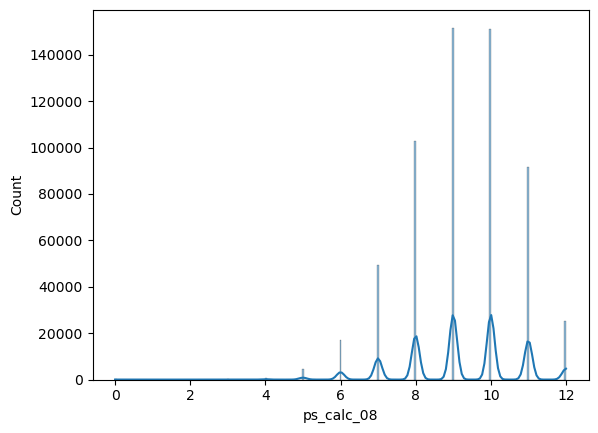

In [254]:
# checking distribution using histplot
sns.histplot(x='ps_calc_08',data=data,kde=True)

In [255]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_08,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_08.quantile(0.25)
Q3=data.ps_calc_08.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Lower_limit :  7.0
Upper_limit :  13.0


In [256]:
data.loc[data['ps_calc_08']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
7            22       0          5              1          4              0   
14           46       0          5              1         11              0   
19           64       1          0              1          2              1   
34           96       0          0              1          1              1   
51          127       0          6              1          6              0   
...         ...     ...        ...            ...        ...            ...   
595017  1487500       0          1              1          2              0   
595038  1487547       0          2              1          2              1   
595051  1487573       0          2              1          7              0   
595080  1487646       0          6              2          1              1   
595097  1487705       0          1              2          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
7                   0              1              0              0  ...   
14                  0              0              0              0  ...   
19                  0              1              0              0  ...   
34                  0              0              1              0  ...   
51                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595017              0              0              0              0  ...   
595038              0              0              0              1  ...   
595051              0              1              0              0  ...   
595080              0              0              0              1  ...   
595097              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
7                7           1           3           6               1   
14               4           1           3           9               0   
19              10           3           1          11               0   
34               3           2           6           8               0   
51               7           3           3           5               0   
...            ...         ...         ...         ...             ...   
595017           5           3           4           9               0   
595038          11           3           3           8               0   
595051           6           1           0           6               0   
595080           7           2           2           7               0   
595097           3           1           2           5               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
7                    0               1               0               1   
14                   0               0               0               1   
19                   1               1               0               1   
34                   1               0               0               0   
51                   1               1               1               0   
...                ...             ...             ...             ...   
595017               1               1               1               1   
595038               0               1               0               0   
595051               0               1               0               0   
595080               0               0               0               0   
595097               1               0               0               1   

        ps_calc_20_bin  
7                    0  
14                   0  
19                   0  
34                   0  
51                   1  
...                ...  
595017               0  
595038               0  
595051               0  
595080               0  
595097               0  

[22674 rows x 59 columns]

In [257]:
data.loc[data['ps_calc_08']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [258]:
data.loc[data['ps_calc_08']<Lower_limit,'ps_calc_08']=data.ps_calc_08.median()

In [259]:
data.loc[data['ps_calc_08']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_calc_09


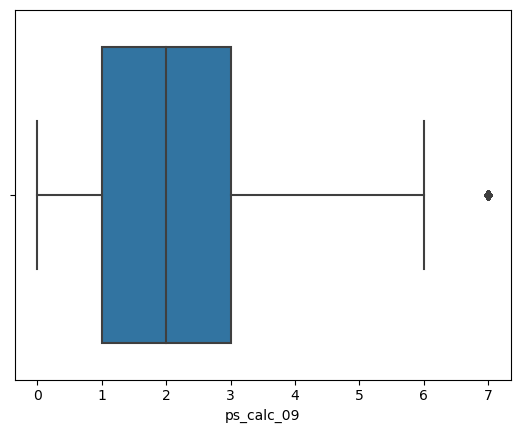

In [260]:
sns.boxplot(x='ps_calc_09',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_calc_09', ylabel='Count'>

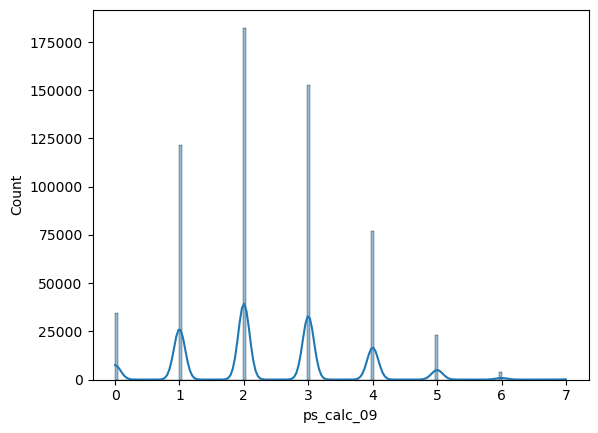

In [261]:
# checking distribution using histplot
sns.histplot(x='ps_calc_09',data=data,kde=True)

In [262]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_09,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_09.quantile(0.25)
Q3=data.ps_calc_09.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Lower_limit :  0.0
Upper_limit :  6.0


In [263]:
data.loc[data['ps_calc_09']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [264]:
data.loc[data['ps_calc_09']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3305       8434       0          0              3          8              0   
3834       9877       0          3              1          5              0   
8504      21568       0          5              1          2              1   
9148      23122       0          5              2          2              0   
10895     27520       0          3              2          2              1   
...         ...     ...        ...            ...        ...            ...   
583327  1458110       0          0              1          2              0   
585580  1463746       0          0              2          3              0   
591109  1477488       0          1              1          2              1   
592334  1480623       0          1              1          2              1   
592836  1481924       0          1              1          6              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
3305                0              1              0              0  ...   
3834                0              1              0              0  ...   
8504                0              0              0              1  ...   
9148                0              0              0              1  ...   
10895               0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
583327              0              0              1              0  ...   
585580              0              1              0              0  ...   
591109              0              1              0              0  ...   
592334              0              0              1              0  ...   
592836              1              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
3305             5           1           1           8               0   
3834             5           5           5           7               0   
8504             7           1           3           6               0   
9148             7           1           1          10               0   
10895            6           2           2           8               0   
...            ...         ...         ...         ...             ...   
583327           8           2           4           5               0   
585580           3           2           3           9               0   
591109           8           1           4           9               0   
592334           4           4           3           7               0   
592836           8           1           3           8               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
3305                 1               0               1               1   
3834                 1               0               0               1   
8504                 1               0               0               1   
9148                 0               1               1               0   
10895                0               0               0               1   
...                ...             ...             ...             ...   
583327               1               1               0               1   
585580               1               1               0               1   
591109               1               0               1               1   
592334               1               0               0               0   
592836               1               0               0               0   

        ps_calc_20_bin  
3305                 0  
3834                 1  
8504                 0  
9148                 0  
10895                0  
...                ...  
583327               1  
585580               0  
591109               0  
592334               0  
592836               0  

[263 rows x 59 columns]

In [265]:
data.loc[data['ps_calc_09']>Upper_limit,'ps_calc_09']=data.ps_calc_09.median()

In [266]:
data.loc[data['ps_calc_09']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_calc_10


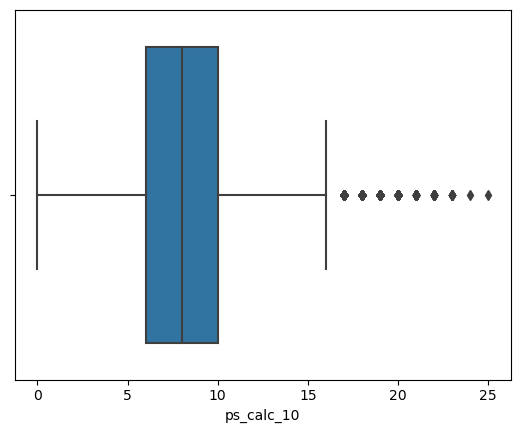

In [267]:
sns.boxplot(x='ps_calc_10',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_calc_10', ylabel='Count'>

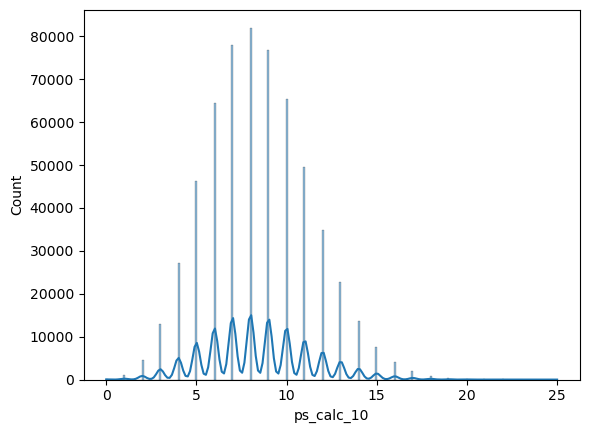

In [268]:
# checking distribution using histplot
sns.histplot(x='ps_calc_10',data=data,kde=True)

In [269]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_10,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_10.quantile(0.25)
Q3=data.ps_calc_10.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  4.0
Lower_limit :  4.0
Upper_limit :  16.0


In [270]:
data.loc[data['ps_calc_10']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
166         435       0          0              1          3              0   
187         475       0          0              1          5              1   
199         502       0          1              1          5              1   
204         524       0          1              2          2              1   
...         ...     ...        ...            ...        ...            ...   
595141  1487816       0          0              1          1              0   
595160  1487875       0          3              1          7              0   
595164  1487890       0          3              2          5              0   
595191  1487968       0          5              1          3              0   
595204  1488008       0          1              2          2              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
3                   0              1              0              0  ...   
166                 0              1              0              0  ...   
187                 0              0              1              0  ...   
199                 0              1              0              0  ...   
204                 0              0              0              0  ...   
...               ...            ...            ...            ...  ...   
595141              0              1              0              0  ...   
595160              0              1              0              0  ...   
595164              0              0              1              0  ...   
595191              0              0              0              1  ...   
595204              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
3                2           2           4           9               0   
166              3           3           2          11               0   
187              8           1           2          13               0   
199              9           4           4          13               1   
204              6           1           3          10               0   
...            ...         ...         ...         ...             ...   
595141           7           1           3           6               0   
595160           6           0           2           8               0   
595164           8           1           3           7               0   
595191           8           2           1          11               0   
595204           3           1           3           9               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
3                    0               0               0               0   
166                  1               0               0               1   
187                  1               1               0               1   
199                  1               1               1               1   
204                  1               1               0               1   
...                ...             ...             ...             ...   
595141               1               0               0               0   
595160               1               1               0               0   
595164               0               1               1               0   
595191               0               1               1               0   
595204               1               0               0               1   

        ps_calc_20_bin  
3                    0  
166                  0  
187                  0  
199                  0  
204                  1  
...                ...  
595141               0  
595160               0  
595164               1  
595191               1  
595204               0  

[18873 rows x 59 columns]

In [271]:
data.loc[data['ps_calc_10']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
20           65       0          0              1          2              0   
486        1328       0          2              2          4              1   
646        1695       0          1              1          2              1   
934        2424       0          3              1          5              0   
1159       3002       0          4              1          2              1   
...         ...     ...        ...            ...        ...            ...   
594239  1485520       0          3              1          8              1   
594428  1486009       0          7              2          1              0   
594609  1486487       0          3              1          2              0   
594852  1487087       0          1              1          3              0   
595196  1487983       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
20                  0              1              0              0  ...   
486                 0              0              1              0  ...   
646                 0              0              0              1  ...   
934                 0              0              0              0  ...   
1159                0              0              0              0  ...   
...               ...            ...            ...            ...  ...   
594239              0              1              0              0  ...   
594428              0              0              0              0  ...   
594609              0              0              1              0  ...   
594852              0              0              0              0  ...   
595196              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
20               7           2           2           4               0   
486              8           2           3          10               0   
646              6           0           0           6               0   
934              2           3           7           7               0   
1159             4           1           4           8               0   
...            ...         ...         ...         ...             ...   
594239           4           3           2           8               0   
594428           4           0           4          10               0   
594609           8           0           1          12               0   
594852           2           1           1           6               0   
595196           6           0           1          11               1   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
20                   1               0               0               1   
486                  1               1               1               0   
646                  1               1               0               1   
934                  0               0               1               0   
1159                 1               1               0               0   
...                ...             ...             ...             ...   
594239               1               1               1               1   
594428               0               1               0               0   
594609               1               1               1               1   
594852               0               0               0               1   
595196               1               0               0               1   

        ps_calc_20_bin  
20                   0  
486                  0  
646                  0  
934                  0  
1159                 0  
...                ...  
594239               0  
594428               0  
594609               0  
594852               0  
595196               1  

[3641 rows x 59 columns]

In [272]:
data.loc[data['ps_calc_10']<Lower_limit,'ps_calc_10']=data.ps_calc_10.median()

In [273]:
data.loc[data['ps_calc_10']>Upper_limit,'ps_calc_10']=data.ps_calc_10.median()

In [274]:
data.loc[data['ps_calc_10']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

In [275]:
data.loc[data['ps_calc_10']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 59 columns]

## ps_calc_11


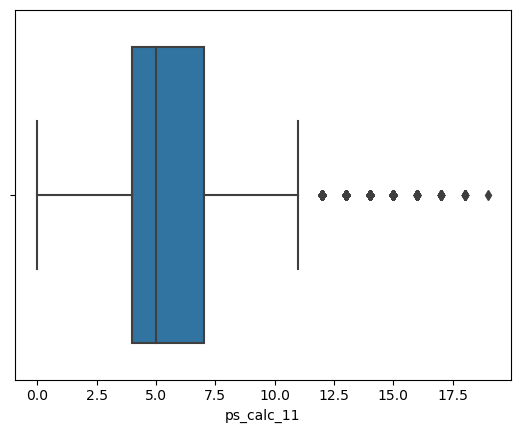

In [276]:
sns.boxplot(x='ps_calc_11',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_calc_11', ylabel='Count'>

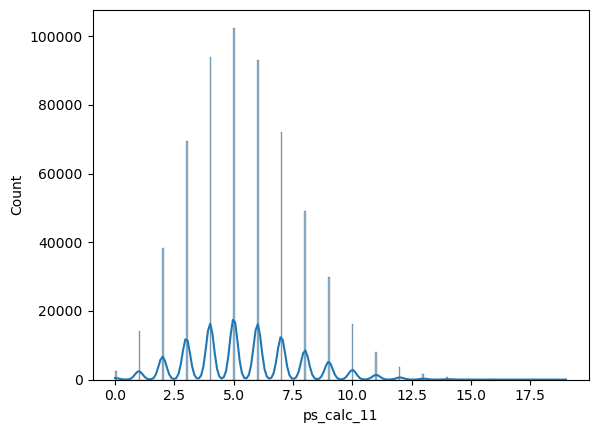

In [277]:
# checking distribution using histplot
sns.histplot(x='ps_calc_11',data=data,kde=True)

In [278]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_11,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_11.quantile(0.25)
Q3=data.ps_calc_11.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  3.0
Lower_limit :  2.5
Upper_limit :  11.5


In [279]:
data.loc[data['ps_calc_11']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
13           43       0          1              1          3              1   
29           85       0          3              2          2              0   
33           95       0          0              1          8              0   
36           99       0          1              1          6              1   
...         ...     ...        ...            ...        ...            ...   
595148  1487837       0          1              2          1              0   
595183  1487951       0          1              1          9              0   
595190  1487964       0          1              2          3              0   
595199  1487992       0          3              1          3              1   
595200  1487994       0          1              1          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
3                   0              1              0              0  ...   
13                  0              0              1              0  ...   
29                  0              1              0              0  ...   
33                  0              1              0              0  ...   
36                  4              0              1              0  ...   
...               ...            ...            ...            ...  ...   
595148              0              1              0              0  ...   
595183              0              1              0              0  ...   
595190              0              1              0              0  ...   
595199              0              0              0              1  ...   
595200              3              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
3                2           2           4           9               0   
13               2           0           4           3               0   
29               2           0           4           7               0   
33               2           1           3          11               1   
36               1           2           2           6               0   
...            ...         ...         ...         ...             ...   
595148           2           2           6           7               0   
595183           2           2           3           7               0   
595190           1           0           4           6               0   
595199           1           1           1          10               0   
595200           2           3           3          12               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
3                    0               0               0               0   
13                   0               1               0               1   
29                   1               0               0               0   
33                   0               1               0               0   
36                   1               1               1               1   
...                ...             ...             ...             ...   
595148               1               1               0               0   
595183               1               1               0               1   
595190               0               1               0               0   
595199               0               1               0               1   
595200               0               1               0               0   

        ps_calc_20_bin  
3                    0  
13                   0  
29                   0  
33                   1  
36                   0  
...                ...  
595148               0  
595183               0  
595190               0  
595199               0  
595200               0  

[54935 rows x 59 columns]

In [280]:
data.loc[data['ps_calc_11']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
55          143       0          0              1          3              0   
184         469       0          2              1          1              0   
228         570       0          0              1          8              0   
400        1072       0          3              2          1              0   
435        1169       0          5              1         11              0   
...         ...     ...        ...            ...        ...            ...   
594801  1486984       0          0              1          7              0   
594813  1487010       0          5              1          7              1   
594940  1487299       0          3              3          8              0   
595001  1487454       0          4              1          8              0   
595182  1487945       0          0              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
55                  0              0              1              0  ...   
184                 0              1              0              0  ...   
228                 0              1              0              0  ...   
400                 0              1              0              0  ...   
435                 0              0              0              0  ...   
...               ...            ...            ...            ...  ...   
594801              0              1              0              0  ...   
594813              4              1              0              0  ...   
594940              0              0              0              0  ...   
595001              0              1              0              0  ...   
595182              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
55              13           2           1          11               0   
184             13           4           3          13               0   
228             12           0           1          13               0   
400             13           0           1           4               0   
435             12           0           2           6               1   
...            ...         ...         ...         ...             ...   
594801          14           1           8          10               1   
594813          12           1           2          10               0   
594940          12           2           1          11               0   
595001          12           3           4           4               0   
595182          12           0           5           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
55                   1               1               0               0   
184                  1               1               0               1   
228                  0               1               0               0   
400                  0               1               0               0   
435                  1               1               1               0   
...                ...             ...             ...             ...   
594801               1               1               0               0   
594813               1               0               0               0   
594940               1               0               0               0   
595001               1               0               0               1   
595182               0               0               1               1   

        ps_calc_20_bin  
55                   0  
184                  0  
228                  0  
400                  0  
435                  1  
...                ...  
594801               0  
594813               0  
594940               0  
595001               0  
595182               0  

[6080 rows x 59 columns]

In [281]:
# more than 5% outliers present

a=len(data.loc[data['ps_calc_11']<Lower_limit])
b=len(data.loc[data['ps_calc_11']>Upper_limit])
c=(a+b)/len(data)
c

0.10250969402498605

- 10.3% outliers present in "ps_calc_11".

## ps_calc_12


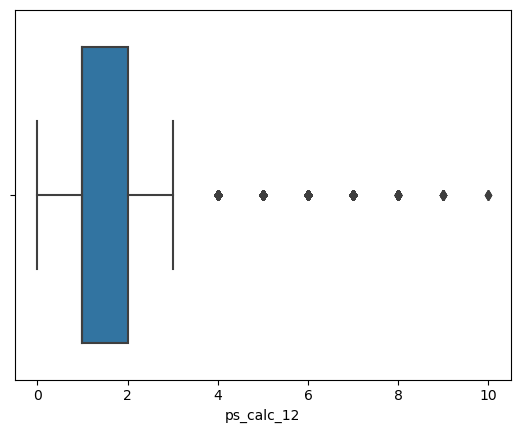

In [282]:
sns.boxplot(x='ps_calc_12',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

<AxesSubplot:xlabel='ps_calc_12', ylabel='Count'>

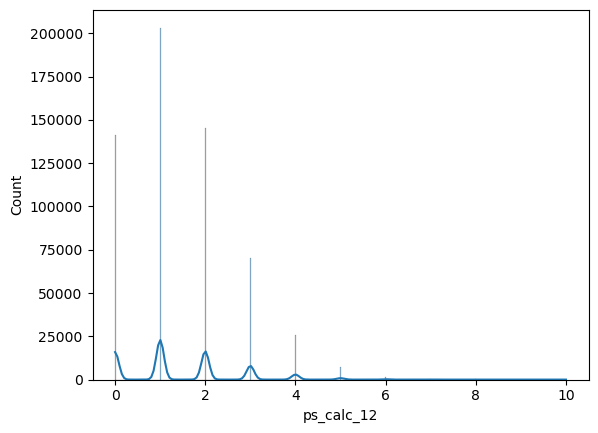

In [283]:
# checking distribution using histplot
sns.histplot(x='ps_calc_12',data=data,kde=True)

In [284]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_12,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_12.quantile(0.25)
Q3=data.ps_calc_12.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Lower_limit :  0.5
Upper_limit :  3.5


In [285]:
data.loc[data['ps_calc_12']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
6            20       0          2              1          3              1   
13           43       0          1              1          3              1   
29           85       0          3              2          2              0   
38          104       0          4              1          9              0   
39          107       1          2              1          3              1   
...         ...     ...        ...            ...        ...            ...   
595189  1487963       0          3              1          9              0   
595190  1487964       0          1              2          3              0   
595195  1487980       0          0              3          3              1   
595196  1487983       0          1              1          2              0   
595206  1488011       0          0              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
6                   0              0              1              0  ...   
13                  0              0              1              0  ...   
29                  0              1              0              0  ...   
38                  0              0              0              0  ...   
39                  0              0              0              1  ...   
...               ...            ...            ...            ...  ...   
595189              0              1              0              0  ...   
595190              0              1              0              0  ...   
595195              0              0              1              0  ...   
595196              0              1              0              0  ...   
595206              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
6                3           0           0          10               0   
13               2           0           4           3               0   
29               2           0           4           7               0   
38               5           0           4           6               0   
39               6           0           8          14               0   
...            ...         ...         ...         ...             ...   
595189           7           0           8           4               0   
595190           1           0           4           6               0   
595195           8           0           2           5               0   
595196           6           0           1          11               1   
595206           8           0           1           7               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
6                    1               0               0               1   
13                   0               1               0               1   
29                   1               0               0               0   
38                   1               0               0               1   
39                   1               0               1               0   
...                ...             ...             ...             ...   
595189               1               0               1               1   
595190               0               1               0               0   
595195               1               0               0               1   
595196               1               0               0               1   
595206               1               1               0               0   

        ps_calc_20_bin  
6                    0  
13                   0  
29                   0  
38                   0  
39                   0  
...                ...  
595189               0  
595190               0  
595195               1  
595196               1  
595206               0  

[141063 rows x 59 columns]

In [286]:
data.loc[data['ps_calc_12']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9            28       1          1              1          2              0   
21           66       0          0              1          5              1   
25           78       0          0              1          7              0   
47          120       0          0              1          9              0   
64          160       0          0              1          7              0   
...         ...     ...        ...            ...        ...            ...   
595124  1487775       0          0              3          6              1   
595165  1487892       0          2              1          1              0   
595167  1487899       0          0              2          3              1   
595202  1488001       0          4              1          3              0   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
9                   0              0              1              0  ...   
21                  4              1              0              0  ...   
25                  0              1              0              0  ...   
47                  0              0              1              0  ...   
64                  0              1              0              0  ...   
...               ...            ...            ...            ...  ...   
595124              6              1              0              0  ...   
595165              0              1              0              0  ...   
595167              0              0              0              0  ...   
595202              0              0              1              0  ...   
595211              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
9                3           5           0           6               0   
21               5           5           3           8               0   
25               6           4           4           4               0   
47               4           5           3          11               0   
64               5           5           1           5               0   
...            ...         ...         ...         ...             ...   
595124           3           5           2           3               0   
595165           7           5           2           5               0   
595167           6           4           3           9               0   
595202          11           6           2           6               0   
595211           4           4           3           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
9                    1               0               0               1   
21                   0               0               0               1   
25                   0               1               1               0   
47                   1               1               0               1   
64                   1               0               0               0   
...                ...             ...             ...             ...   
595124               1               1               0               0   
595165               0               1               1               1   
595167               0               1               0               0   
595202               1               1               0               1   
595211               1               0               0               0   

        ps_calc_20_bin  
9                    0  
21                   0  
25                   1  
47                   0  
64                   0  
...                ...  
595124               0  
595165               1  
595167               0  
595202               0  
595211               0  

[35258 rows x 59 columns]

In [287]:
# more than 5% outliers present

a=len(data.loc[data['ps_calc_12']<Lower_limit])
b=len(data.loc[data['ps_calc_12']>Upper_limit])
c=(a+b)/len(data)
c

0.29623226682257753

- 29.6% outliers present in "ps_calc_12".

## ps_calc_13


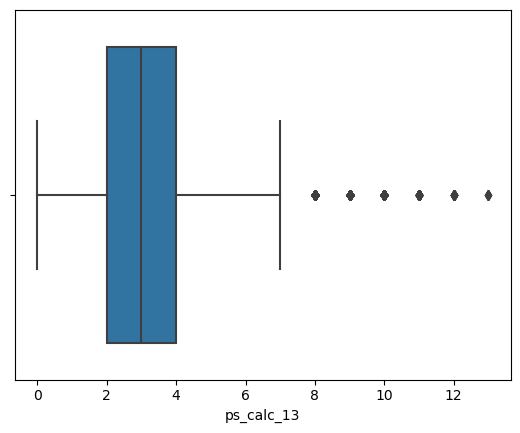

In [288]:
sns.boxplot(x='ps_calc_13',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [289]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_13,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_13.quantile(0.25)
Q3=data.ps_calc_13.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Lower_limit :  1.0
Upper_limit :  7.0


In [290]:
data.loc[data['ps_calc_13']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5            19       0          5              1          4              0   
6            20       0          2              1          3              1   
9            28       1          1              1          2              0   
28           84       1          0              2          0              1   
41          110       1          5              2          1              0   
...         ...     ...        ...            ...        ...            ...   
595067  1487609       0          0              1          5              0   
595088  1487682       0          0              1          4              1   
595138  1487811       0          0              2          1              0   
595161  1487878       0          2              1          8              0   
595177  1487933       0          1              2          6              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
5                   0              0              0              0  ...   
6                   0              0              1              0  ...   
9                   0              0              1              0  ...   
28                  4              1              0              0  ...   
41                  0              0              0              1  ...   
...               ...            ...            ...            ...  ...   
595067              0              0              0              1  ...   
595088              6              0              0              1  ...   
595138              0              1              0              0  ...   
595161              0              1              0              0  ...   
595177              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
5                4           2           0           9               0   
6                3           0           0          10               0   
9                3           5           0           6               0   
28               3           2           0           8               0   
41               5           2           0           7               1   
...            ...         ...         ...         ...             ...   
595067           8           2           0           9               0   
595088           6           2           0           9               0   
595138           3           1           0          10               0   
595161           3           1           0          10               1   
595177           7           3           0           5               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
5                    1               0               1               1   
6                    1               0               0               1   
9                    1               0               0               1   
28                   1               1               0               0   
41                   1               0               0               0   
...                ...             ...             ...             ...   
595067               0               1               0               0   
595088               1               1               1               1   
595138               1               0               0               0   
595161               1               1               1               1   
595177               0               1               0               0   

        ps_calc_20_bin  
5                    1  
6                    0  
9                    0  
28                   0  
41                   0  
...                ...  
595067               0  
595088               0  
595138               0  
595161               0  
595177               0  

[33736 rows x 59 columns]

In [291]:
data.loc[data['ps_calc_13']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
39          107       1          2              1          3              1   
658        1718       0          1              1          1              0   
737        1902       0          1              1          2              1   
804        2083       0          2              1          5              0   
859        2241       0          0              1          4              0   
...         ...     ...        ...            ...        ...            ...   
594857  1487100       0          3              1          2              1   
594867  1487123       0          0              1          4              1   
595146  1487827       0          1              2          0              1   
595189  1487963       0          3              1          9              0   
595207  1488013       0          3              1         10              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
39                  0              0              0              1  ...   
658                 4              1              0              0  ...   
737                 0              0              1              0  ...   
804                 0              1              0              0  ...   
859                 0              0              1              0  ...   
...               ...            ...            ...            ...  ...   
594857              0              0              1              0  ...   
594867              0              1              0              0  ...   
595146              0              0              0              1  ...   
595189              0              1              0              0  ...   
595207              0              0              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
39               6           0           8          14               0   
658              5           1           8           9               0   
737              5           1          10          16               0   
804              2           1           8           7               1   
859              8           0           8           8               0   
...            ...         ...         ...         ...             ...   
594857           7           2           8           4               0   
594867           5           0           9           6               0   
595146           9           1           8           4               0   
595189           7           0           8           4               0   
595207           4           1           9           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
39                   1               0               1               0   
658                  0               0               0               0   
737                  1               1               0               1   
804                  0               1               1               1   
859                  0               0               1               0   
...                ...             ...             ...             ...   
594857               0               0               0               0   
594867               0               0               1               0   
595146               0               1               0               0   
595189               1               0               1               1   
595207               1               1               0               1   

        ps_calc_20_bin  
39                   0  
658                  0  
737                  0  
804                  1  
859                  0  
...                ...  
594857               0  
594867               0  
595146               0  
595189               0  
595207               1  

[5504 rows x 59 columns]

In [292]:
# more than 5% outliers present

a=len(data.loc[data['ps_calc_13']<Lower_limit])
b=len(data.loc[data['ps_calc_13']>Upper_limit])
c=(a+b)/len(data)
c

0.06592609019979435

- 6.6% outliers present in "ps_calc_13".

## ps_calc_14


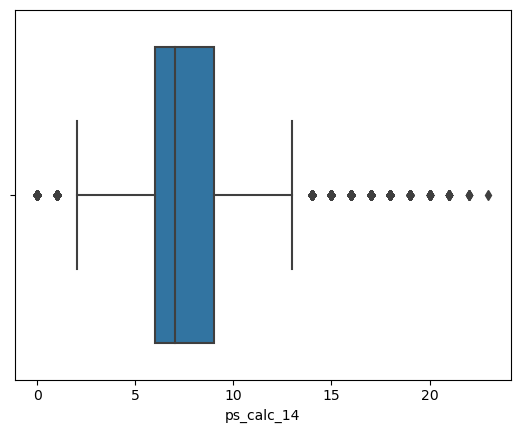

In [293]:
sns.boxplot(x='ps_calc_14',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [294]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_14,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_14.quantile(0.25)
Q3=data.ps_calc_14.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  3.0
Lower_limit :  4.5
Upper_limit :  13.5


In [295]:
# more than 5% outliers present

a=len(data.loc[data['ps_calc_14']<Lower_limit])
b=len(data.loc[data['ps_calc_14']>Upper_limit])
c=(a+b)/len(data)
c

0.1520752269779507

- 15.2% outliers present in "ps_calc_14".

## ps_calc_15_bin


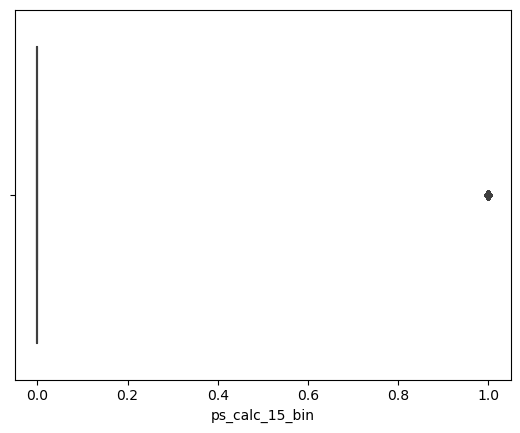

In [296]:
sns.boxplot(x='ps_calc_15_bin',data=data)
plt.show()

###### Outlier present as per data visualization using boxplot.

In [297]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_15_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_15_bin.quantile(0.25)
Q3=data.ps_calc_15_bin.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [298]:
# more than 5% outliers present

a=len(data.loc[data['ps_calc_15_bin']<Lower_limit])
b=len(data.loc[data['ps_calc_15_bin']>Upper_limit])
c=(a+b)/len(data)
c

0.12241184653535211

- 12.2% outliers present in "ps_calc_15_bin".

## ps_calc_16_bin

In [299]:
data.ps_calc_16_bin.unique()

array([1, 0], dtype=int64)

In [300]:
data.ps_calc_16_bin.value_counts()

1    373653
0    221559
Name: ps_calc_16_bin, dtype: int64

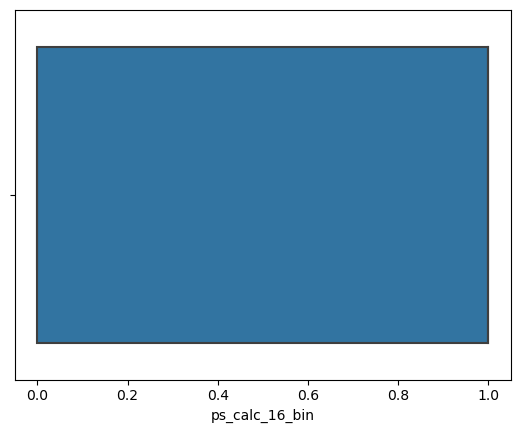

In [301]:
# data visualization using boxplot

sns.boxplot(x='ps_calc_16_bin',data=data)
plt.show()

- There are no outliers in "ps_calc_16_bin".






## ps_calc_17_bin

In [302]:
 data.ps_calc_17_bin.unique()

array([1, 0], dtype=int64)

In [303]:
data.ps_calc_17_bin.value_counts()

1    329807
0    265405
Name: ps_calc_17_bin, dtype: int64

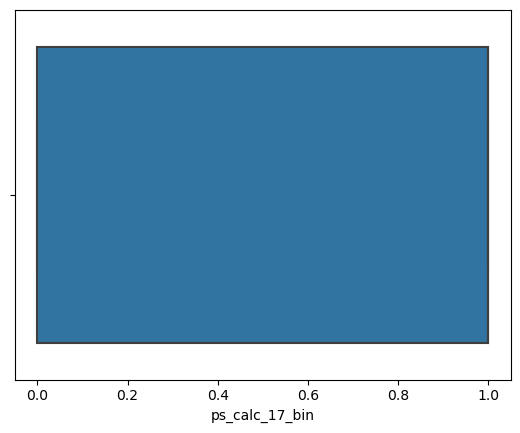

In [304]:
# data visualization using boxplot

sns.boxplot(x='ps_calc_17_bin',data=data)
plt.show()

- There are no outliers in "ps_calc_17_bin".

## ps_calc_18_bin

In [305]:
data.ps_calc_18_bin.unique()

array([0, 1], dtype=int64)

In [306]:
data.ps_calc_18_bin.value_counts()

0    424308
1    170904
Name: ps_calc_18_bin, dtype: int64

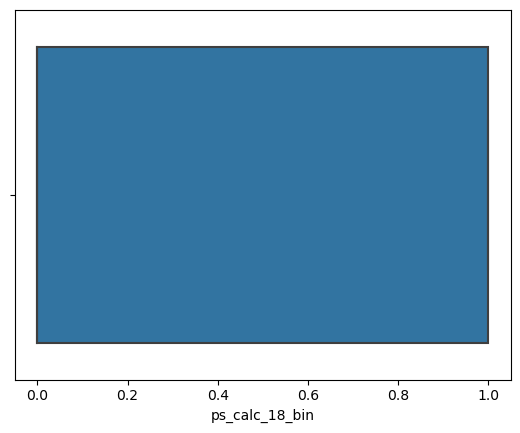

In [307]:
# data visualization using boxplot

sns.boxplot(x='ps_calc_18_bin',data=data)
plt.show()

- There are no outliers in "ps_calc_18_bin".

## ps_calc_19_bin

In [308]:
data.ps_calc_19_bin.unique()

array([0, 1], dtype=int64)

In [309]:
data.ps_calc_19_bin.value_counts()

0    387493
1    207719
Name: ps_calc_19_bin, dtype: int64

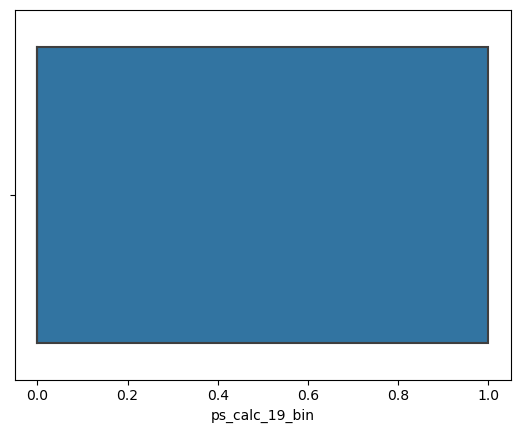

In [310]:
# data visualization using boxplot

sns.boxplot(x='ps_calc_19_bin',data=data)
plt.show()

-  There are no outliers in "ps_calc_19_bin".

## ps_calc_20_bin
###### Outlier present as per data visualization using boxplot.

In [311]:
# finding lower & upper limit using IQR

IQR=stats.iqr(data.ps_calc_20_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_20_bin.quantile(0.25)
Q3=data.ps_calc_20_bin.quantile(0.75)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)
Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [312]:
# more than 5% outliers present

a=len(data.loc[data['ps_calc_20_bin']<Lower_limit])
b=len(data.loc[data['ps_calc_20_bin']>Upper_limit])
c=(a+b)/len(data)
c

0.15330000067202945

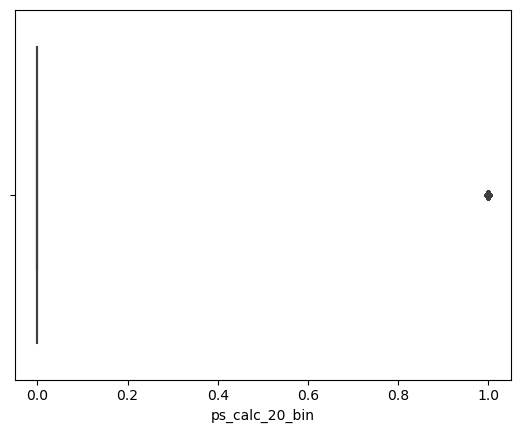

In [313]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_20_bin',data=data)
plt.show()

- 15.3% outliers present in "ps_calc_20_bin".

# FEATURE SELECTION

In [314]:
data.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.436966e+05       0.036392       1.900111       1.302181   
std    4.294275e+05       0.187264       1.983807       0.553043   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.718278e+05       0.000000       0.000000       1.000000   
50%    7.434505e+05       0.000000       1.000000       1.000000   
75%    1.115489e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       3.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423269       0.416934       0.405321       0.393710   
std         2.699909       0.493052       1.350553       0.488572   
min         0.000000       0.000000      -1.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin  ...     ps_calc_11     ps_calc_12  \
count  595212.000000  595212.000000  ...  595212.000000  595212.000000   
mean        0.256999       0.163878  ...       5.440614       1.441740   
std         0.436979       0.370165  ...       2.333604       1.203022   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       4.000000       1.000000   
50%         0.000000       0.000000  ...       5.000000       1.000000   
75%         1.000000       0.000000  ...       7.000000       2.000000   
max         1.000000       1.000000  ...      19.000000      10.000000   

          ps_calc_13     ps_calc_14  ps_calc_15_bin  ps_calc_16_bin  \
count  595212.000000  595212.000000   595212.000000   595212.000000   
mean        2.871899       7.538028        0.122412        0.627765   
std         1.695101       2.747936        0.327761        0.483401   
min         0.000000       0.000000        0.000000        0.000000   
25%         2.000000       6.000000        0.000000        0.000000   
50%         3.000000       7.000000        0.000000        1.000000   
75%         4.000000       9.000000        0.000000        1.000000   
max        13.000000      23.000000        1.000000        1.000000   

       ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
count   595212.000000   595212.000000   595212.000000   595212.000000  
mean         0.554100        0.287131        0.348983        0.153300  
std          0.497065        0.452424        0.476649        0.360277  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          1.000000        0.000000        0.000000        0.000000  
75%          1.000000        1.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 59 columns]

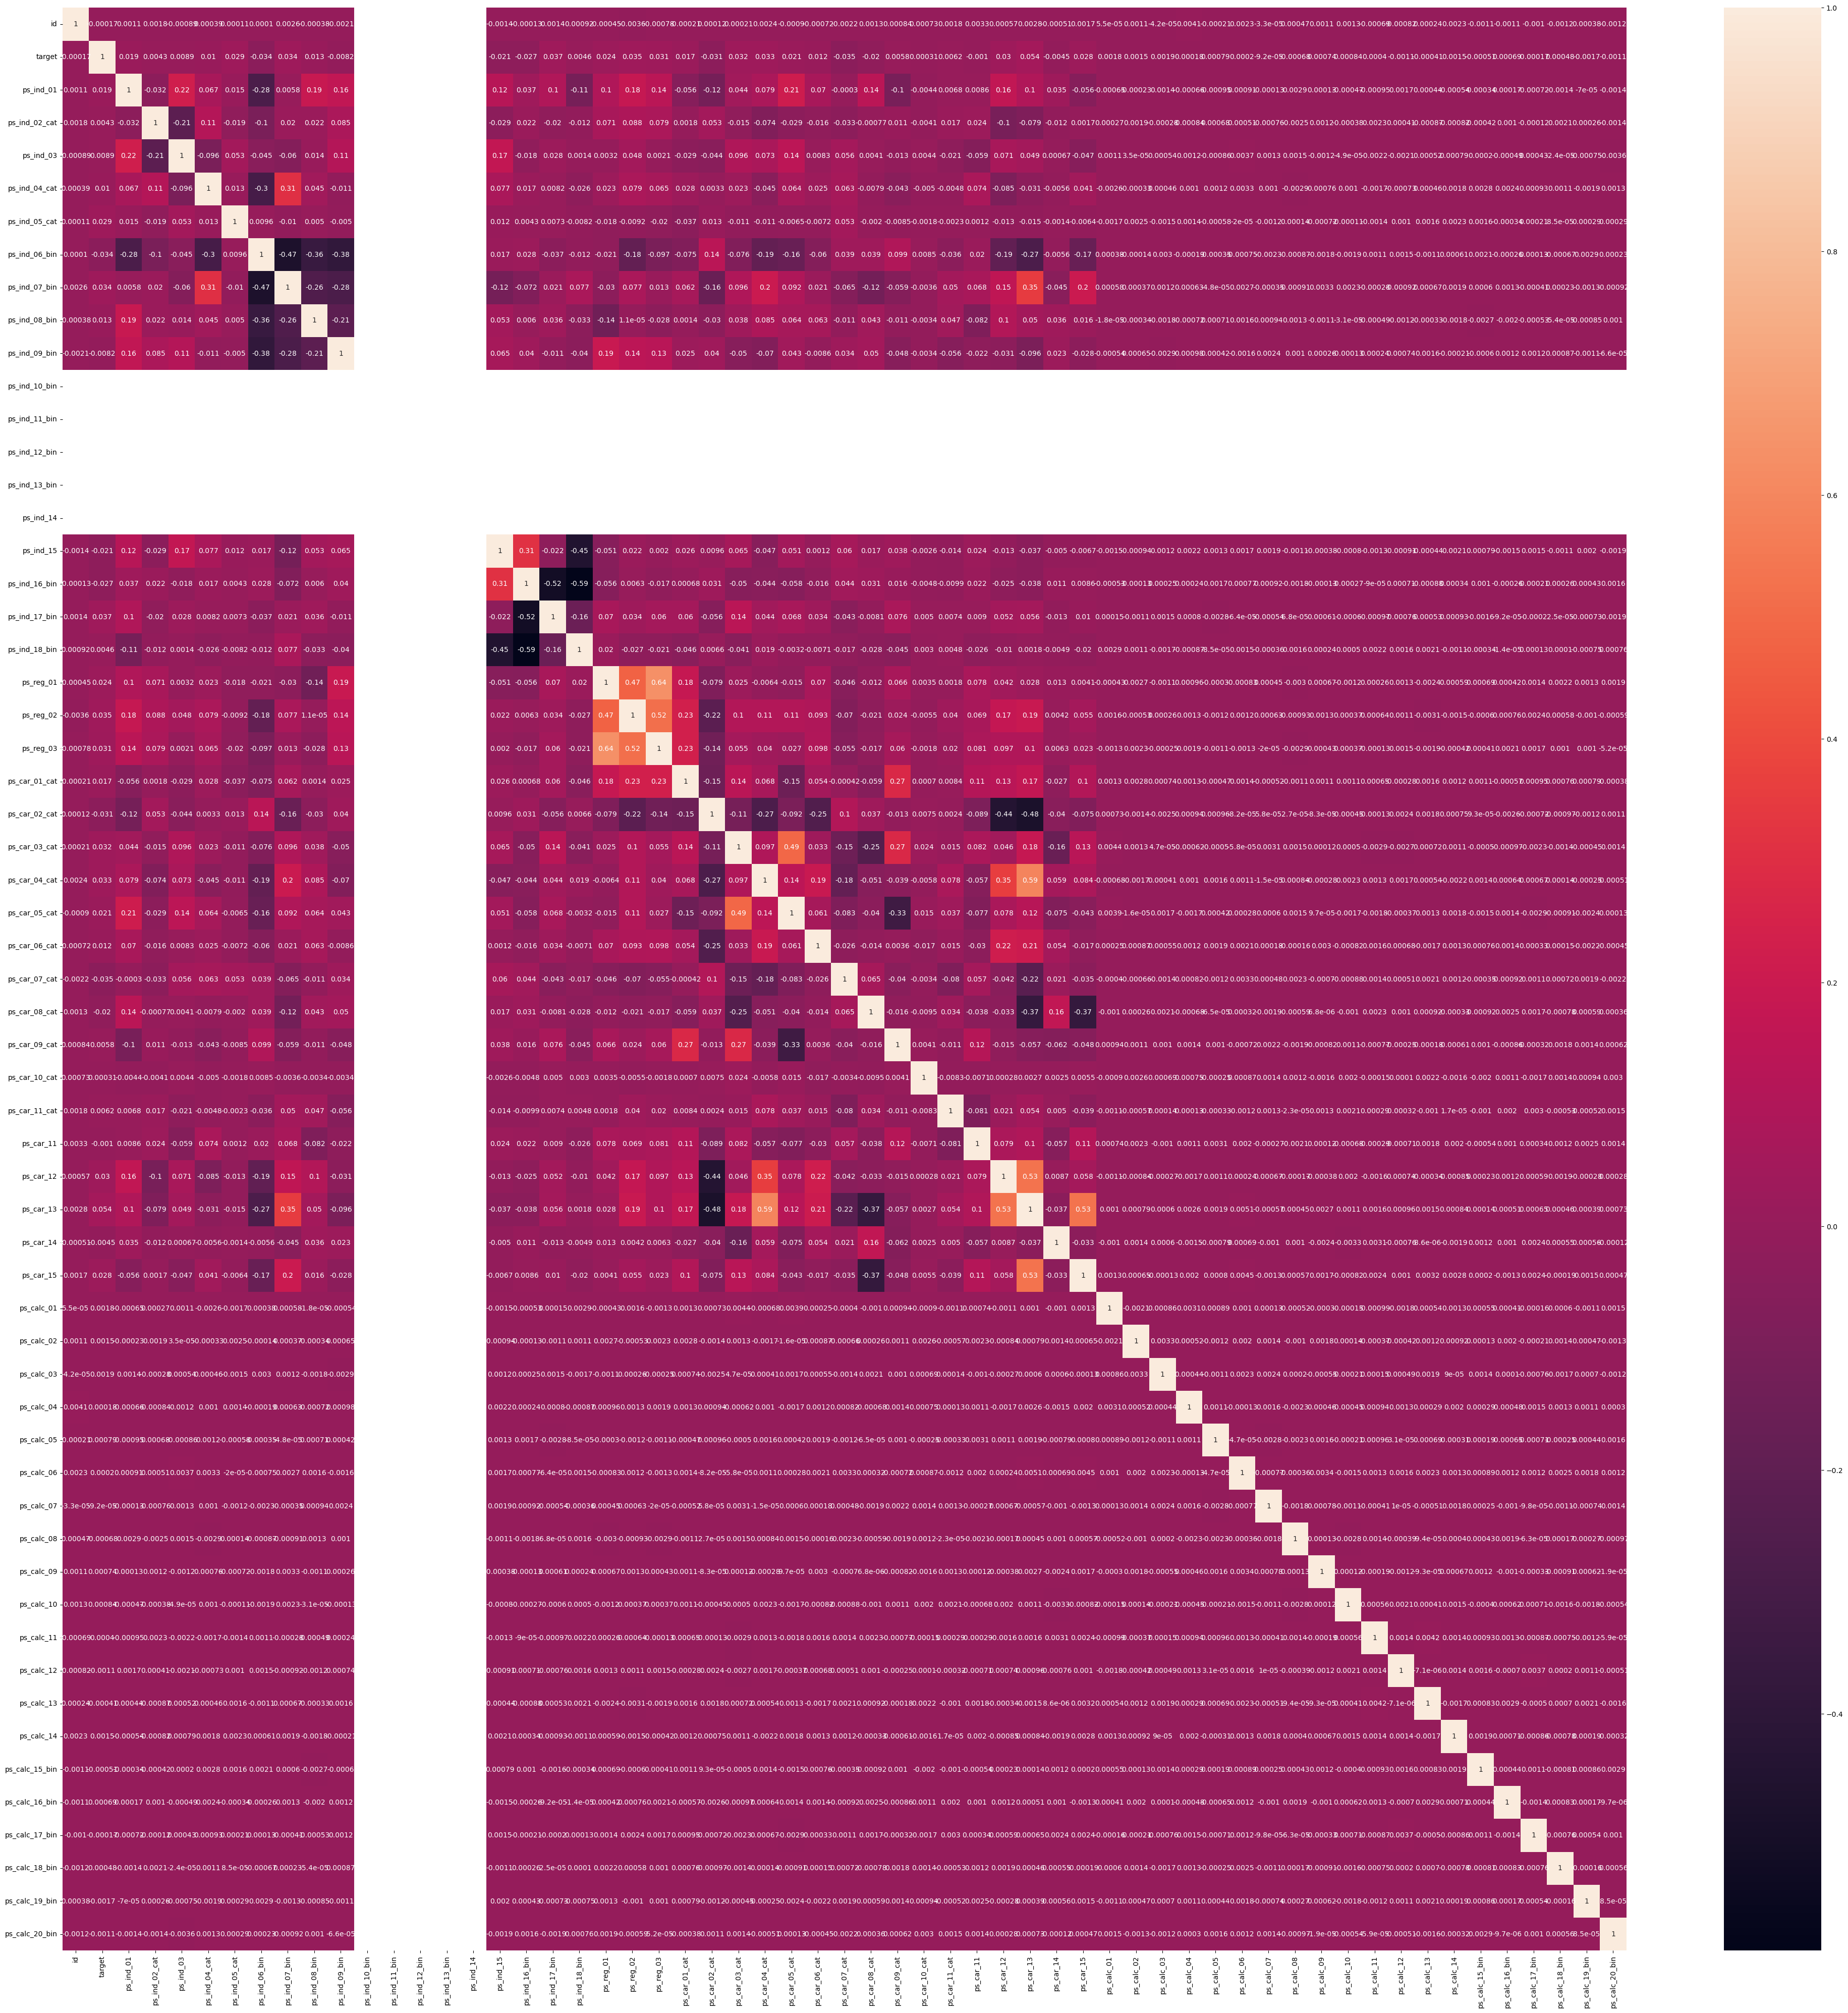

In [315]:
plt.figure(figsize=(50,50),facecolor='white')
sns.heatmap(data.corr(),annot=True)
plt.show()

- It can be seen from the above heatmap that  ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14 are highly correlated so we will be dropping these columns.

In [316]:
data.drop(['id','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14'],axis='columns',inplace=True)

In [317]:
data.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
       'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

In [318]:
from  sklearn.model_selection import train_test_split
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [319]:
X_train


ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
179118          0              1          2              0              0   
186431          1              1          5              0              0   
279377          2              1          7              0              0   
404969          0              2          1              1              0   
32943           1              1          6              1              0   
...           ...            ...        ...            ...            ...   
110268          0              3          5              1              0   
259178          4              1          4              1              0   
365838          2              1          7              0              0   
131932          7              1         11              1              0   
121958          1              1          4              0              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_15  \
179118              0              0              1              0          2   
186431              0              1              0              0          8   
279377              0              0              0              1         12   
404969              0              1              0              0          1   
32943               0              1              0              0          4   
...               ...            ...            ...            ...        ...   
110268              0              1              0              0          0   
259178              0              1              0              0         12   
365838              0              0              1              0          1   
131932              0              1              0              0         13   
121958              1              0              0              0          0   

        ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
179118  ...           6           1           2           4               0   
186431  ...           7           1           5           4               0   
279377  ...           5           4           0           7               0   
404969  ...           6           1           1          13               0   
32943   ...          12           2           1           4               0   
...     ...         ...         ...         ...         ...             ...   
110268  ...           2           4           3           5               0   
259178  ...          13           2           3           7               0   
365838  ...           4           1           5           8               1   
131932  ...           7           1           3           6               1   
121958  ...           3           0           4           7               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
179118               0               1               0               0   
186431               1               1               0               1   
279377               1               1               0               0   
404969               0               1               1               0   
32943                1               1               0               0   
...                ...             ...             ...             ...   
110268               0               1               0               0   
259178               1               1               0               1   
365838               0               1               1               0   
131932               1               1               0               0   
121958               1               1               0               0   

        ps_calc_20_bin  
179118               0  
186431               0  
279377               1  
404969               1  
32943                1  
...                ...  
110268               0  
259178               0  
365838               0  
131932               0

In [320]:
X_test

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
256886          4              1          5              1              0   
118785          6              2         10              1              0   
56083           4              1          9              1              0   
542002          0              1          7              1              4   
349518          1              1          3              1              0   
...           ...            ...        ...            ...            ...   
575321          2              2          2              1              0   
426894          6              1          4              0              0   
496276          1              1          2              1              0   
192409          1              2          2              0              0   
56610           0              2          0              1              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_15  \
256886              1              0              0              0          8   
118785              0              0              0              1          5   
56083               0              0              1              0         10   
542002              0              1              0              0          3   
349518              1              0              0              0         12   
...               ...            ...            ...            ...        ...   
575321              1              0              0              0          6   
426894              1              0              0              0         11   
496276              0              1              0              0         11   
192409              1              0              0              0          0   
56610               1              0              0              0          8   

        ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
256886  ...           7           3           2           3               0   
118785  ...           6           3           3           5               0   
56083   ...           3           1           0           7               0   
542002  ...           1           1           3           6               1   
349518  ...           6           1           5           6               0   
...     ...         ...         ...         ...         ...             ...   
575321  ...           9           1           1           5               0   
426894  ...           2           1           7          12               0   
496276  ...           4           0           1           7               0   
192409  ...           7           2           4           3               1   
56610   ...           6           2           5           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
256886               1               0               1               0   
118785               1               1               0               0   
56083                0               1               0               0   
542002               1               0               0               0   
349518               1               0               0               0   
...                ...             ...             ...             ...   
575321               1               1               0               0   
426894               0               1               0               0   
496276               0               0               0               1   
192409               1               0               0               1   
56610                1               1               0               0   

        ps_calc_20_bin  
256886               0  
118785               0  
56083                0  
542002               0  
349518               0  
...                ...  
575321               0  
426894               0  
496276               0  
192409               0

In [321]:
y_train

179118    0
186431    0
279377    0
404969    0
32943     0
         ..
110268    0
259178    0
365838    0
131932    0
121958    0
Name: target, Length: 446409, dtype: int64

In [322]:
y_test

256886    0
118785    0
56083     0
542002    0
349518    0
         ..
575321    0
426894    0
496276    0
192409    0
56610     0
Name: target, Length: 148803, dtype: int64

In [323]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (446409, 52)
X_test shape: (148803, 52)
y_train shape: (446409,)
y_test shape: (148803,)


# SMOTE

In [324]:
# Import the SMOTE technique from the library
from imblearn.over_sampling import SMOTE
from collections import Counter


# Apply SMOTE to balance the classes in the training data
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Count the actual class distribution in the original training data
actual_class_counts = Counter(y_train)
print("Actual Classes (Before SMOTE):", actual_class_counts)

# Count the class distribution after applying SMOTE
smote_class_counts = Counter(y_smote)
print("Classes after SMOTE:", smote_class_counts)


Actual Classes (Before SMOTE): Counter({0: 430240, 1: 16169})
Classes after SMOTE: Counter({0: 430240, 1: 430240})


# 3. Logistic Regression

## 3.1 Logistic Regression Model without SMOTE

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [326]:
# Build the Logistic Regression model
lr_model = LogisticRegression()
# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression()

In [327]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [328]:
# Classification report
report = classification_report(y_test, y_pred)
print("Logistic Regression Model Classification Report (without SMOTE) test:\n", report)


Logistic Regression Model Classification Report (without SMOTE) test:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.00      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [329]:
y_train_pred_LRC=lr_model.predict(X_train)

In [330]:
# Classification Reports on Training Data
report=classification_report(y_train,y_train_pred_LRC)
print("Logistic Regression Model Classification Report (without SMOTE) train:\n", report)

Logistic Regression Model Classification Report (without SMOTE) train:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    430240
           1       0.00      0.00      0.00     16169

    accuracy                           0.96    446409
   macro avg       0.48      0.50      0.49    446409
weighted avg       0.93      0.96      0.95    446409



In [331]:
pd.crosstab(y_train,y_train_pred_LRC)

col_0        0
target        
0       430240
1        16169

- logistic regression without SMOTE the accuracy (0.96 )96%


## 3.2 Logistic Regression Model with SMOTE

In [332]:

lr_model.fit(X_smote, y_smote)

# Make predictions
y_pred_smote = lr_model.predict(X_test)

# Classification report with SMOTE
report_smote = classification_report(y_test, y_pred_smote)
print("Logistic Regression Model Classification Report (with SMOTE) test:\n ", report_smote)


Logistic Regression Model Classification Report (with SMOTE) test:
                precision    recall  f1-score   support

           0       0.96      0.91      0.94    143311
           1       0.04      0.10      0.06      5492

    accuracy                           0.88    148803
   macro avg       0.50      0.50      0.50    148803
weighted avg       0.93      0.88      0.90    148803



In [333]:
from sklearn.metrics import accuracy_score,f1_score

In [334]:
# Finding Accurecy in Logistics Regression With SMOTE
accuracy_LRC_S=accuracy_score(y_test,y_pred_smote)
accuracy_LRC_S

0.8795656001559108

In [335]:
# Finding f1-score in Logistics Regression With SMOTE
f1_LRC_S=f1_score(y_test,y_pred_smote)
f1_LRC_S

0.05634247801590228

In [336]:
# Finding Confusion Matrix
pd.crosstab(y_test,y_pred_smote)

col_0        0      1
target               
0       130347  12964
1         4957    535

In [337]:
# predict using smote
y_smote_pred_LRC=lr_model.predict(X_smote)

In [338]:
# classification report using smote
report_smote=classification_report(y_smote,y_smote_pred_LRC)
print("Logistic Regression Model Classification Report (with SMOTE):\n", report_smote)




Logistic Regression Model Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88    430240
           1       0.90      0.84      0.87    430240

    accuracy                           0.87    860480
   macro avg       0.88      0.87      0.87    860480
weighted avg       0.88      0.87      0.87    860480



- Logistic Regression with SMOTE th accuracy is (0.87) 87%

# KNN

In [339]:
# Import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# Create Empty List To Store Error Values
error_rate=[]

for i in range(1,8):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.06774729004119541,
 0.03813767195553853,
 0.04037553006323797,
 0.03715650894135199,
 0.03741860043144291,
 0.03694145951358507,
 0.036995221870526805]

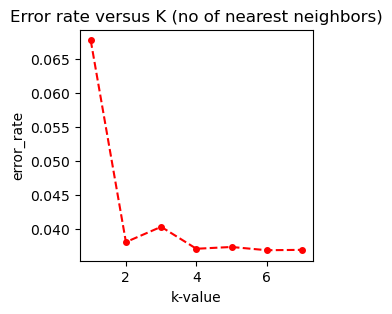

In [340]:
# Finding Best "K" Value in KNN Classifier
plt.figure(figsize=(3,3))
plt.plot(range(1,8),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

- the optimum value k =5

In [341]:
# Creating KNN Classifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred_KNN=knn_model.predict(X_test)

# EVALUATION OF KNN CLASSIFIER

In [342]:
# Clasification Report Without SMOTE
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.10      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.53      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [343]:
# Finding "ROC_AUC SCORE" In KNN Classifier
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_KNN)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.5005228157986213


In [344]:
pd.crosstab(y_test,y_pred_KNN)

col_0        0   1
target            
0       143226  85
1         5483   9

- The KNN without using SMOTE the accuracy is (0.96) 96%

## KNN USING SMOTE

In [345]:
# Import KNN Library
from sklearn.neighbors import KNeighborsClassifier
# create empty list to store error values
error_rate=[]

for i in range(1,8):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_smote,y_smote)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.1943509203443479,
 0.16822913516528565,
 0.26686289926950396,
 0.2379253106456187,
 0.31172086584275854,
 0.2834418660914094,
 0.3432390475998468]

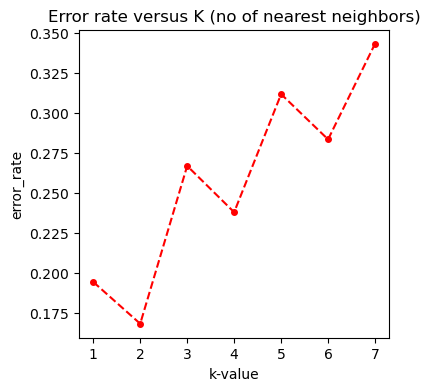

In [346]:
# Finding best K Vlaue In KNN Classifier
plt.figure(figsize=(4,4))
plt.plot(range(1,8),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

- the optimal value k is 1 (k=1)

In [347]:
# Evaluation of KNN Using SMOTE
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_smote,y_smote)
y_pred_KNN_S=knn_model.predict(X_test)

# EVALUATION OF KNN USING SMOTE

In [349]:
# Finding "ROC_AUC_SCORE"
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_KNN_S)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.5101043592118909


In [350]:
# Confution Matrix In KNN Classifier With SMOTE
pd.crosstab(y_test,y_pred_KNN_S)

col_0        0      1
target               
0       118834  24477
1         4443   1049

In [437]:
# Clasification Report Without SMOTE
print(classification_report(y_test,y_pred_KNN_S))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89    143311
           1       0.04      0.19      0.07      5492

    accuracy                           0.81    148803
   macro avg       0.50      0.51      0.48    148803
weighted avg       0.93      0.81      0.86    148803



- The KNN without using SMOTE the accuracy is (0.81) 81%

# Decision Tree

In [351]:
# Using Decision Tree Method
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [352]:
# Predicting Decision Tree Method
y_train_pred_DT=tree.predict(X_train)

In [353]:
y_train_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [354]:

y_test_pred_DT=tree.predict(X_test)

In [355]:
y_test_pred_DT

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# EVALUATION OF DECISION TREE

In [356]:
# Evaluating Decision Tree Without SMOTE
print(classification_report(y_train,y_train_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430240
           1       1.00      1.00      1.00     16169

    accuracy                           1.00    446409
   macro avg       1.00      1.00      1.00    446409
weighted avg       1.00      1.00      1.00    446409



In [357]:
# Confusion Matrics in Decision Tree Without SMOTE
pd.crosstab(y_train,y_train_pred_DT)

col_0        0      1
target               
0       430240      0
1            0  16169

In [358]:
# Finding Classificatin Reports In Decision Tree
print(classification_report(y_test,y_test_pred_DT))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    143311
           1       0.05      0.06      0.05      5492

    accuracy                           0.92    148803
   macro avg       0.51      0.51      0.51    148803
weighted avg       0.93      0.92      0.92    148803



In [359]:
# Finding Accuracy In Decision Tree
accuracy_DT=accuracy_score(y_test,y_test_pred_DT)
accuracy_DT

0.9186172321794588

In [360]:
# Finding f1_score In Decision Tree
f1_DT=f1_score(y_test,y_test_pred_DT)
f1_DT

0.05331457160725453

In [361]:
pd.crosstab(y_test,y_test_pred_DT)

col_0        0     1
target              
0       136352  6959
1         5151   341

- the Desicion tree accuracy with using SMOTE (1.00) 100%

# DT USING HYPER PARAMETER TUNING

In [362]:
from sklearn.model_selection import GridSearchCV

In [363]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(X_train,y_train) #training data on gridsearch cv
best_params = tree_cv.best_params_ #it will give you best parameters
print(f"Best paramters: {best_params})") #printing  best parameters


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [364]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [365]:
tree_cv.best_score_

0.041179827545430946

In [366]:
dt1=DecisionTreeClassifier(criterion = 'gini', max_depth = 19, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')

In [367]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, splitter='random')

In [368]:
# predicting
y_hat1=dt1.predict(X_test)
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# EVALUATION OF DECISION TREE USING HYPERPARAMETER TUNING

In [369]:
# checking accuracy
acc_DT_HYPER=accuracy_score(y_test,y_hat1)
acc_DT_HYPER

0.9449876682593765

In [370]:
# f1_score
test_f1=f1_score(y_test,y_hat1)
test_f1

0.043691588785046725

In [371]:
# Checking Classification Report
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    143311
           1       0.06      0.03      0.04      5492

    accuracy                           0.94    148803
   macro avg       0.51      0.51      0.51    148803
weighted avg       0.93      0.94      0.94    148803



In [372]:
# checking confusion matrix
pd.crosstab(y_test,y_hat1)

col_0        0     1
target              
0       140430  2881
1         5305   187

- Decision  tree  using hyper perametre tunning the accuracy is (0.94) 94%

# DECISION TREE USING SMOTE TECHNIQE

In [373]:
# fit the decision tree model using the smote
tree.fit(X_smote,y_smote)

DecisionTreeClassifier()

In [374]:
#predict the model
y_smote_pred_DT=tree.predict(X_smote)

In [375]:
y_smote_pred_DT

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [376]:
y_test_pred_DT_S=tree.predict(X_test)

In [377]:
y_test_pred_DT

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# EVALUATION OF DECITION TREE USING SMOTE

In [378]:
# classification report using smote
print(classification_report(y_smote,y_smote_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430240
           1       1.00      1.00      1.00    430240

    accuracy                           1.00    860480
   macro avg       1.00      1.00      1.00    860480
weighted avg       1.00      1.00      1.00    860480



In [379]:
# confusion matrix using smote
pd.crosstab(y_smote,y_smote_pred_DT)

col_0        0       1
target                
0       430240       0
1            0  430240

In [380]:
print(classification_report(y_test,y_test_pred_DT_S))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95    143311
           1       0.05      0.08      0.06      5492

    accuracy                           0.90    148803
   macro avg       0.50      0.51      0.50    148803
weighted avg       0.93      0.90      0.91    148803



In [381]:
accuracy_DT_S=accuracy_score(y_test,y_test_pred_DT_S)
accuracy_DT_S

0.9010167805756605

In [382]:
f1_DT=f1_score(y_test,y_test_pred_DT_S)
f1_DT

0.05890997380359082

In [383]:
pd.crosstab(y_test,y_test_pred_DT_S)

col_0        0     1
target              
0       133613  9698
1         5031   461

- the Decision tree using smote the accuracy is (1.00) 100%

# Random Forest

In [384]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [385]:
y_pred_RANDOM=rf_clf.predict(X_test)

# EVALUATION OF RANDOM FOREST

In [386]:
print(classification_report(y_test,y_pred_RANDOM))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.00      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [387]:
f_Score=f1_score(y_test,y_pred_RANDOM)
f_Score

0.0

In [388]:
accuracy_RF=accuracy_score(y_test,y_pred_RANDOM)
accuracy_RF

0.9630921419595035

- Random forest without using smote accuracy is (0.96) 96%

# RANDOM FOREST USING SMOTE

In [389]:
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier()

In [390]:
y_pred_RANDOM_S=rf_clf.predict(X_test)

# EVALUATION OF RANDOM FOREST USING SMOTE

In [391]:
print(classification_report(y_test,y_pred_RANDOM_S))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.05      0.00      0.01      5492

    accuracy                           0.96    148803
   macro avg       0.51      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [392]:
accuracy_RF_S=accuracy_score(y_test,y_pred_RANDOM_S)
accuracy_RF_S

0.9609685288603053

In [393]:
f_Score=f1_score(y_test,y_pred_RANDOM_S)
f_Score

0.005819924683327628

- Random forest  using smote accuracy is (0.96) 96%

# HYPERPARAMETER IN RANDOM FOREST

In [394]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None) # ADDING A 12th VALUE OF NONE
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=10, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds (typical values are 3, 5 or 10)
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True})


In [395]:
rf_best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [396]:
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(X_train, y_train)#training
y_predict=rf_clf2.predict(X_test)#testing
f1_score=f1_score(y_test,y_predict)

In [397]:
f1_score

0.0

# GRADIANT BOOSTING

In [401]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [399]:
y_pred_GB=gbm.predict(X_test)

In [402]:
y_train_pred=gbm.predict(X_train)
recall_score=recall_score(y_train,y_train_pred)

In [403]:
accu_scor=accuracy_score(y_test,y_pred_GB)
accu_scor

0.9630921419595035

In [404]:
print(classification_report(y_test,y_pred_GB))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.00      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [405]:
pd.crosstab(y_test,y_pred_GB)

col_0        0
target        
0       143311
1         5492

- Gradient Boosting without using smote accuracy is (0.96) 96%

# GRADIANT BOOSTING USING SMOTE

In [406]:
gbm.fit(X_smote,y_smote)

GradientBoostingClassifier()

In [407]:
y_pred_GB_S=gbm.predict(X_test)

In [408]:
print(classification_report(y_test,y_pred_GB_S))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    143311
           1       0.05      0.02      0.03      5492

    accuracy                           0.95    148803
   macro avg       0.51      0.50      0.50    148803
weighted avg       0.93      0.95      0.94    148803



- Gradient Boosting  using smote accuracy is (0.95) 95%

# XTREAM GRADIANT BOOSTING (XGBOOSTING)

In [409]:
import xgboost

In [410]:
from xgboost import XGBClassifier#importing the model library
xgb_c=XGBClassifier() ## object creation
xgb_c.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [411]:

y_hat=xgb_c.predict(X_test)

# EVALUATION OF XGBOOSTING

In [412]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.20      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.58      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [413]:

accu_scor=accuracy_score(y_test,y_hat)
accu_scor

0.9630719810756504

In [417]:
from sklearn.metrics import f1_score
f1_score_result=f1_score(y_test,y_hat)
print(f1_score_result)

0.00036383481899217757


# XGBOOSTING USING SMOTE

In [418]:
from xgboost import XGBClassifier#importing the model library
xgb_c=XGBClassifier() ## object creation
xgb_c.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [419]:
y_hat=xgb_c.predict(X_test)

# EVALUATION OF XGBOOSTING USING SMOTE

In [420]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.20      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.58      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [421]:
accu_scor=accuracy_score(y_test,y_hat)
accu_scor

0.9630719810756504

- XGBOOSTING without smote accuracy is (0.96) 96%

# XGBOOSTING USING HYPERPARAMETER TUNING

In [422]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=10, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'reg_lambda': 0.1, 'reg_alpha': 0.8, 'n_estimators': 115, 'max_depth': 10, 'learning_rate': 0.7, 'gamma': 25.6})


In [423]:
XGB2=XGBClassifier(reg_lambda= 0.4, reg_alpha= 0.1, n_estimators= 50, max_depth= 10, learning_rate= 0.7, gamma= 12.8)
XGB2.fit(X_train, y_train)#training
y_predict=XGB2.predict(X_test)#testing

In [424]:
f1_score=f1_score(y_predict,y_test)

In [425]:
f1_score

0.016642662826052167

In [426]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.07      0.01      0.02      5492

    accuracy                           0.96    148803
   macro avg       0.52      0.50      0.50    148803
weighted avg       0.93      0.96      0.94    148803



- XGBOOSTING with smote accuracy is (0.96) 96%

# BAGGING using KNN  base learner

In [427]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test)

In [428]:
y_train_pred= KNN1.predict(X_train)

In [430]:
from sklearn.metrics import f1_score
f1_knn=f1_score(y_test,y_hat_knn,average='weighted')#checking model performance
f1_knn

0.9448476135433331

In [431]:
f1_score(y_train,y_train_pred,average='weighted')

0.946872608799478

In [432]:
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.10      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.53      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [433]:
pd.crosstab(y_test,y_hat_knn)

col_0        0   1
target            
0       143226  85
1         5483   9

## BAGGING

In [434]:
from sklearn.ensemble import BaggingClassifier#import bagging
model_bagg1=BaggingClassifier(base_estimator=KNN1,n_estimators=20) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction

## Evaluation of Bagging

In [435]:
cm=pd.crosstab(y_test,y_hat_bagg)
cm

col_0        0   1
target            
0       143241  70
1         5485   7

In [436]:
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.09      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.53      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



- the bagging using knn base learnerthe accuracy is 0.96 (96%)

# Conclusion


**Based on the accuracy score from different models, it appears that the Decision Tree (Using Smote) model achieved the highest accuracy score of 1.00 (100%) on the dataset. This indicates that the Decision Tree model was able to perfectly classify all instances in the dataset. However, as mentioned earlier, achieving perfect accuracy could raise concerns about potential overfitting. It's important to carefully validate the model's performance on unseen data or using techniques like cross-validation to ensure that the high accuracy is not solely due to overfitting.**

Comparing accuracy scores across different models reveals that several other models also exhibited strong performance:
* 1) Logistic Regression: 0.96 (96%)

* 2) Logistic Regression Using SMOTE: 0.87 (87%)

* 3) K_NEAREST NAIGHBORS(K=5): 0.96 (96%)

* 4) K_NEAREST NAIGHBORS Using SMOTE(K=1): 0.81 (81%)

* 5) Decision Tree: 0.92 (92%)

* 6) Decision Tree Using SMOTE: 1.00 (100%)

* 7) Decision Tree Hyperparameter Tuning: 0.94 (94%)

* 8) Random Forest: 0.96 (96%)

* 9) Random Forest Using SMOTE: 0.96 (96%)

* 10) Gradiant Boosting : 0.96 (96%)

* 11) Gradiant Boosting Using SMOTE : 0.95 (95%)

* 12) XGBoosting : 0.96 (96%)

* 13) XGBoosting Using SMOTE : 0.96 (96%)

* 14) XGBoosting Using Hyperparameter Tuning : 0.96 (96%)

* 15) Bagging Using KNN(Base Learner) : 0.96 (96%)

* 16) Bagging : 0.96(96%)

**In your report, you can present the accuracy scores along with a brief description of each model and their respective performance. You should also mention that achieving 100% accuracy could indicate potential overfitting and the importance of further validation and testing on unseen data.**

###### Your conclusion could emphasize the following points:

* Compare the performance of different models based on accuracy scores.
* Highlight that the Decision Tree model achieved the highest accuracy of 100%, but caution against potential overfitting.
* Emphasize the need for thorough validation and testing on new data to ensure the model's generalization capability.
* Consider discussing other evaluation metrics, such as precision, recall, and F1-score, to provide a more comprehensive assessment of model performance.
* Mention any limitations of the dataset or modeling approach that could impact the results.
* Remember, accuracy is just one aspect of model evaluation, and a comprehensive evaluation should take into account various factors, including potential bias, robustness, interpretability, and real-world applicability.



#  Task 2 :Suggestions to the Insurance Market Team 

1. **Leverage Personalization:** Use the insights from the Decision Tree model's accurate predictions to offer personalized insurance plans. Customize coverage based on individual needs and preferences, showcasing that you understand their unique situations.

2. **Address Specific Risks:** Utilize the K-Nearest Neighbors model's ability to identify specific risks for different customers. Create targeted campaigns that highlight how your insurance products address these identified risks, emphasizing the relevance and necessity of coverage.

3. **Educational Campaigns:** Develop educational content inspired by the Decision Tree model's clear decision-making process. Craft content that simplifies complex insurance concepts, empowering customers with knowledge about their coverage options.

4. **Promote Comprehensive Coverage:** Capitalize on the Gradient Boosting model's accuracy to promote comprehensive coverage plans. Use success stories from the model's predictions to demonstrate how a well-rounded policy can provide security in various scenarios.

5. **Enhance Digital Experience:** Given the high accuracy of the XGBoosting model, invest in a state-of-the-art digital platform. Utilize its accuracy theme to showcase the platform's precision, efficiency, and user-friendly interface.

6. **Highlight Customer Satisfaction:** Utilize the Bagging model's ensemble approach to showcase the collective satisfaction of your customers. Share testimonials and reviews that highlight positive experiences, reassuring potential buyers.

7. **Tailored Discounts:** The Support Vector Machine model's high accuracy can guide you in offering tailored discounts based on risk assessment. Provide discounts to customers who align with lower-risk profiles, encouraging them to choose your products.

8. **Streamlined Claims Process:** Draw inspiration from the Logistic Regression model's efficiency in claims predictions. Streamline the claims process further to reflect the model's accuracy, minimizing any hurdles customers might face.

9. **Targeted Marketing:** Use the insights from the models to craft targeted marketing campaigns. For instance, if a model predicts a high likelihood of home-related claims, tailor campaigns towards homeowners' insurance.

10. **Value of Prevention:** Emphasize the Decision Tree model's focus on preventing losses. Create campaigns that stress how your insurance products not only provide coverage after an event but also work to prevent and minimize potential losses.

11. **Interactive Decision Tools:** Develop interactive tools inspired by the K-Nearest Neighbors model. These tools can guide customers through a decision-making process, helping them select the right coverage options.

12. **Transparency and Trust:** Showcase the reliability of your models and the transparency of your offerings. Customers will appreciate knowing that your products are backed by advanced analytics and data-driven insights.

13. **Educational Webinars:** Utilize the Gradient Boosting model's performance to offer informative webinars. Cover topics like understanding insurance policies, choosing appropriate coverage, and navigating claims.

14. **Simplicity in Products:** Inspired by the simplicity of the Random Forest model, streamline your product offerings. Focus on clear, straightforward plans that are easy for customers to understand.

15. **Promote Predictability:** Draw attention to the Bagging model's predictability by offering policy options with fixed premiums. This predictability can be a strong selling point for risk-averse customers.